# Skin Detection - Lavoro iniziale di definizione soglie
### Bianchi Luca - 4805748

In [1]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv
import warnings
warnings.filterwarnings('ignore')

FILE_DIR = './material/images'

In [2]:
def normalized(rgb):

        norm=np.zeros_like(rgb,np.float32)

        r = rgb[:, :, 0]
        g = rgb[:, :, 1]
        b = rgb[:, :, 2]
        sum = rgb.sum(axis=2)

        norm[:,:,0]=r/sum
        norm[:,:,1]=g/sum
        norm[:,:,2]=b/sum
        return norm

In [3]:
def run_skin_analysis_norm():
    with os.scandir(FILE_DIR+"/skin/") as direct:
        maxes_rg = []
        maxes_rb = []
        mins_rg = []
        mins_rb = []
        for file in direct:
            plt.figure(figsize=(32, 8))
            plt.suptitle(file.name)
            skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
            skin_img_array = normalized(np.asarray(skin_img))
            plt.subplot(1, 9, 1)
            plt.imshow(skin_img_array)
            plt.subplot(1, 9, 2)
            plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 1], norm=True)
            plt.subplot(1, 9, 3)
            plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 2], norm=True)
            plt.subplot(1, 9, 4)
            plt.scatter(skin_img_array[:, :, 1], skin_img_array[:, :, 2], norm=True)
            plt.subplot(1, 9, 5)
            plt.imshow(skin_img)
            plt.subplot(1, 9, (6, 7))
            tmp_mx = (skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).max(axis=1)
            tmp_mn = (skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            tmp_mx = tmp_mx.max()
            tmp_mn = tmp_mn.min()
            maxes_rg.append(tmp_mx)
            mins_rg.append(tmp_mn)
            plt.subplot(1, 9, (8, 9))
            tmp_mx = (skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).max(axis=1)
            tmp_mn = (skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            tmp_mx = tmp_mx.max()
            tmp_mn = tmp_mn.min()
            maxes_rb.append(tmp_mx)
            mins_rb.append(tmp_mn)
        print(f"95 perc max = {np.percentile(np.asarray(maxes_rg), 95)}, {np.percentile(np.asarray(maxes_rb), 95)}")
        print(f"10 perc min = {np.percentile(np.asarray(mins_rg), 10)}, {np.percentile(np.asarray(mins_rb), 10)}")

In [4]:
def run_skin_analysis_hsv():
    with os.scandir(FILE_DIR+"/skin/") as direct:
        maxes_rg = []
        maxes_rb = []
        mins_rg = []
        mins_rb = []
        for file in direct:
            plt.figure(figsize=(32, 4))
            plt.suptitle(file.name)
            skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
            skin_img_hsb = cv.cvtColor(skin_img, cv.COLOR_BGR2HSV)
            plt.figure(figsize=(32, 8))
            plt.subplot(1, 7, 1)
            plt.imshow(skin_img_hsb[:, :, 0], cmap="hsv")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 2)
            plt.imshow(skin_img_hsb[:, :, 1], cmap="Reds")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 3)
            plt.imshow(skin_img_hsb[:, :, 2], cmap="gray")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, (4, 5))
            tmp_mx = (skin_img_hsb[:, :, 0]).max(axis=1)
            tmp_mn = (skin_img_hsb[:, :, 0]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            tmp_mx = tmp_mx.max()
            tmp_mn = tmp_mn.min()
            maxes_rg.append(tmp_mx)
            mins_rg.append(tmp_mn)            
            plt.subplot(1, 7, (6, 7))
            tmp_mx = (skin_img_hsb[:, :, 1]).max(axis=1)
            tmp_mn = (skin_img_hsb[:, :, 1]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            tmp_mx = tmp_mx.max()
            tmp_mn = tmp_mn.min()
            maxes_rb.append(tmp_mx)
            mins_rb.append(tmp_mn)
        print(f"98% perc max = {np.percentile(np.asarray(maxes_rg), 98)}, {np.percentile(np.asarray(maxes_rb), 98)}")
        print(f"5% perc min = {np.percentile(np.asarray(mins_rg), 5)}, {np.percentile(np.asarray(mins_rb), 5)}")

In [5]:

def run_skin_analysis_ycbcr():    
    with os.scandir(FILE_DIR+"/skin/") as direct:
        maxes_rg = []
        maxes_rb = []
        mins_rg = []
        mins_rb = []
        for file in direct:
            plt.figure(figsize=(32, 4))
            plt.suptitle(file.name)
            skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
            skin_img_ycbcr = cv.cvtColor(skin_img, cv.COLOR_RGB2YCrCb)
            plt.subplot(1, 2, 1)
            plt.imshow(skin_img_ycbcr)
            plt.subplot(1, 2, 2)
            plt.imshow(skin_img)
            plt.figure(figsize=(32, 8))
            plt.subplot(1, 7, 1)
            plt.imshow(skin_img_ycbcr[:, :, 0], cmap="gray")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 2)
            plt.imshow(skin_img_ycbcr[:, :, 1], cmap="Greens")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 3)
            plt.imshow(skin_img_ycbcr[:, :, 2], cmap="Reds")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, (4, 5))
            tmp_mx = (skin_img_ycbcr[:, :, 1]).max(axis=1)
            tmp_mn = (skin_img_ycbcr[:, :, 1]).min(axis=1)
            plt.plot(tmp_mn)
            plt.plot(tmp_mx)
            tmp_mx = tmp_mx.max()
            tmp_mn = tmp_mn.min()
            maxes_rg.append(tmp_mx)
            mins_rg.append(tmp_mn)
            plt.subplot(1, 7, (6, 7))
            tmp_mx = (skin_img_ycbcr[:, :, 2]).max(axis=1)
            tmp_mn = (skin_img_ycbcr[:, :, 2]).min(axis=1)
            plt.plot(tmp_mn)
            plt.plot(tmp_mx)
            tmp_mx = tmp_mx.max()
            tmp_mn = tmp_mn.min()
            maxes_rb.append(tmp_mx)
            mins_rb.append(tmp_mn)
        print(f"98% perc max = {np.percentile(np.asarray(maxes_rg), 98)}, {np.percentile(np.asarray(maxes_rb), 98)}")
        print(f"2% perc min = {np.percentile(np.asarray(mins_rg), 2)}, {np.percentile(np.asarray(mins_rb), 2)}")


95 perc max = 2.368037152290344, inf
10 perc min = 1.0686118721961975, 1.0960114479064942


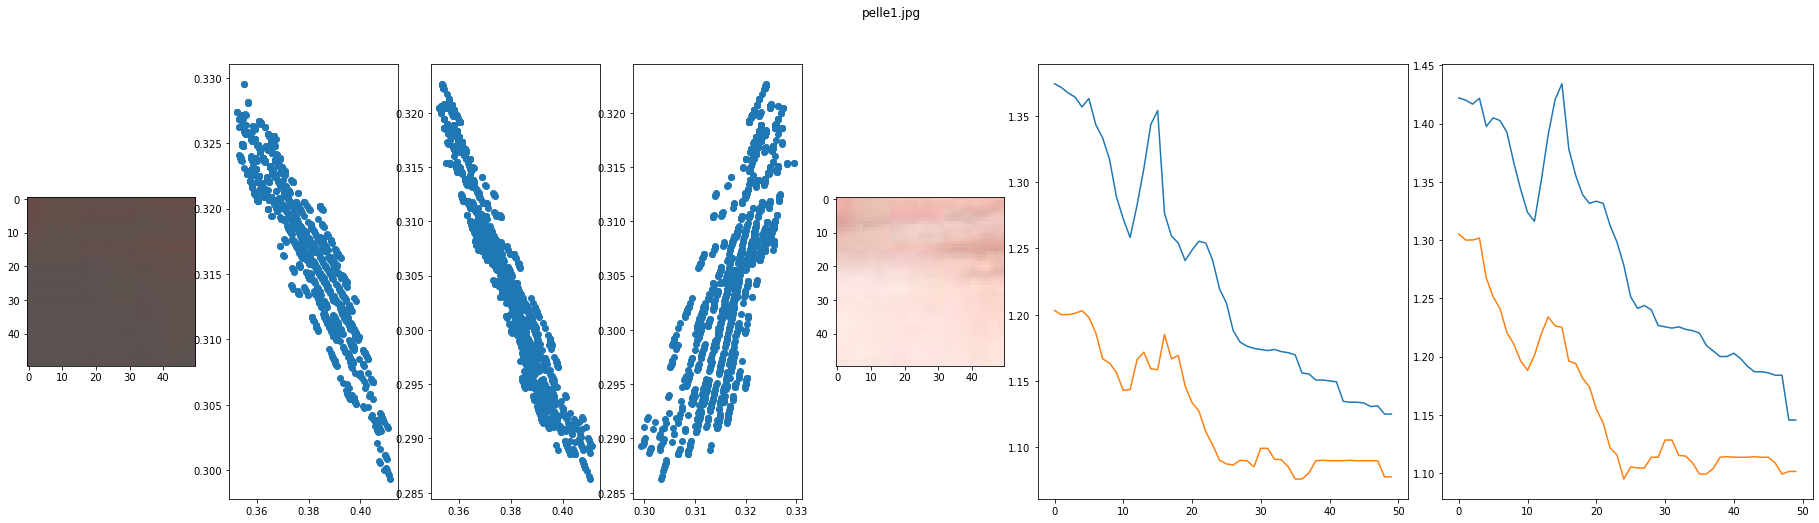

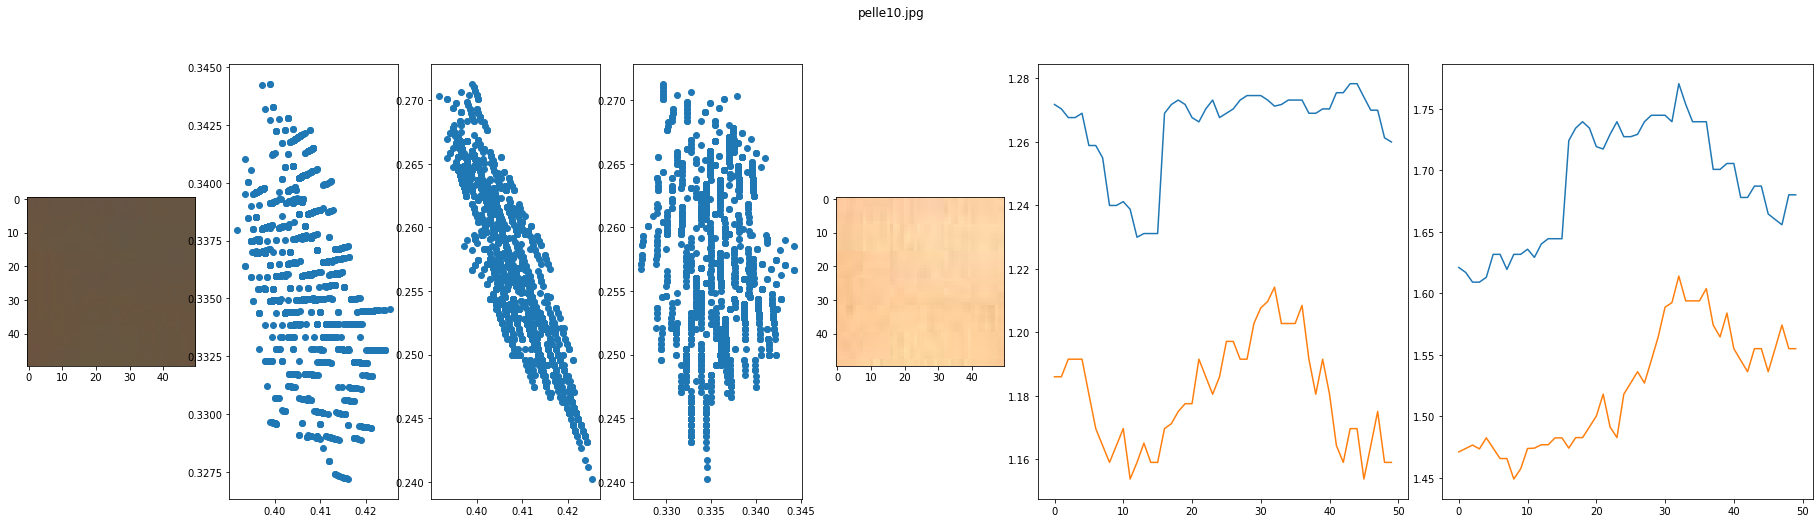

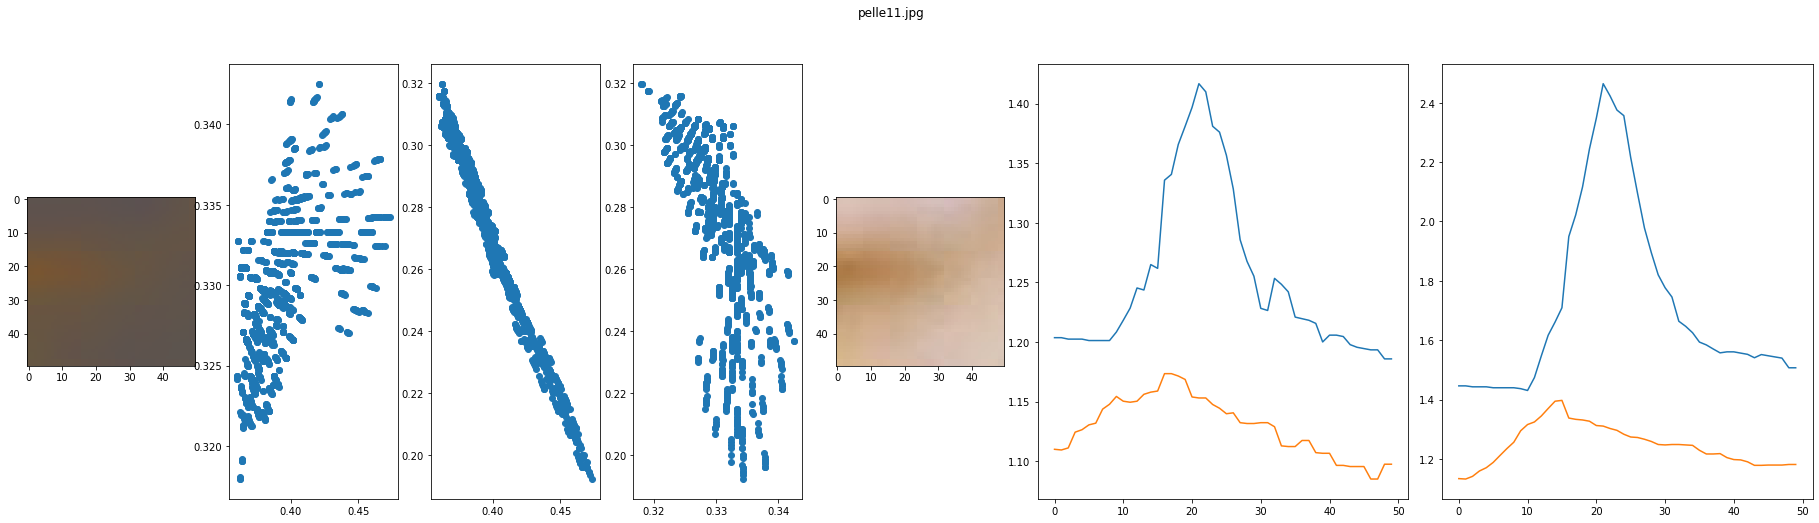

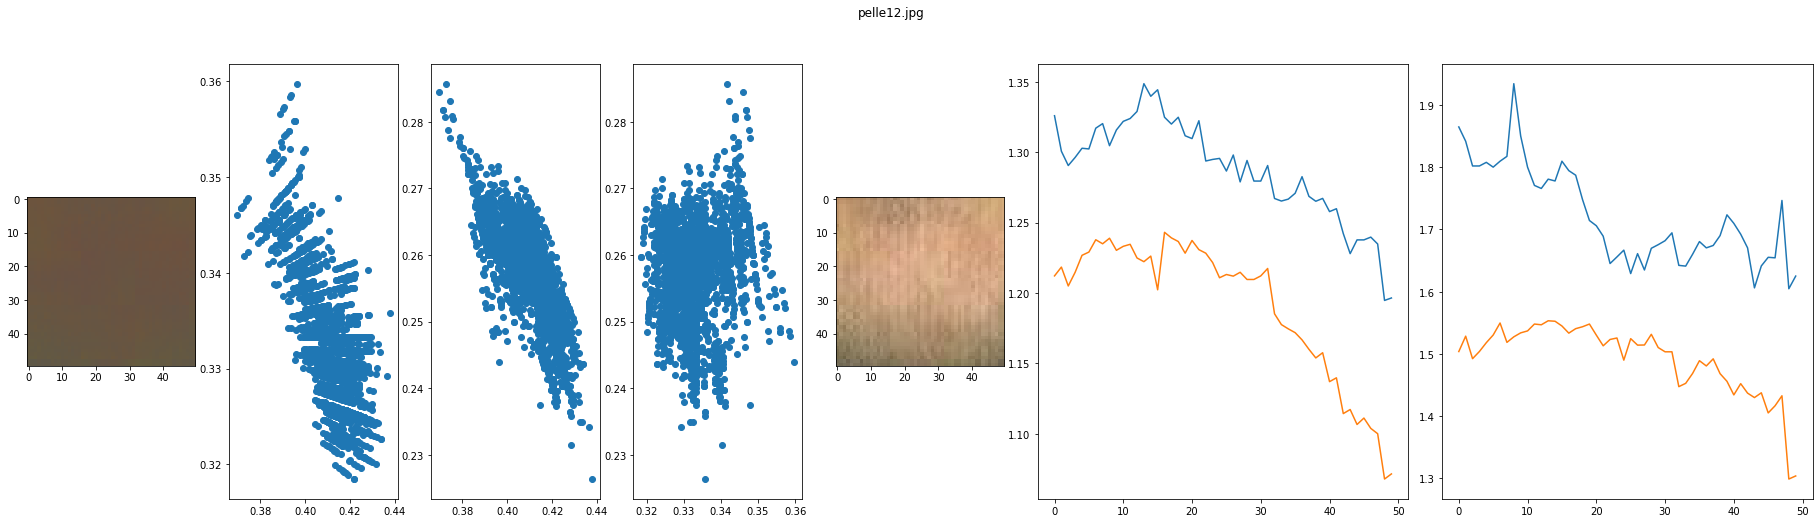

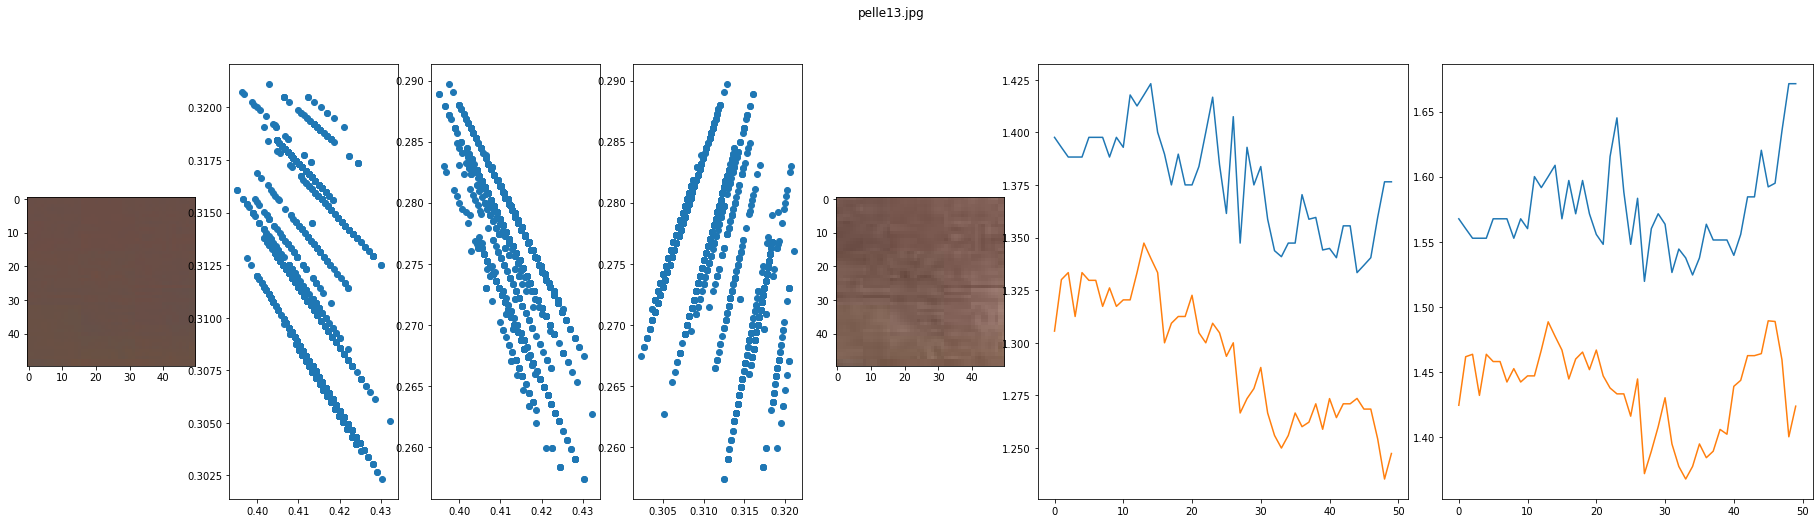

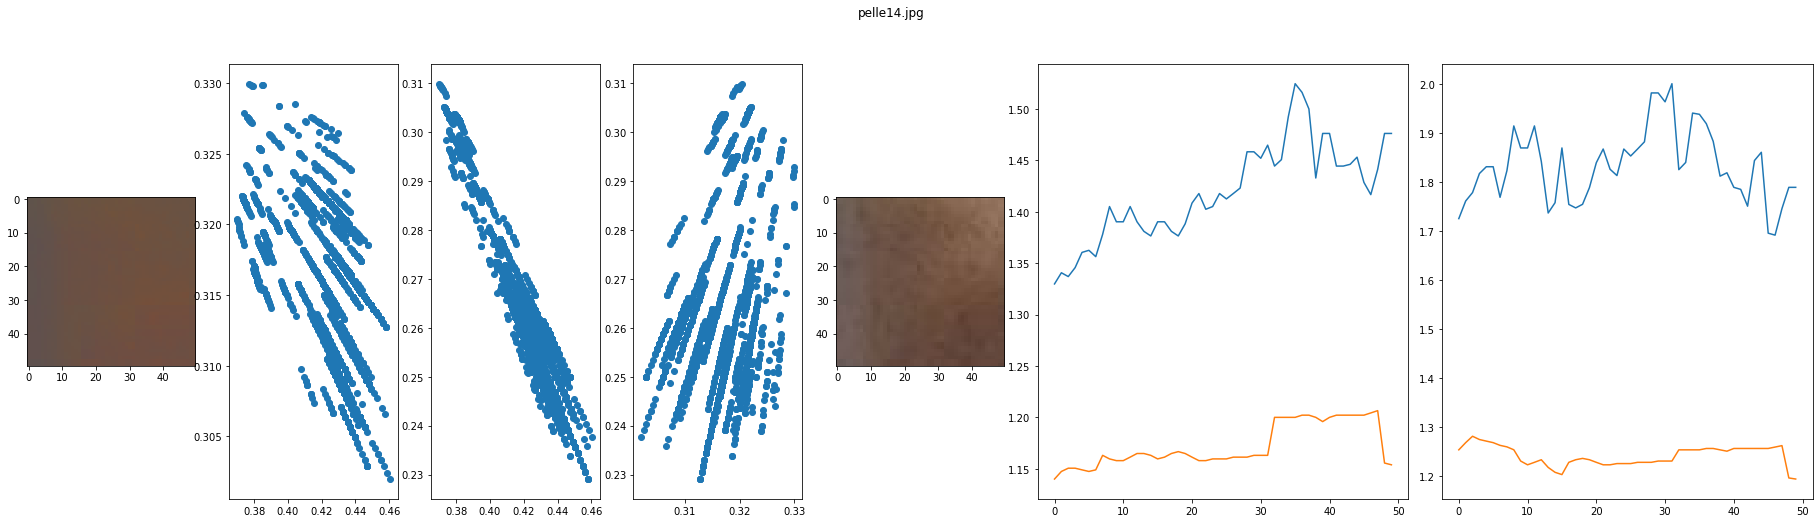

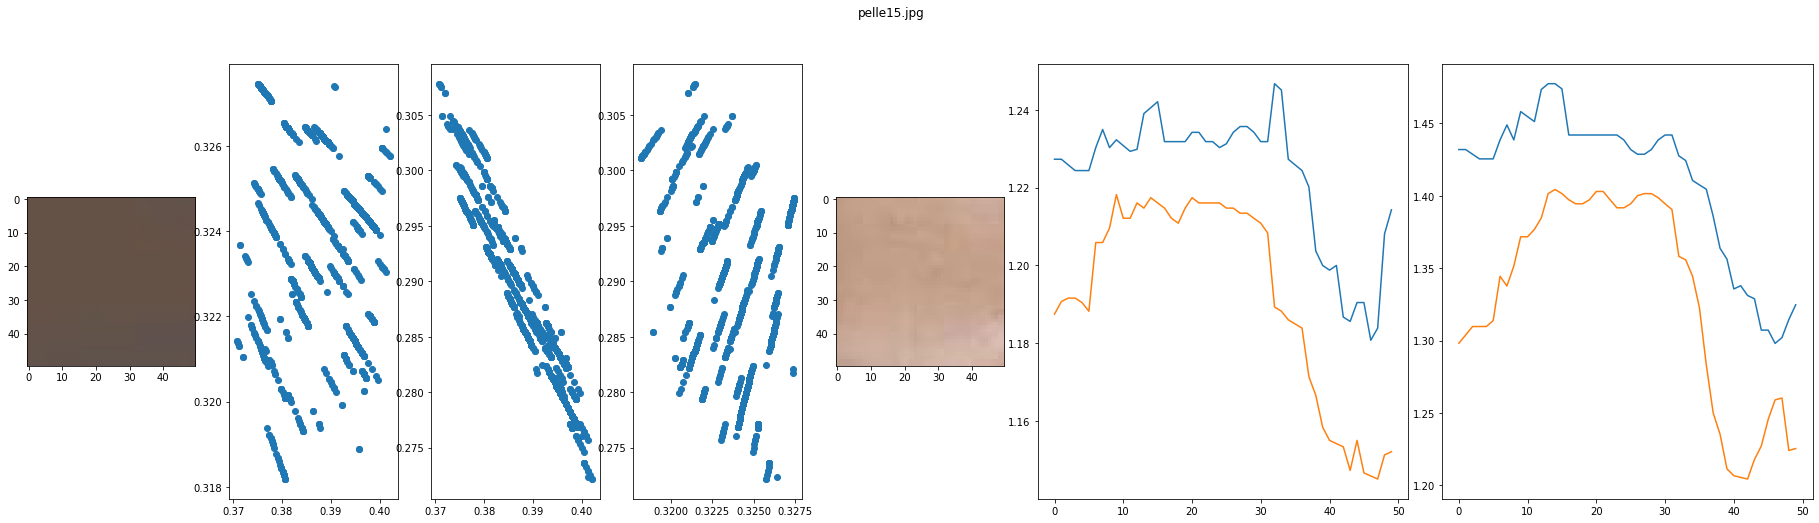

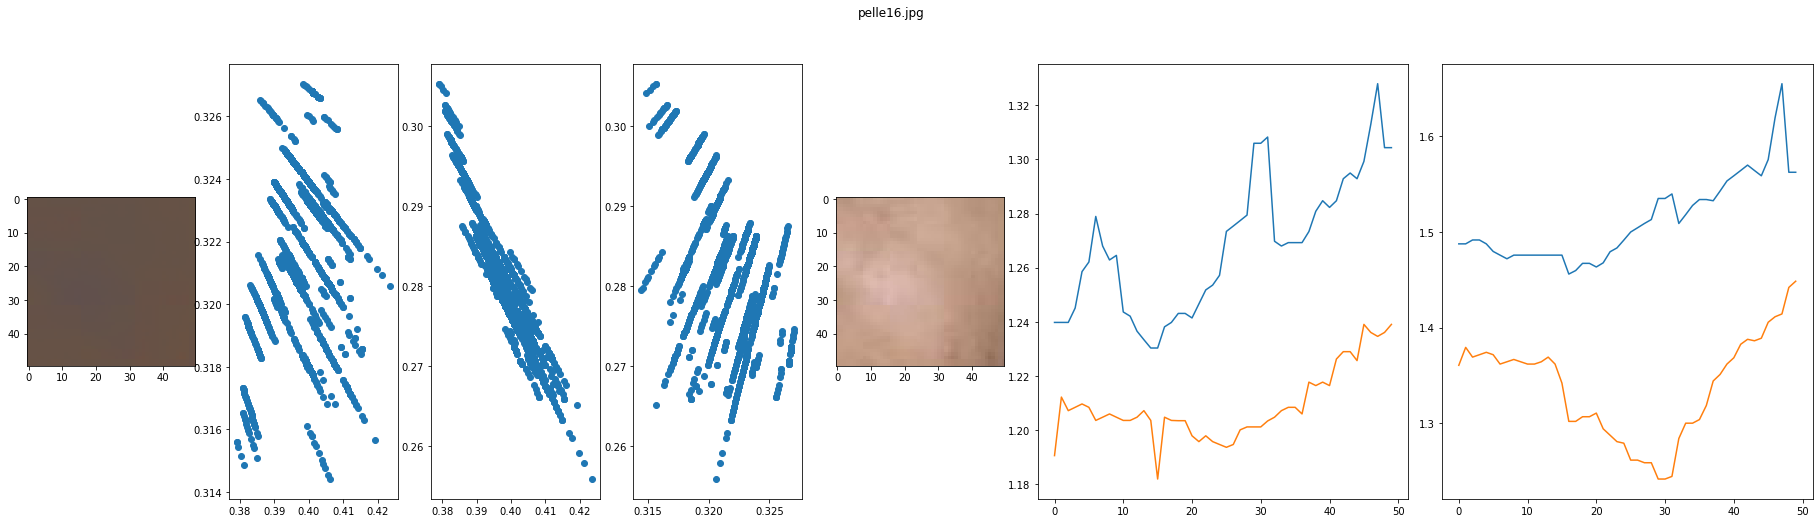

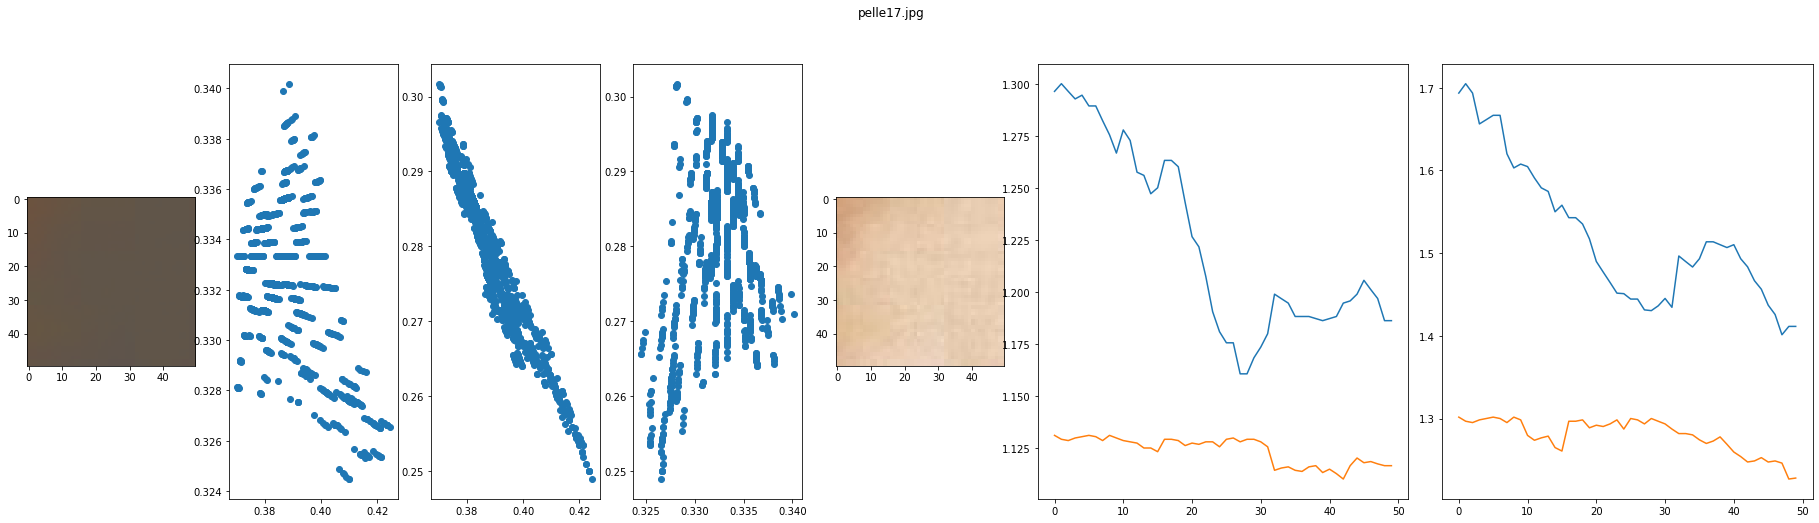

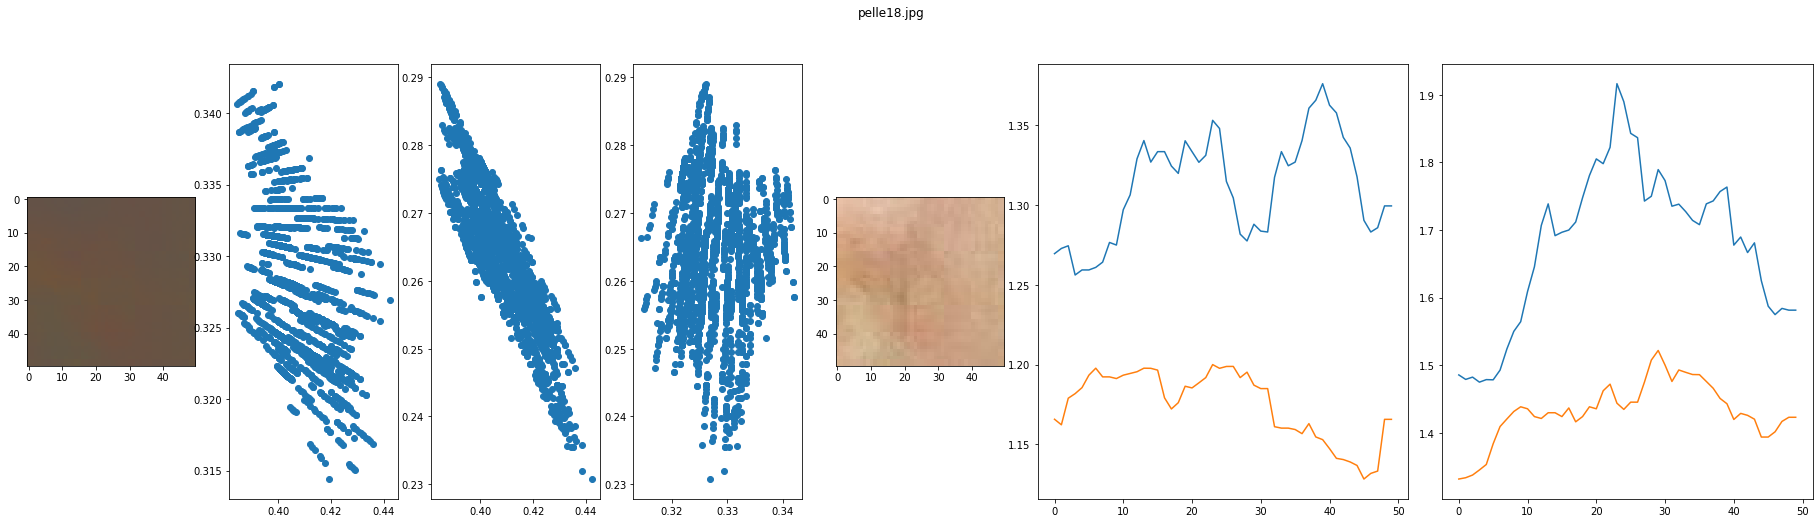

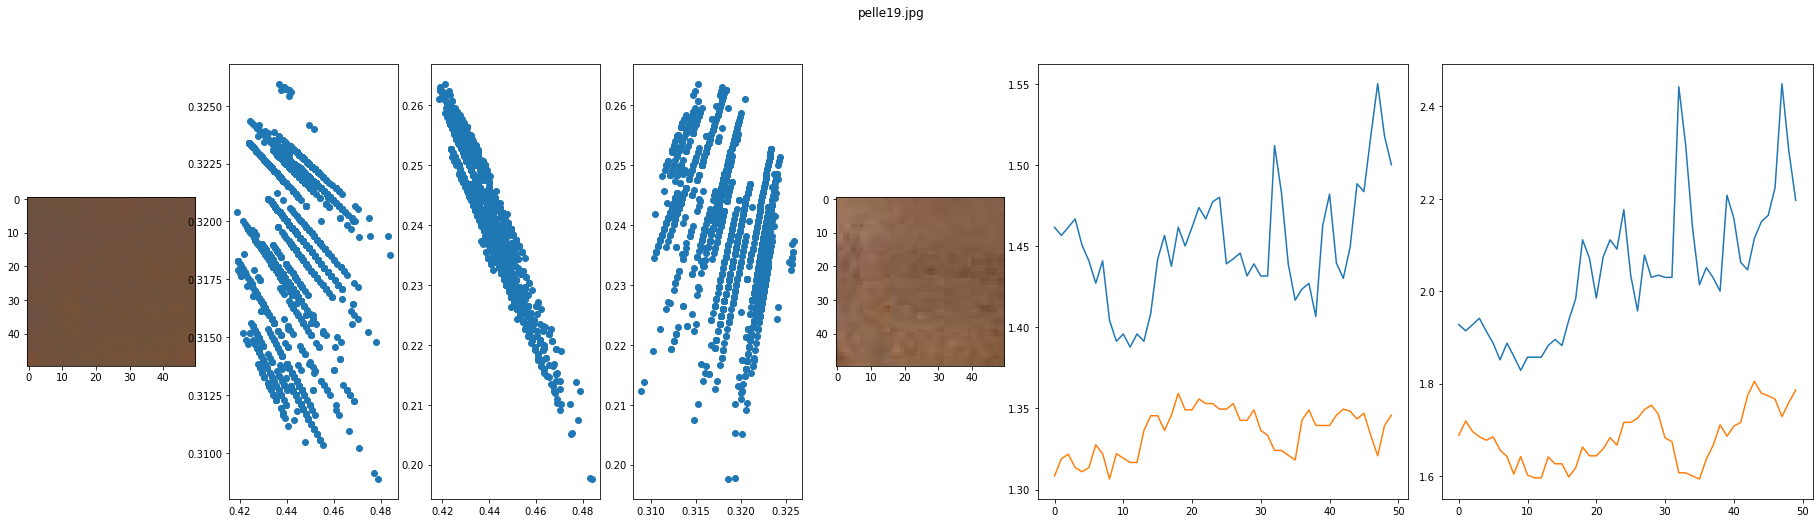

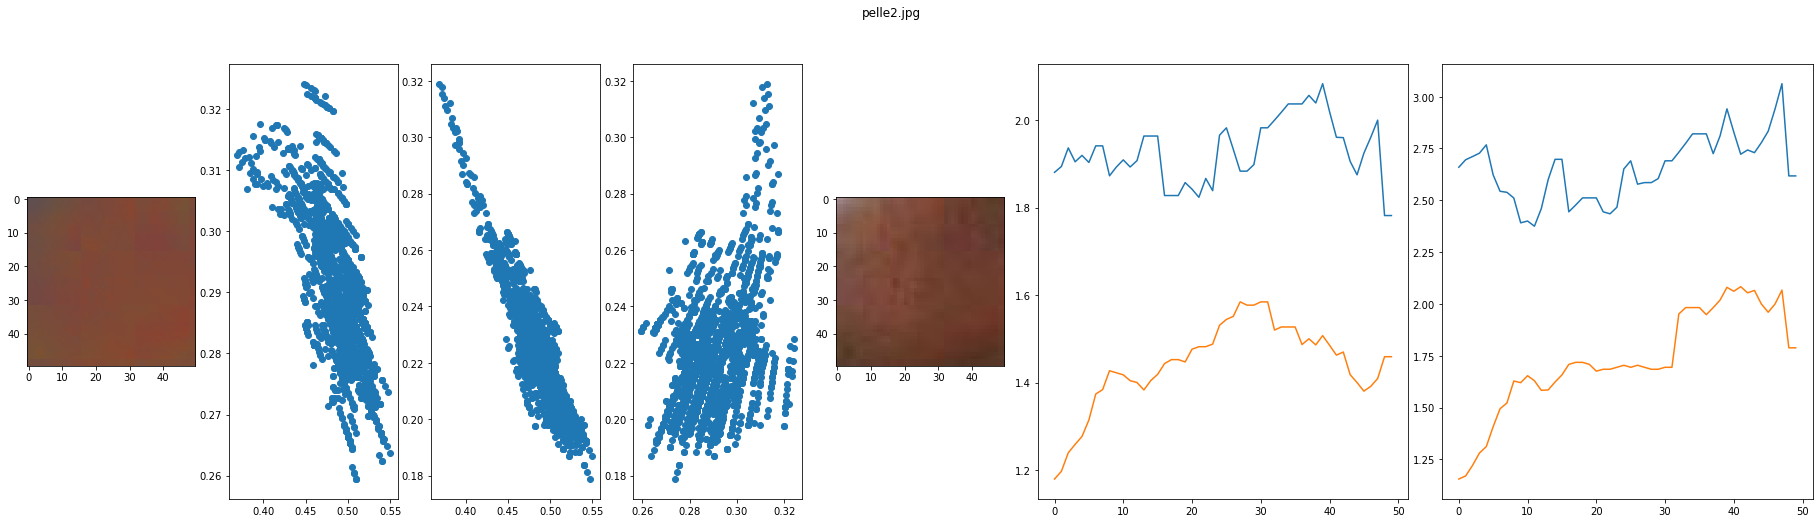

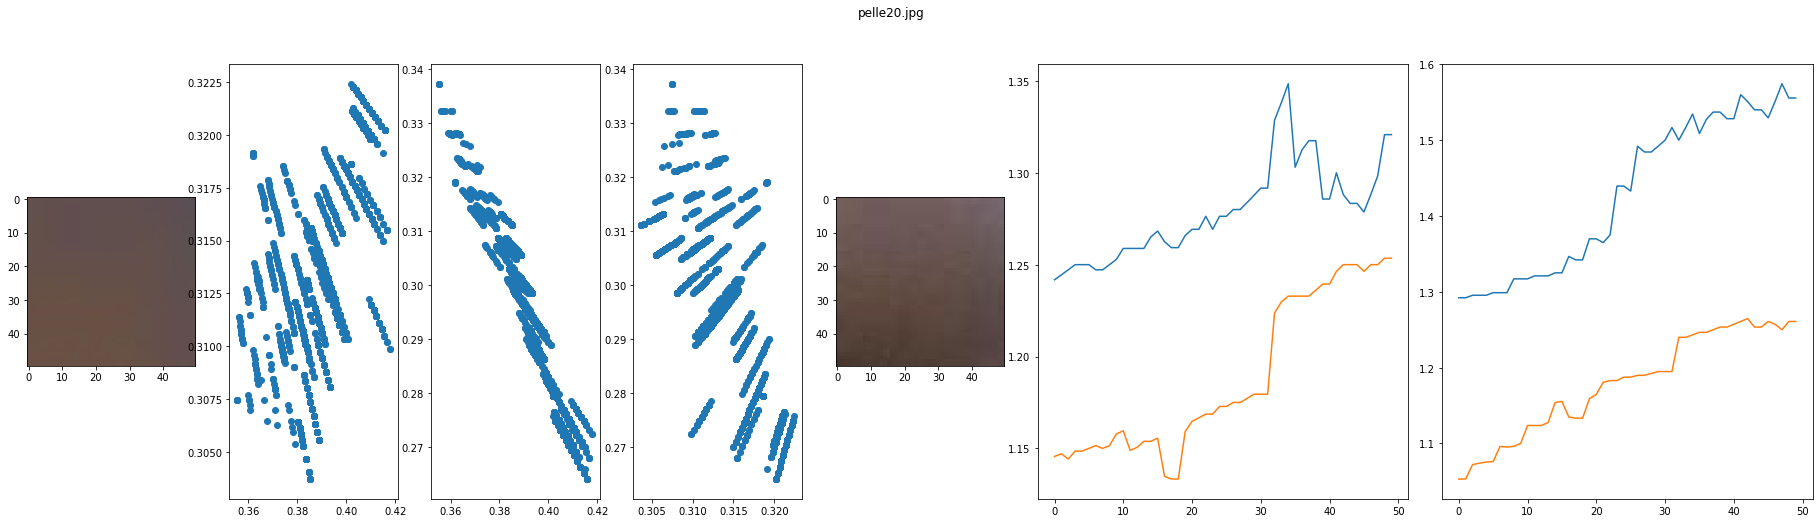

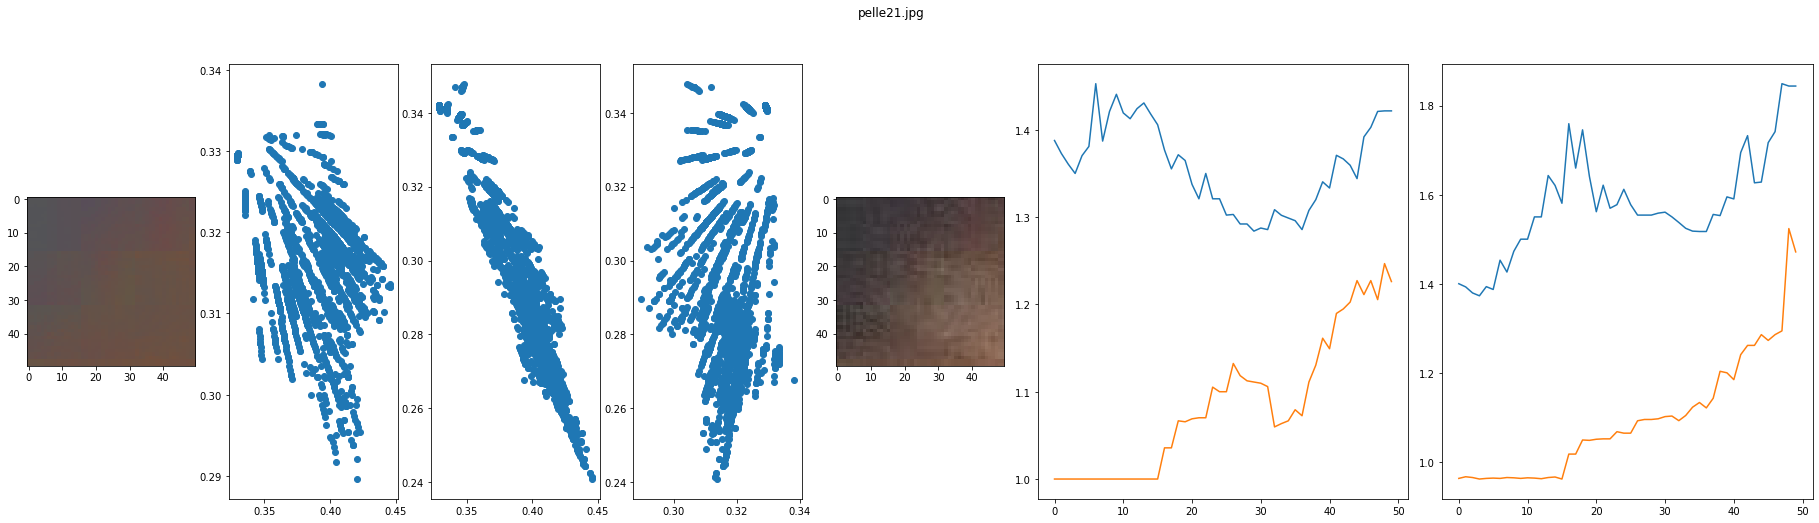

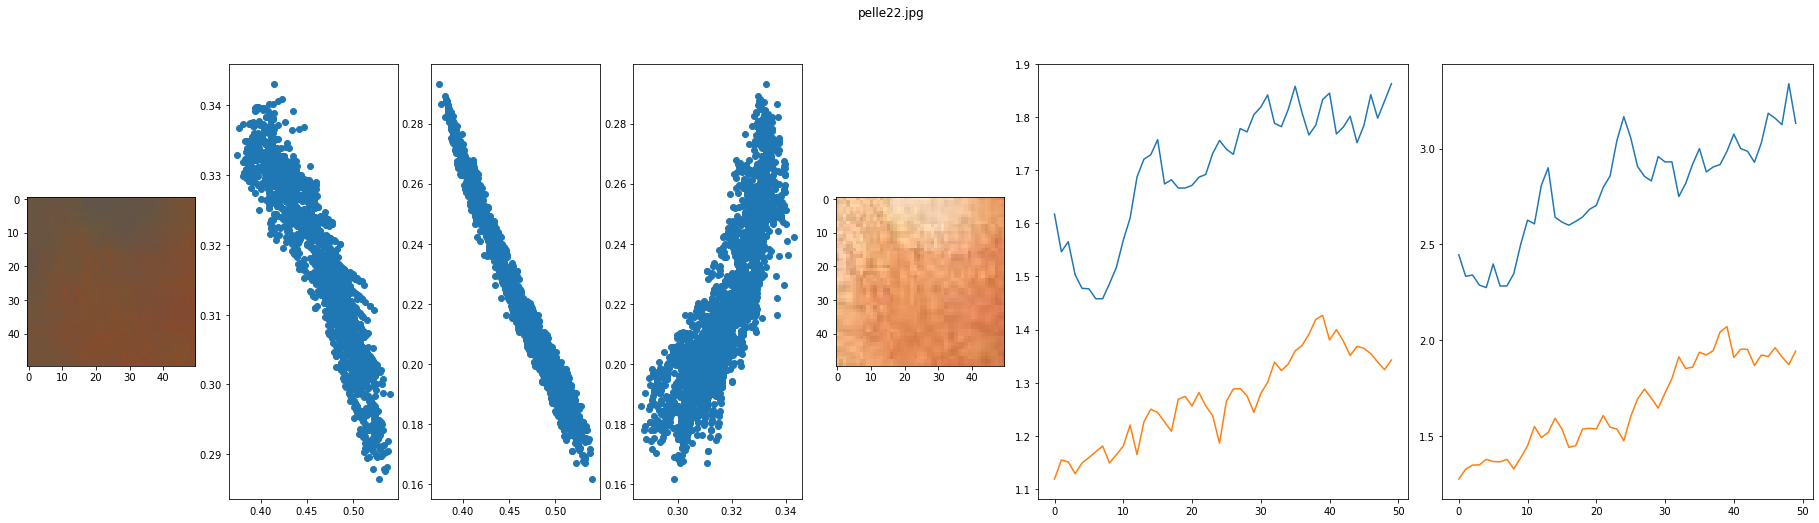

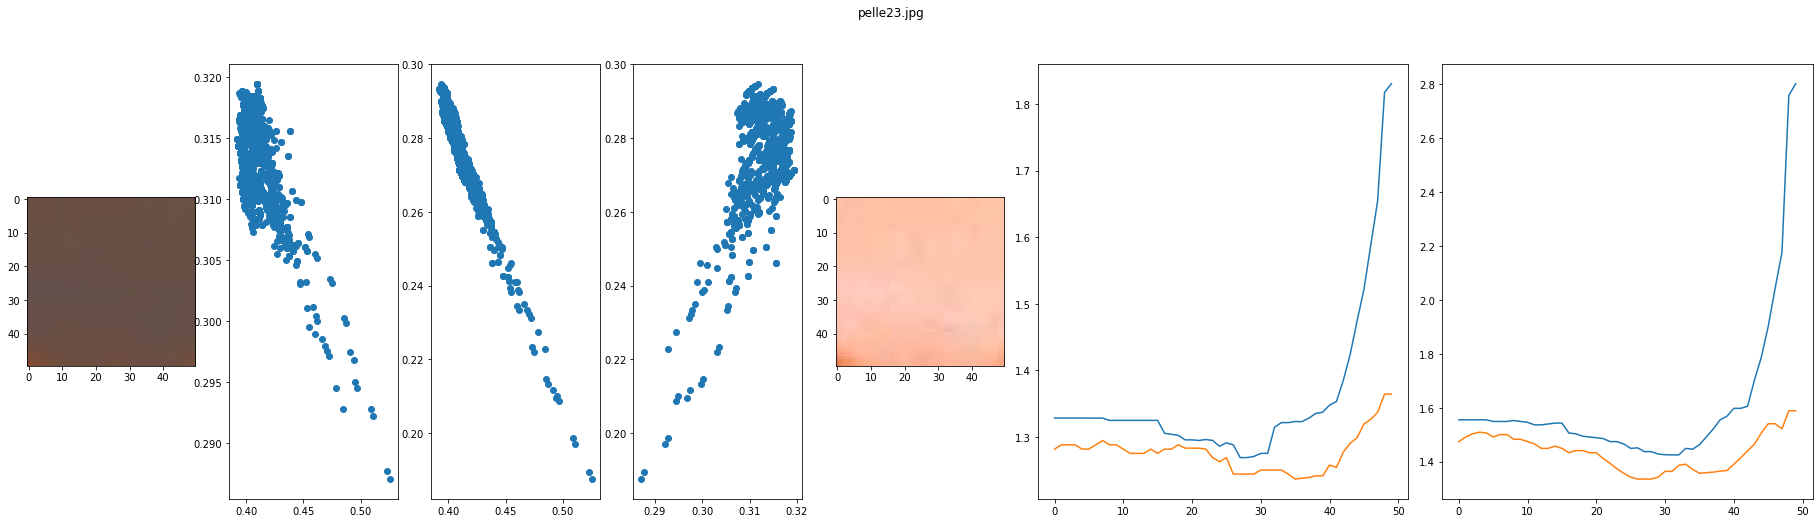

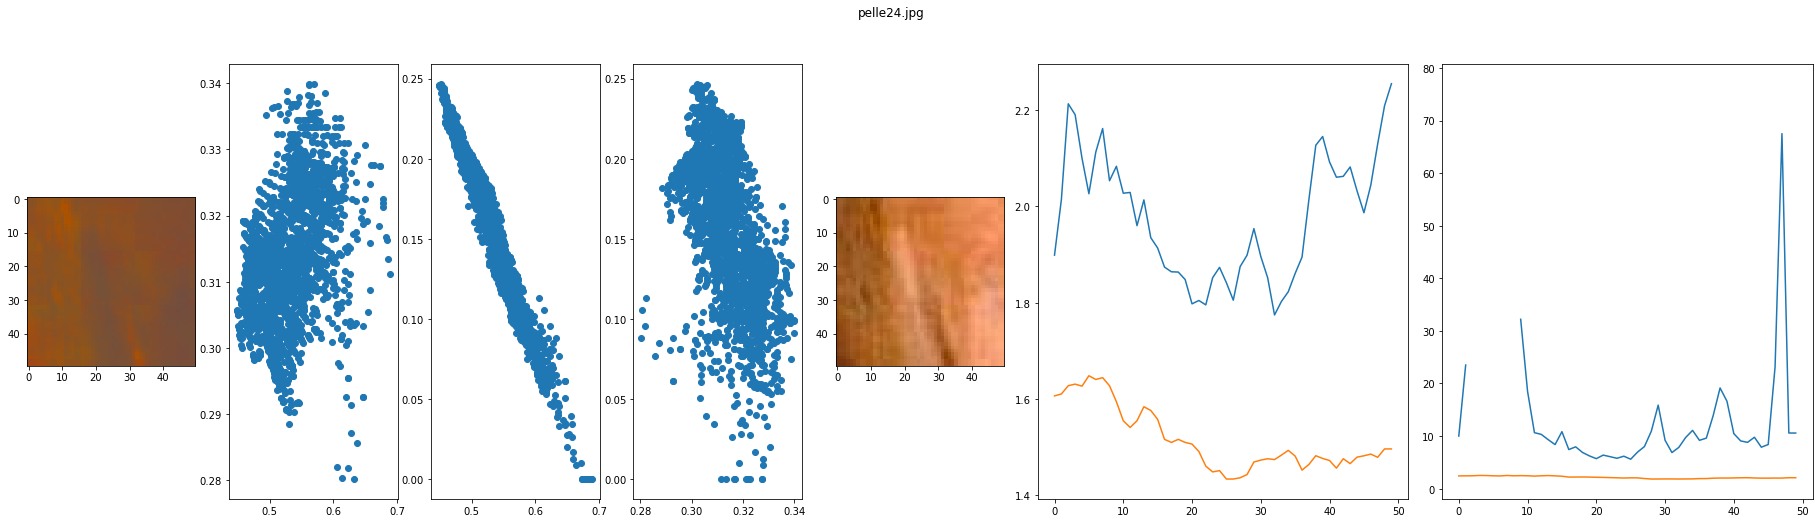

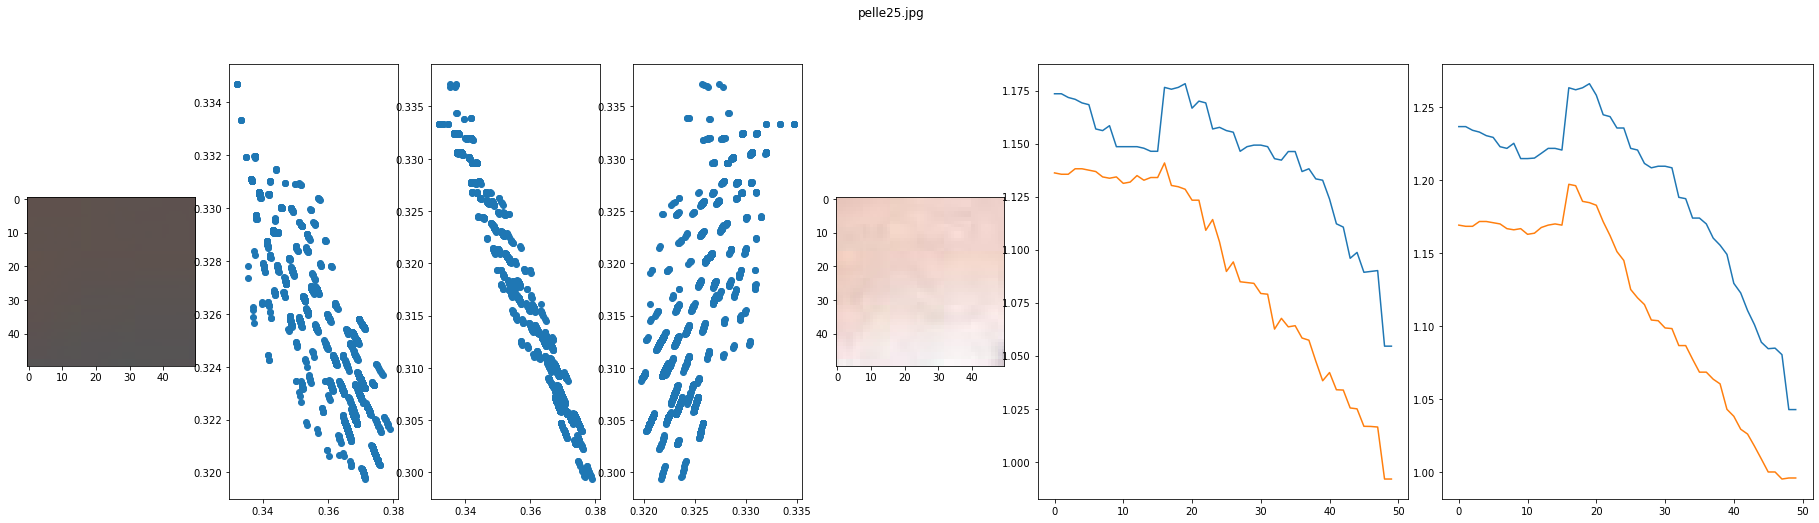

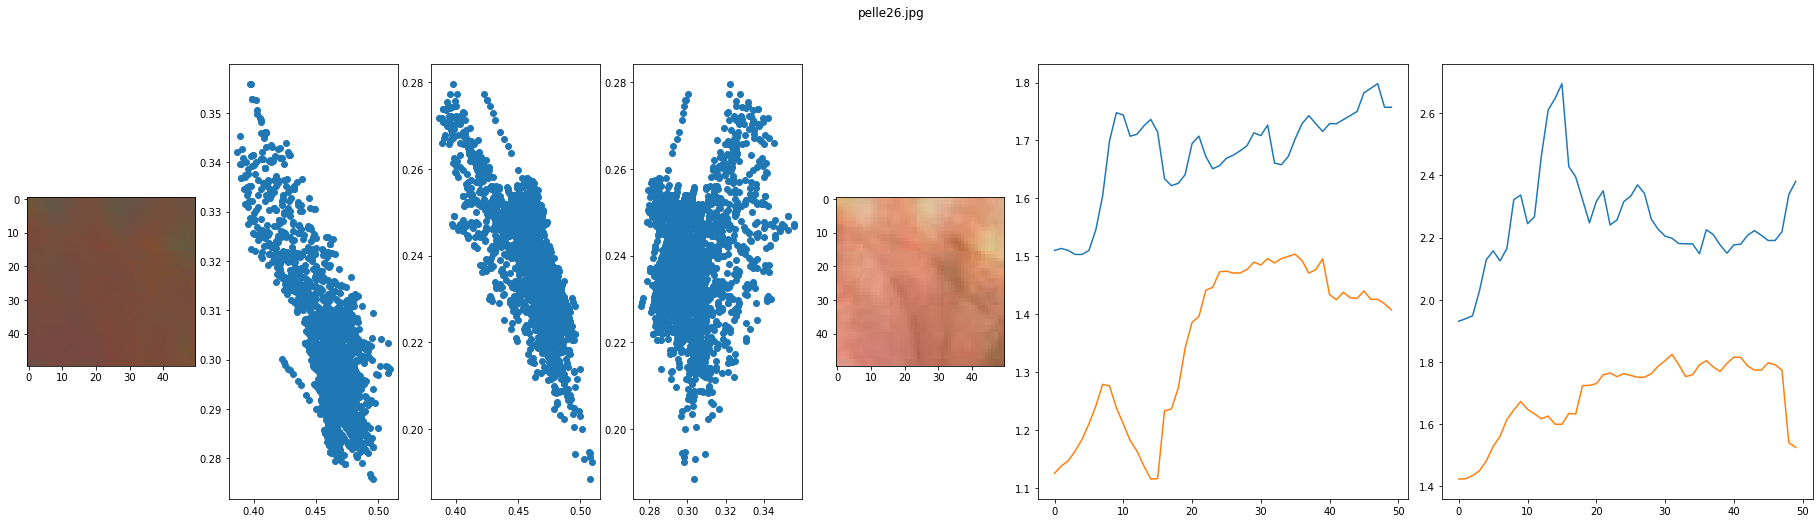

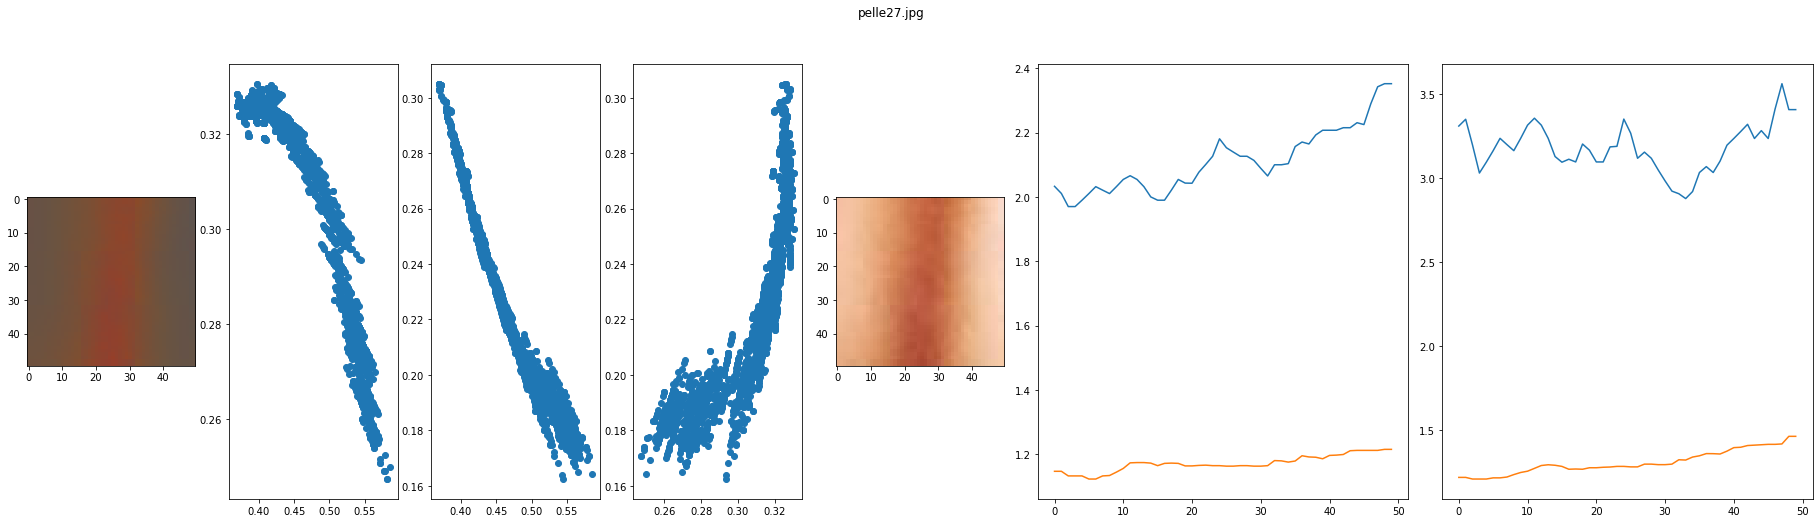

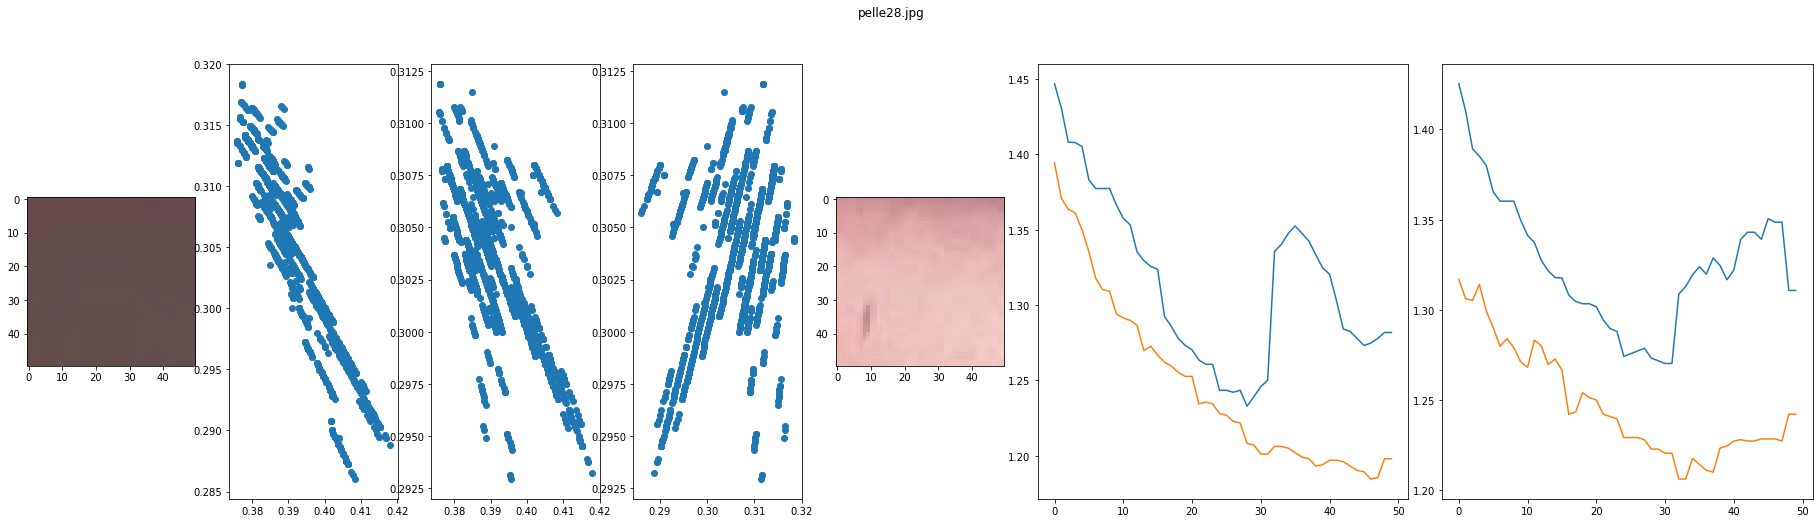

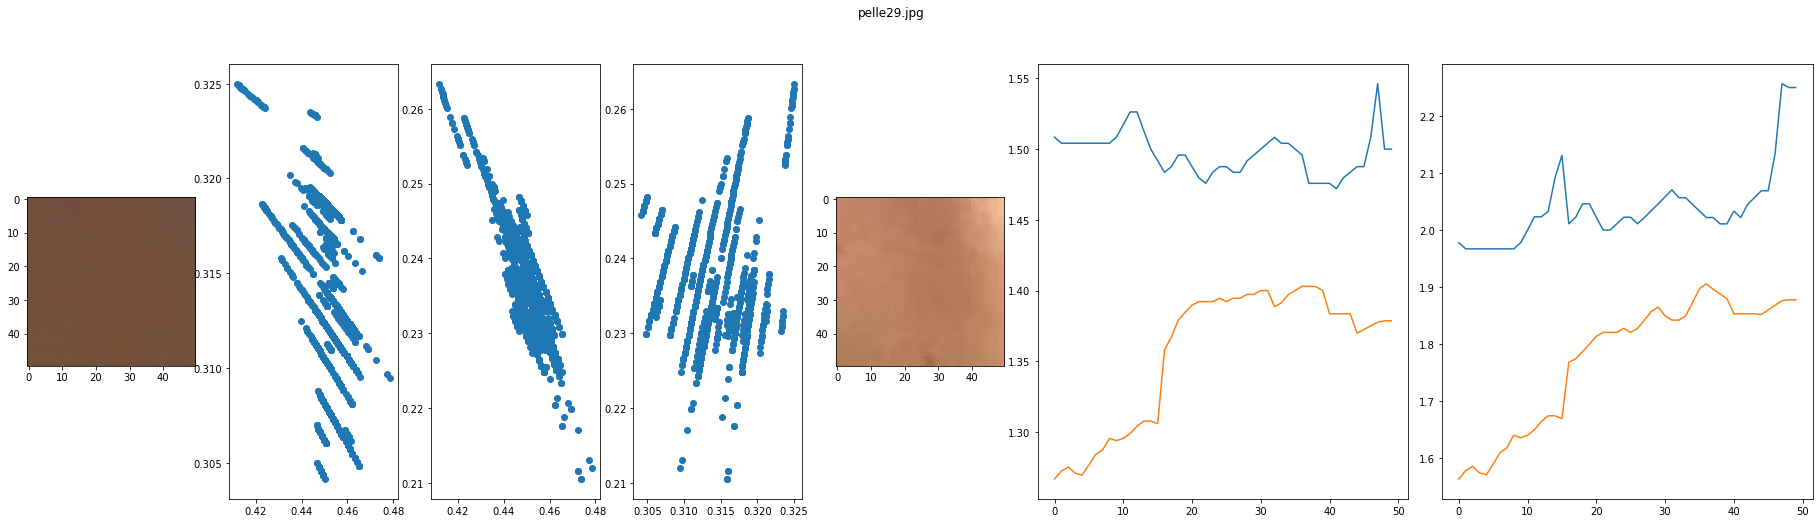

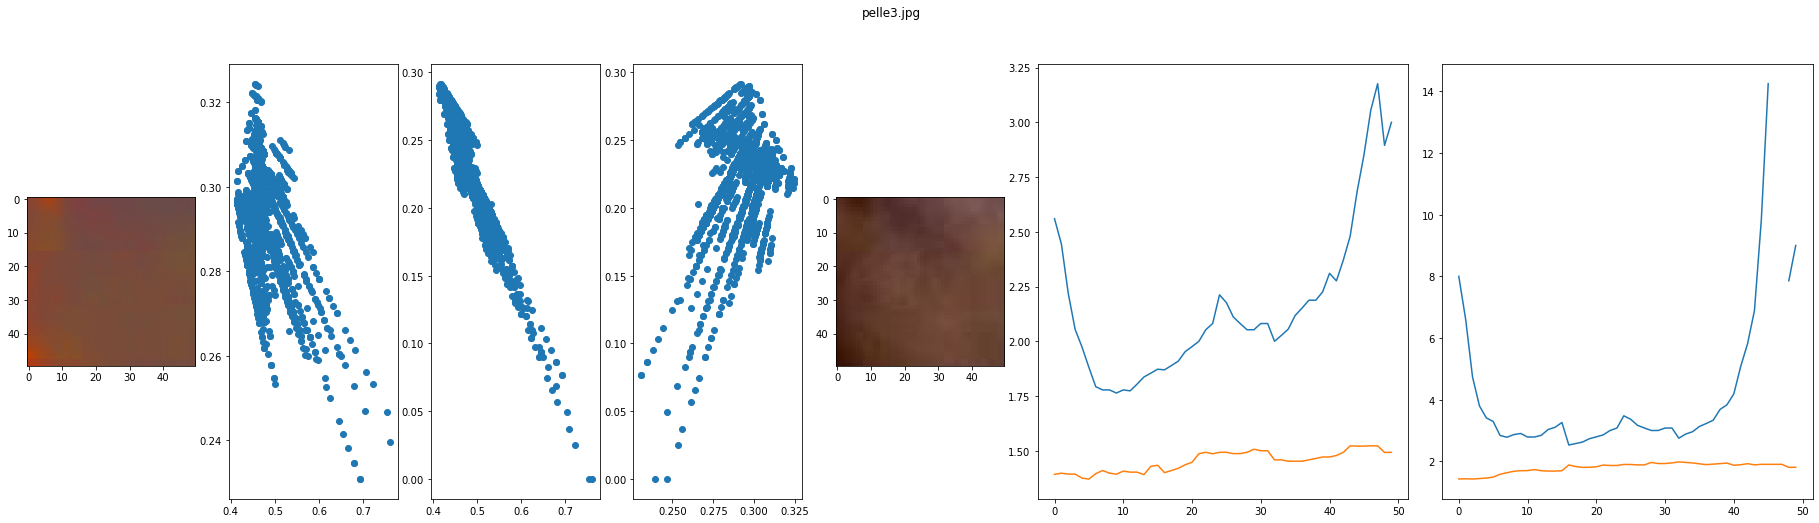

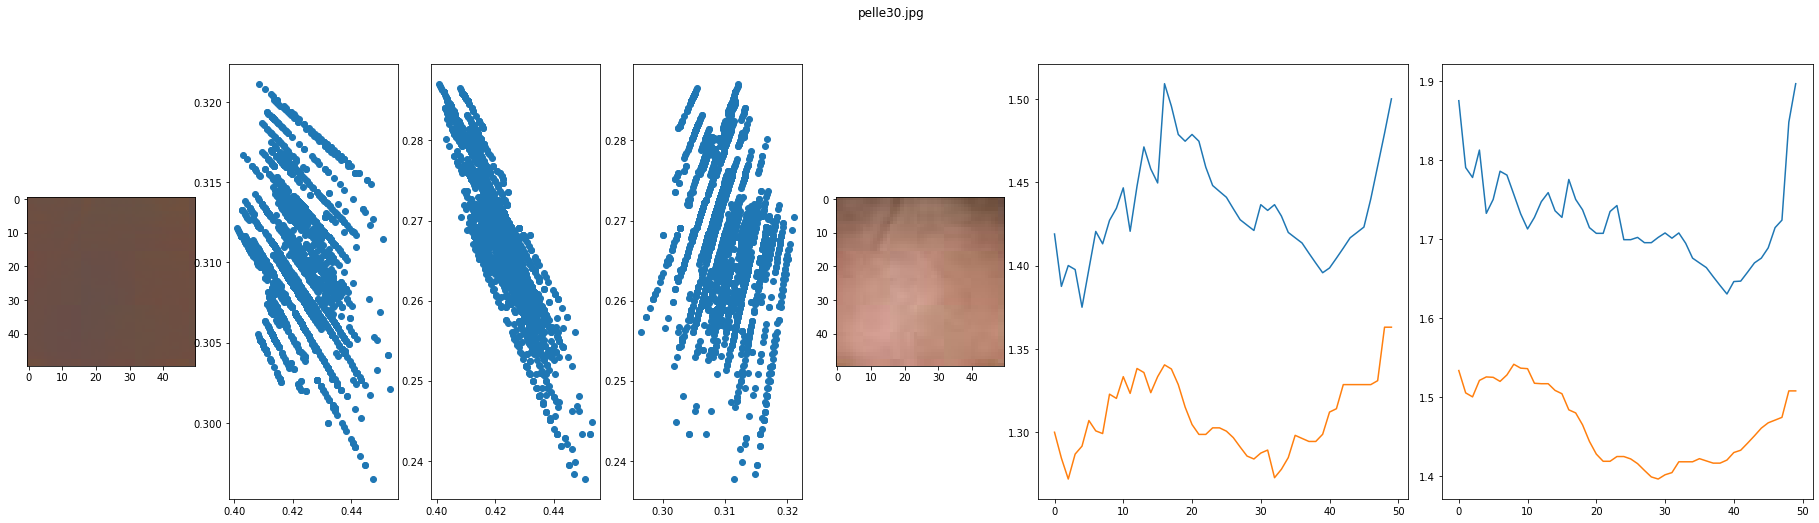

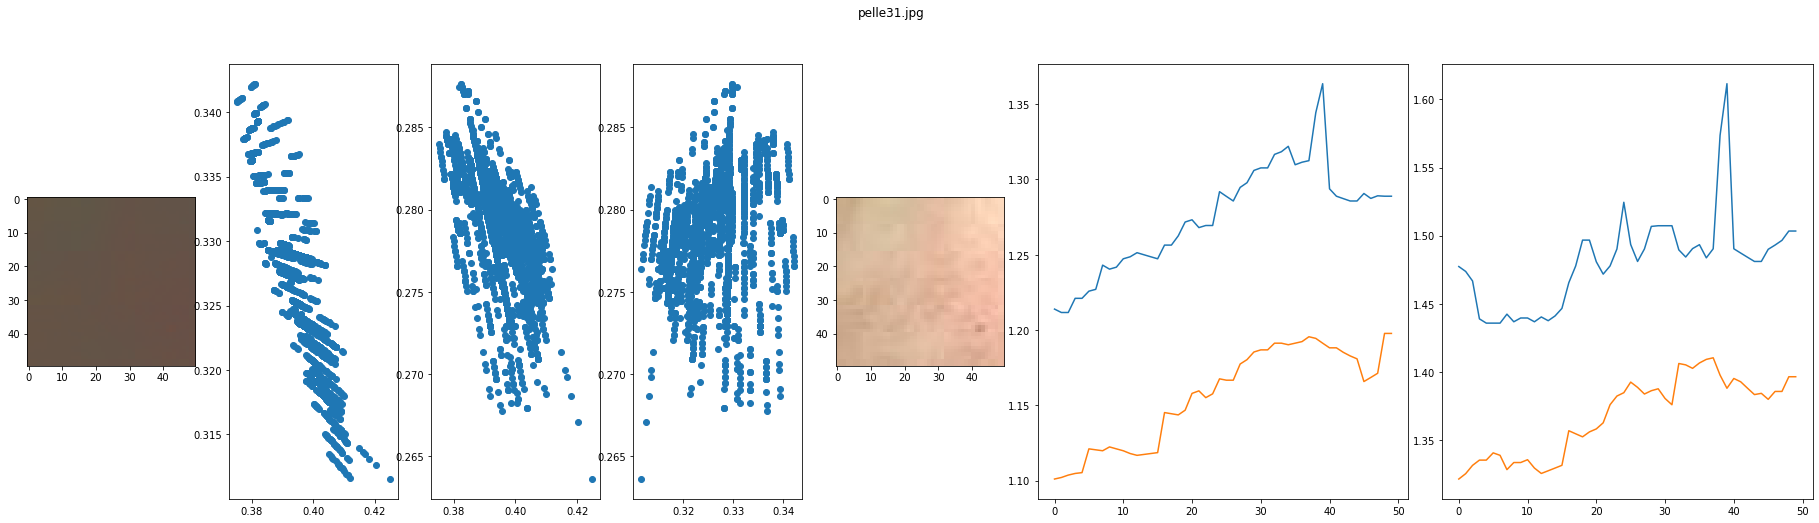

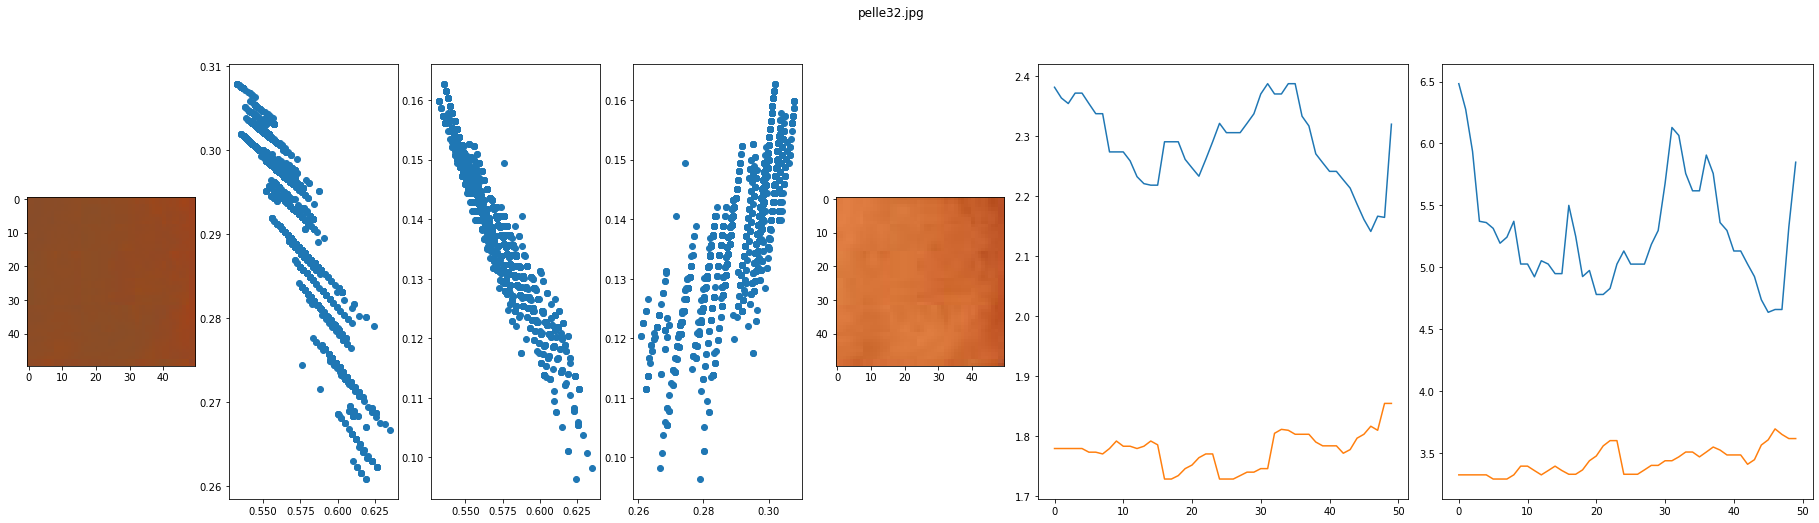

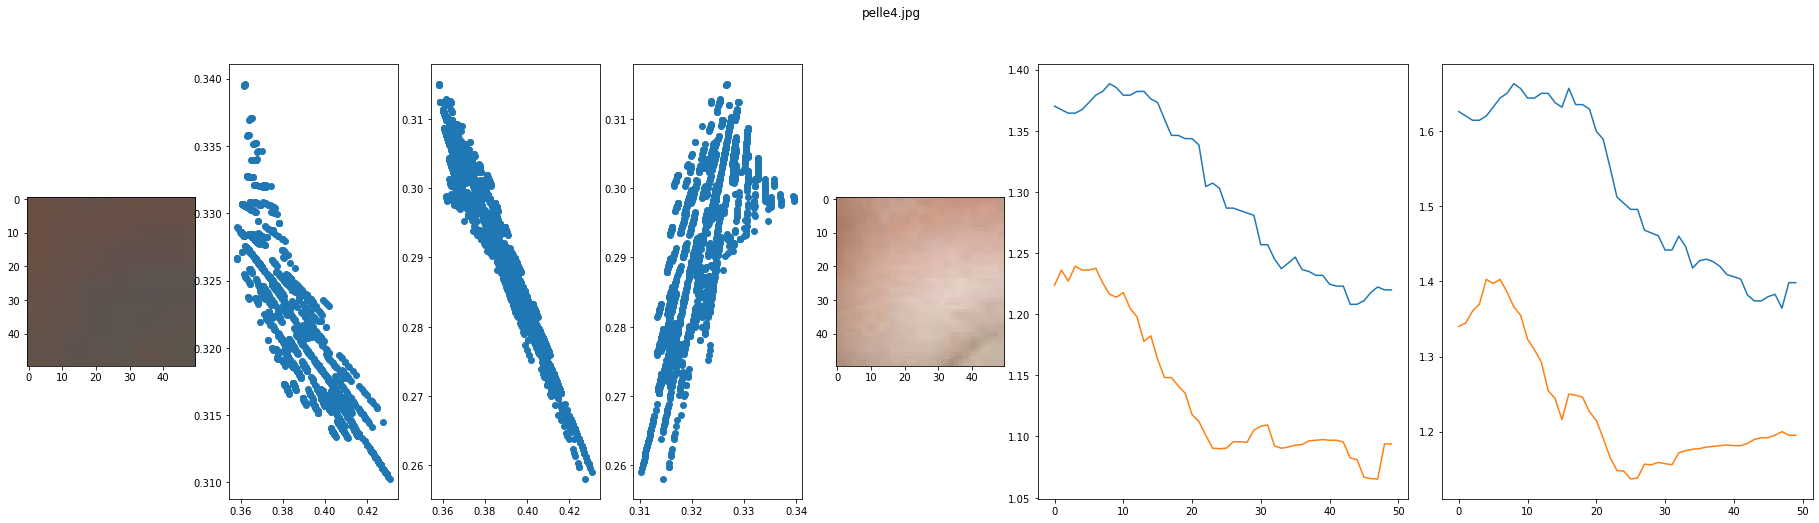

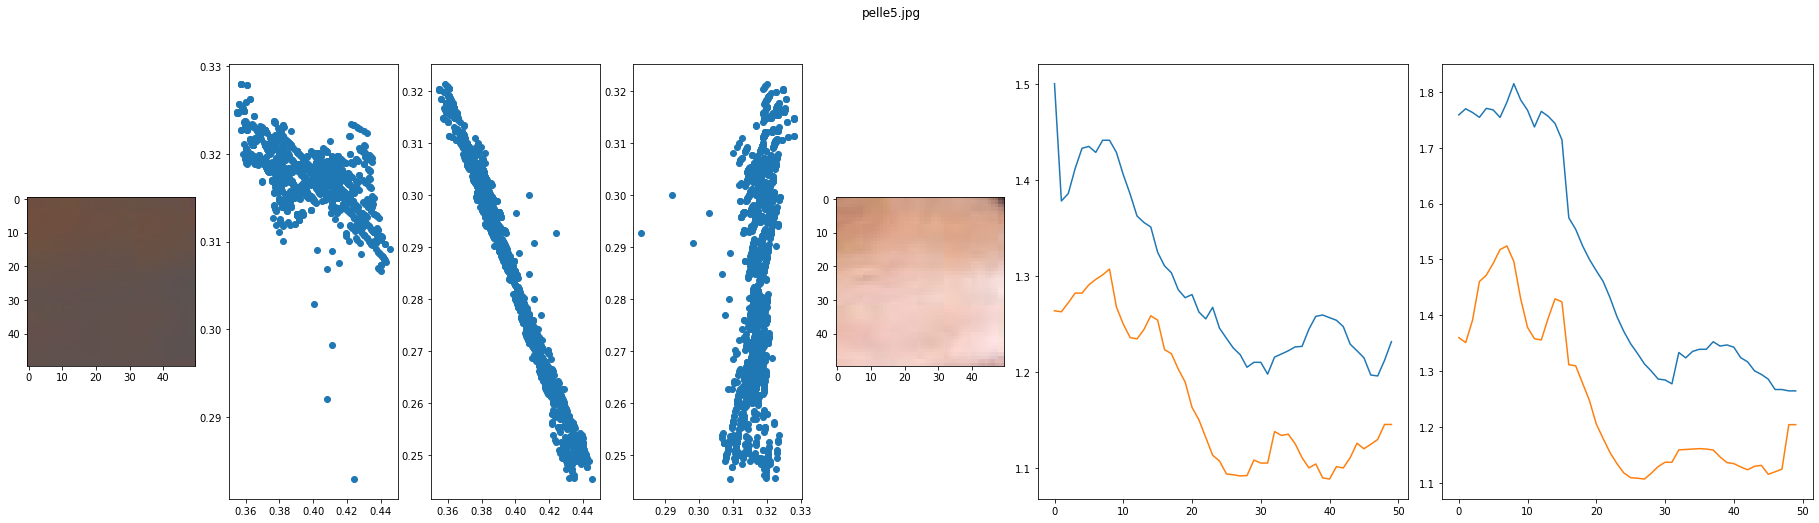

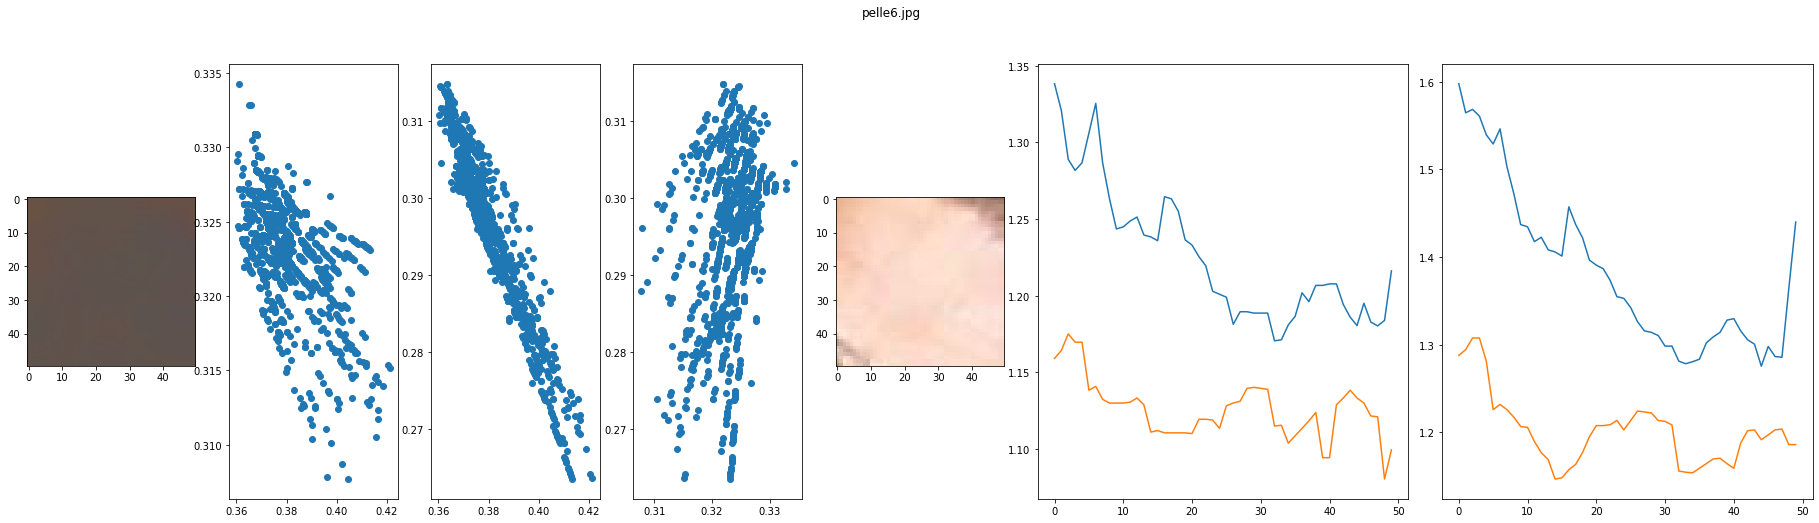

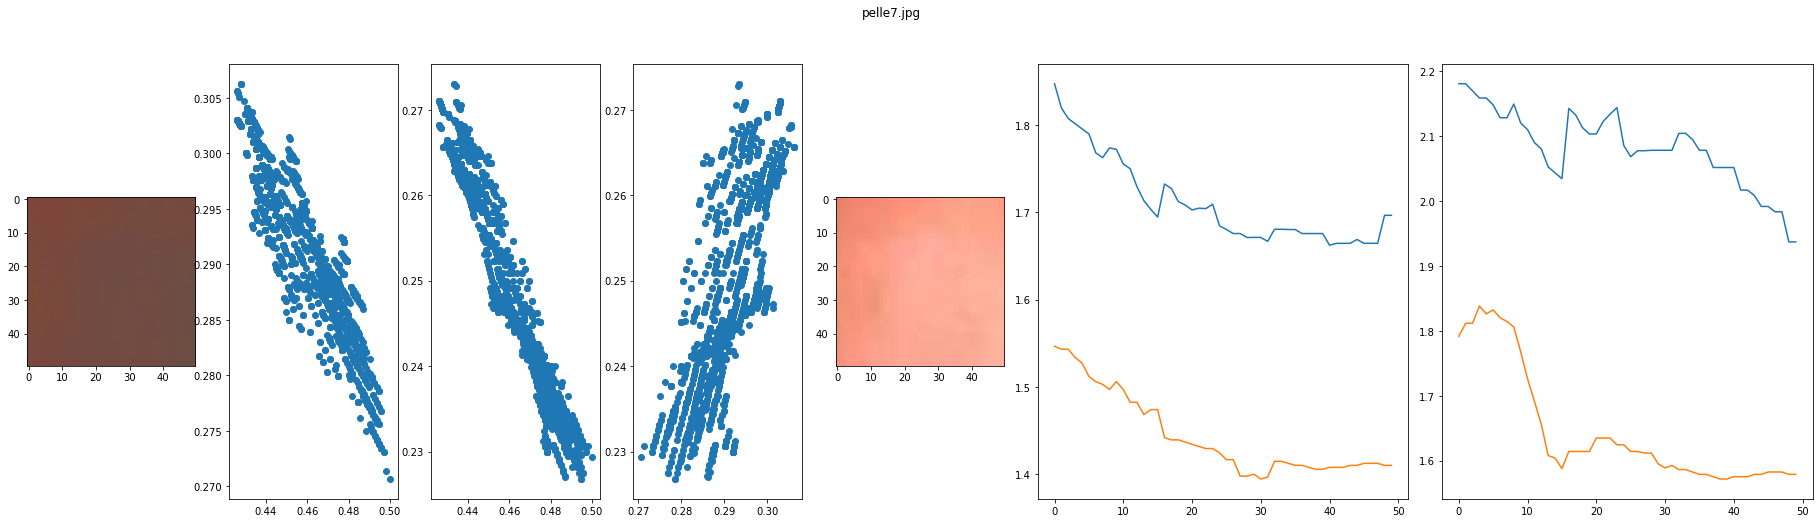

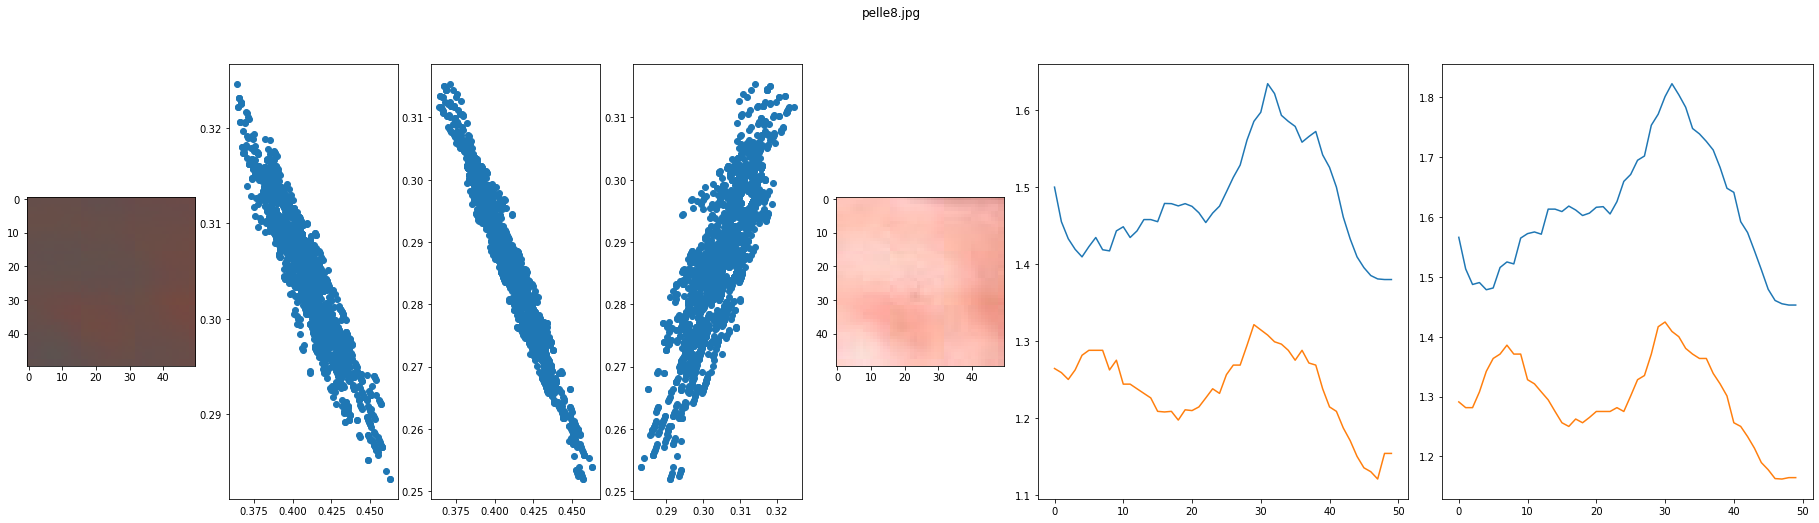

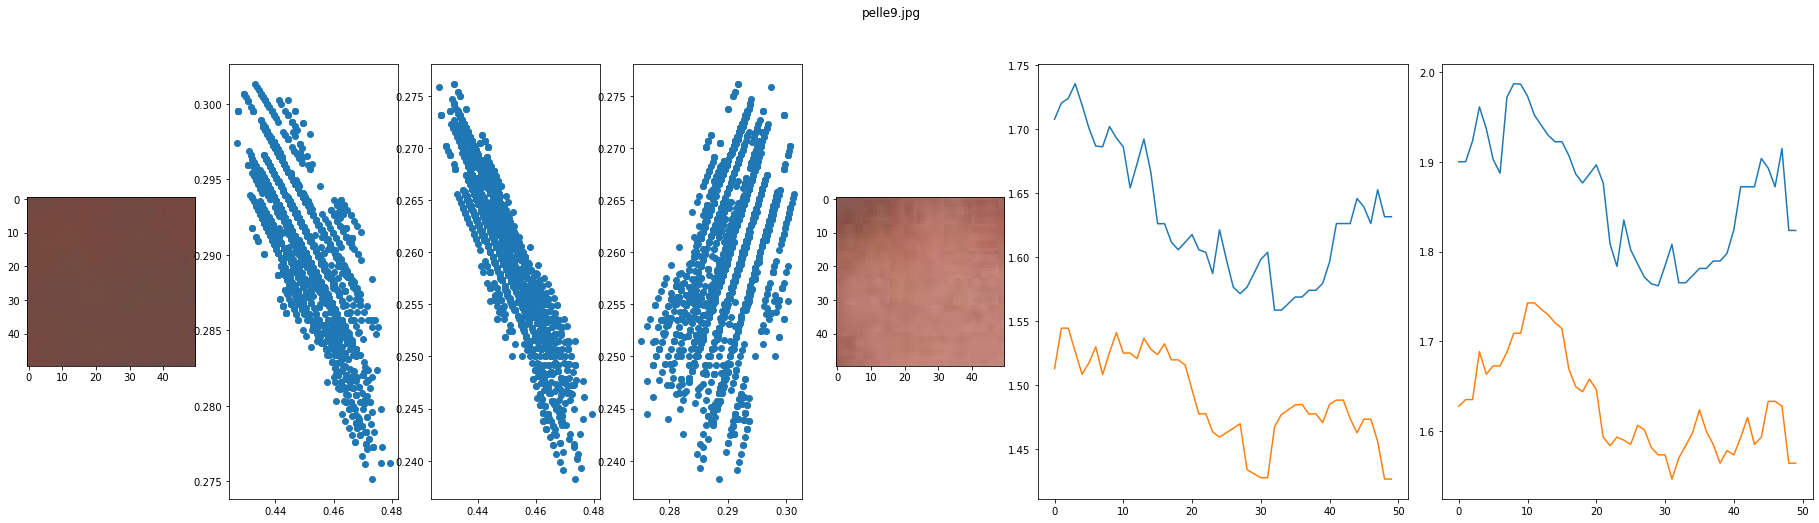

In [6]:
run_skin_analysis_norm()

98% perc max = 156.9, 255.0
5% perc min = 53.35, 15.700000000000001


<Figure size 2304x288 with 0 Axes>

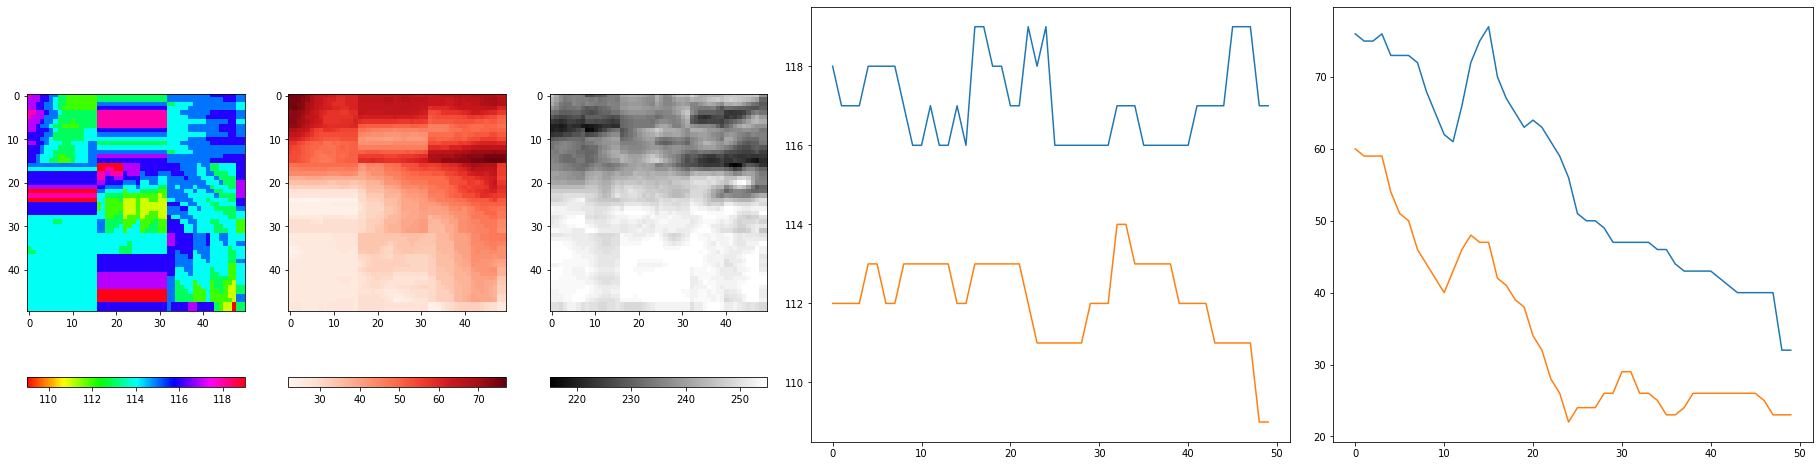

<Figure size 2304x288 with 0 Axes>

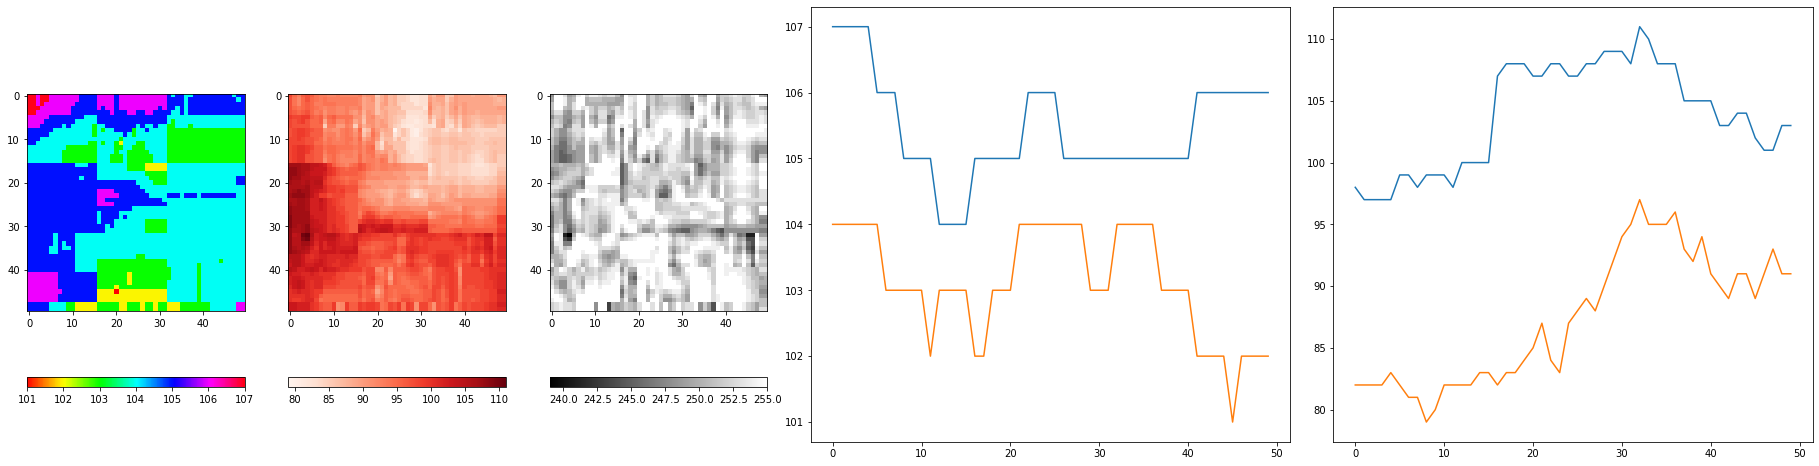

<Figure size 2304x288 with 0 Axes>

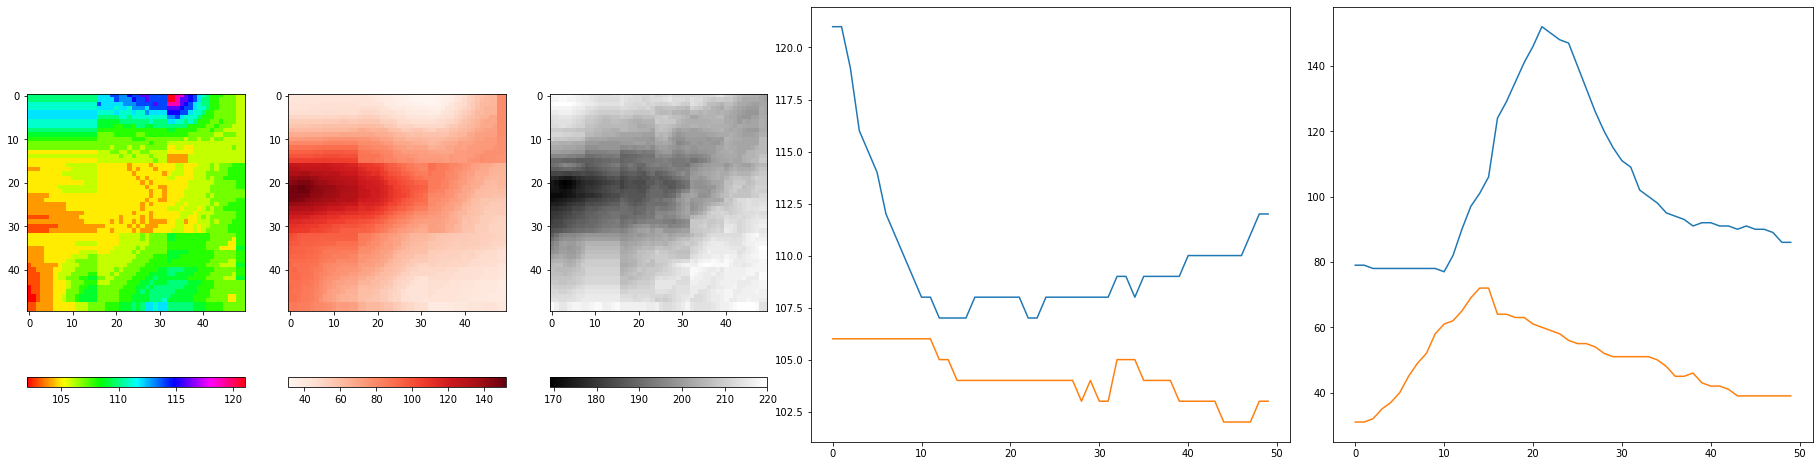

<Figure size 2304x288 with 0 Axes>

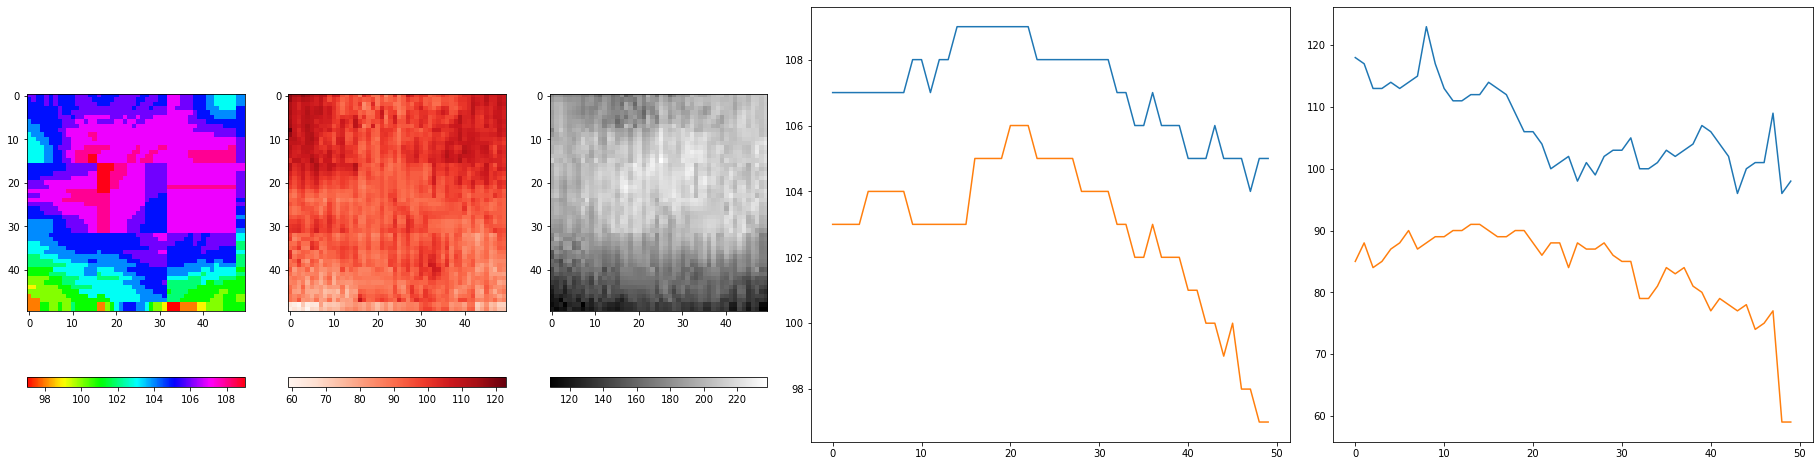

<Figure size 2304x288 with 0 Axes>

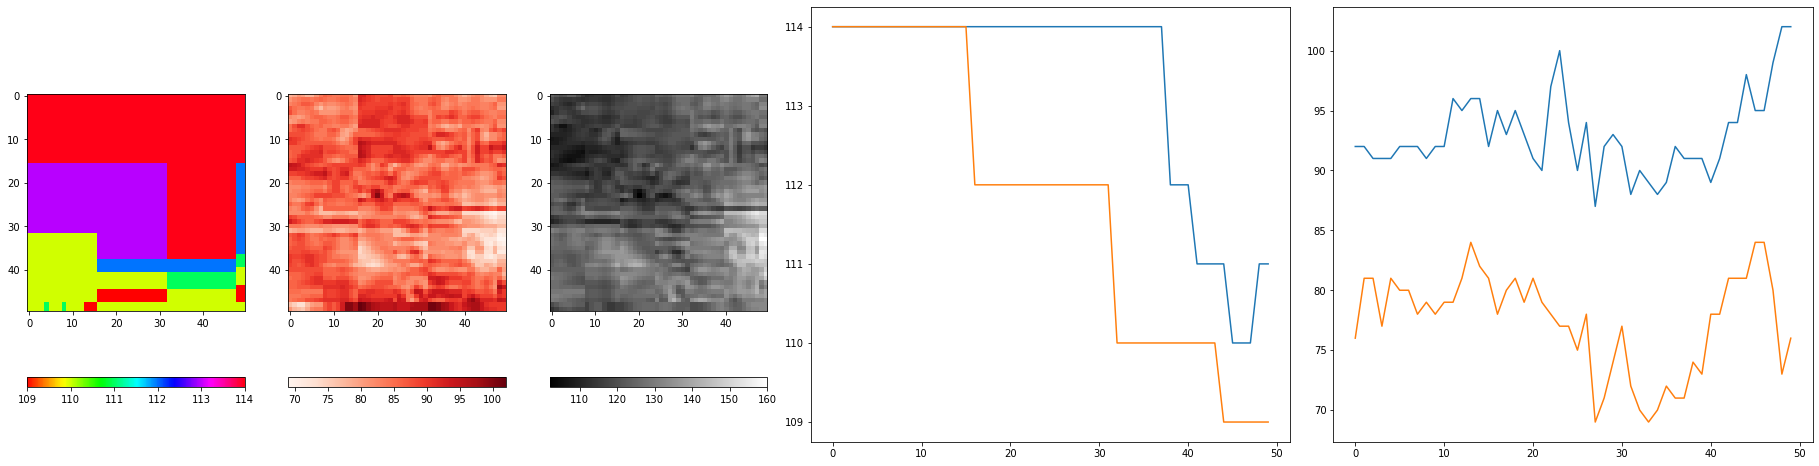

<Figure size 2304x288 with 0 Axes>

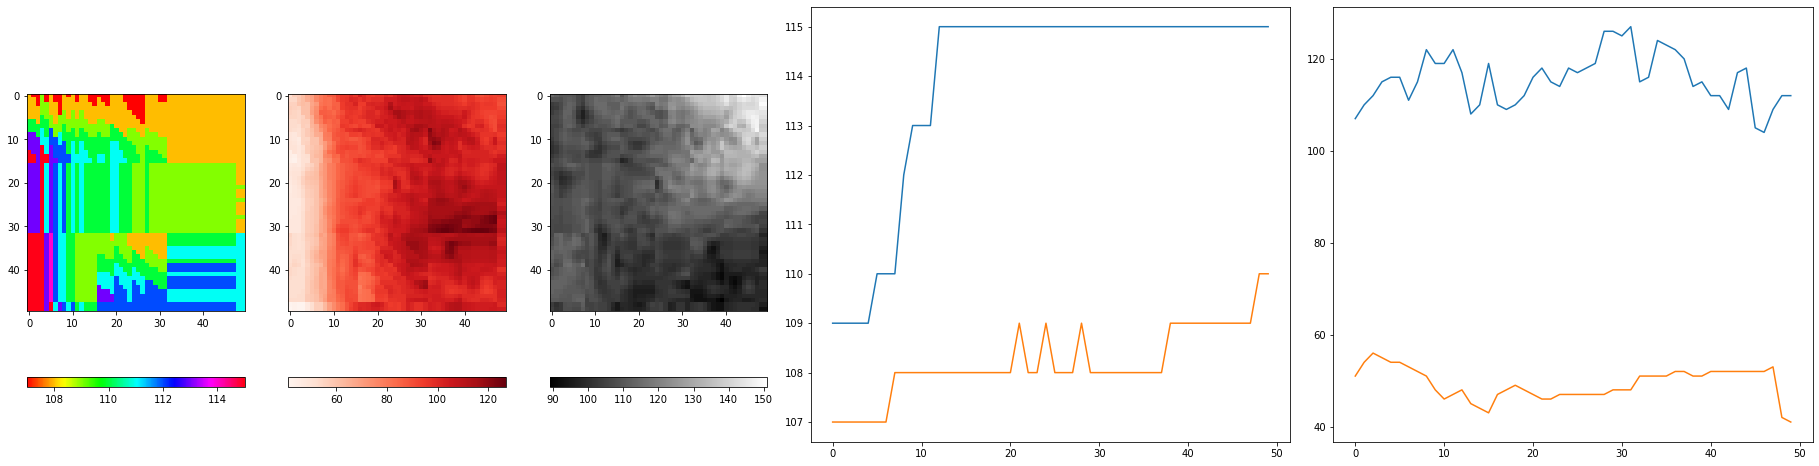

<Figure size 2304x288 with 0 Axes>

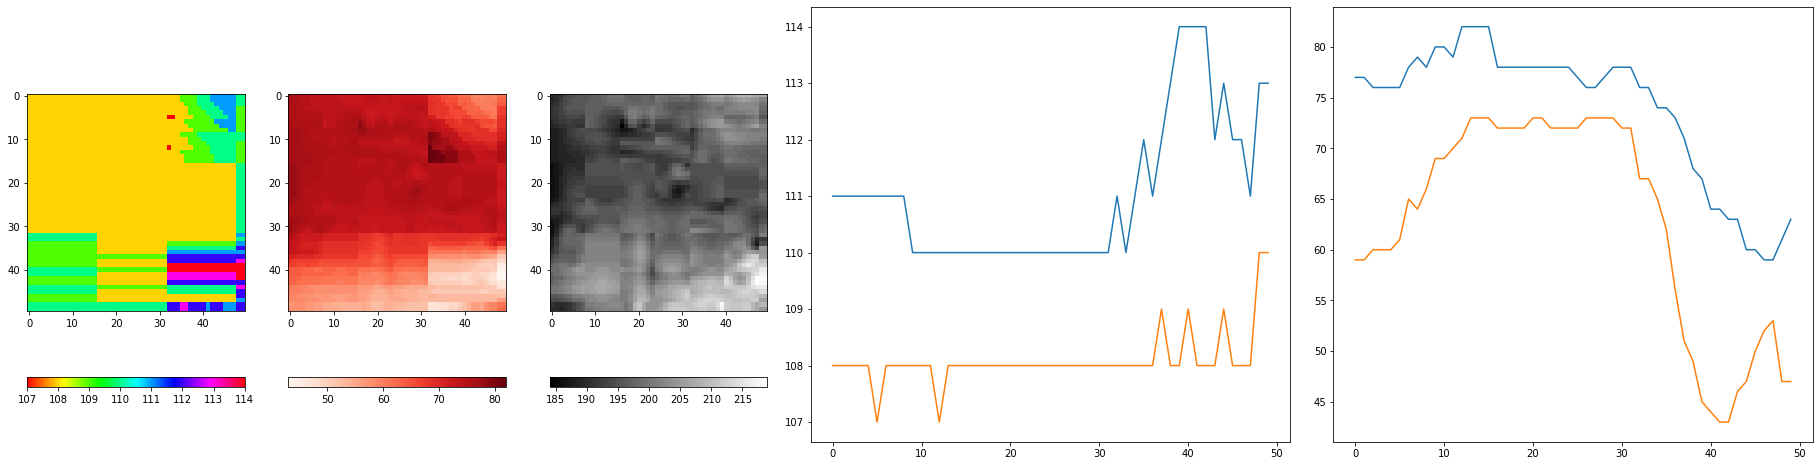

<Figure size 2304x288 with 0 Axes>

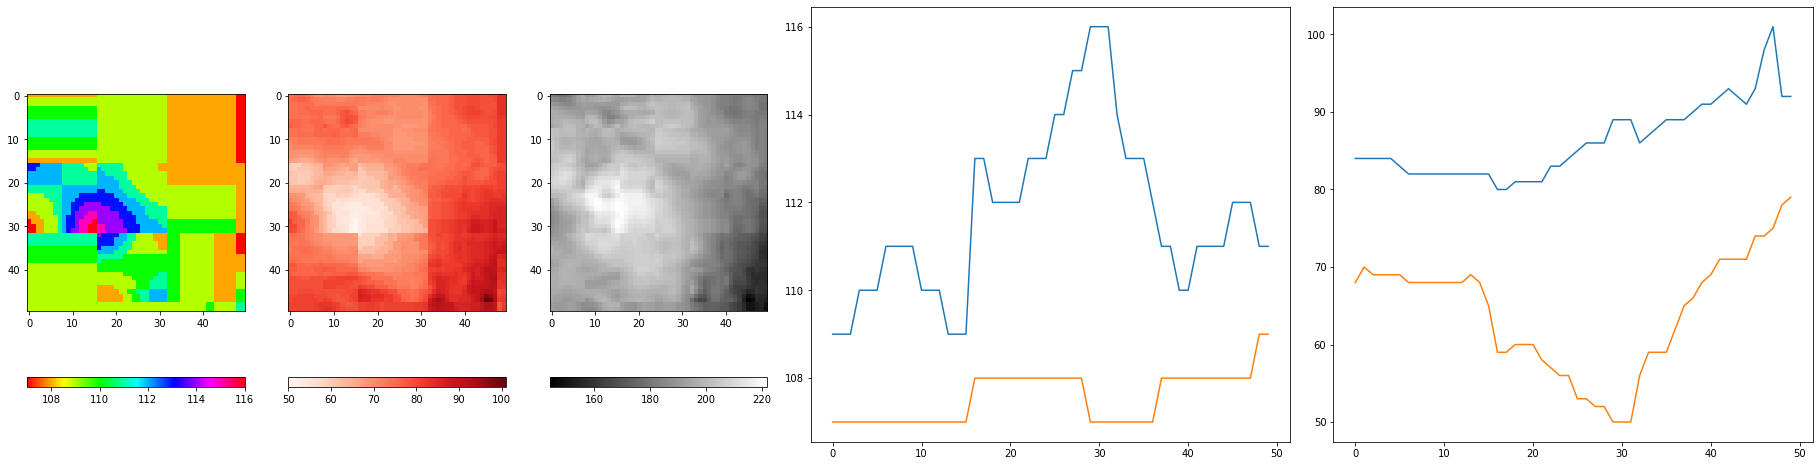

<Figure size 2304x288 with 0 Axes>

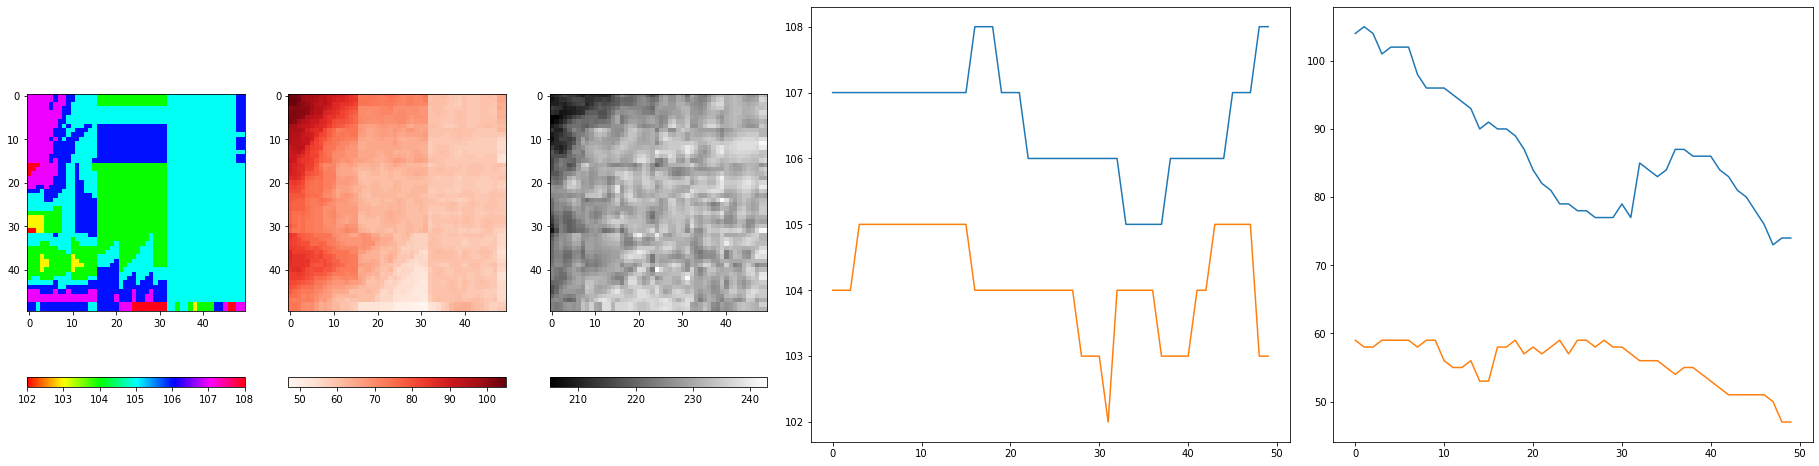

<Figure size 2304x288 with 0 Axes>

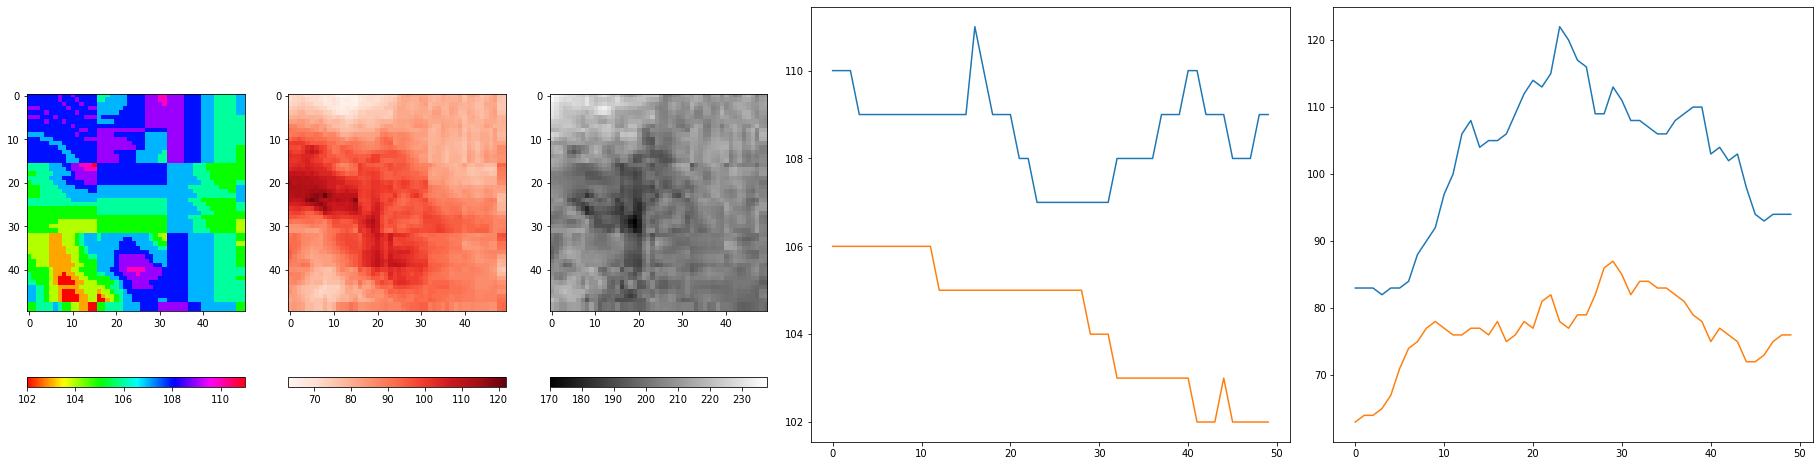

<Figure size 2304x288 with 0 Axes>

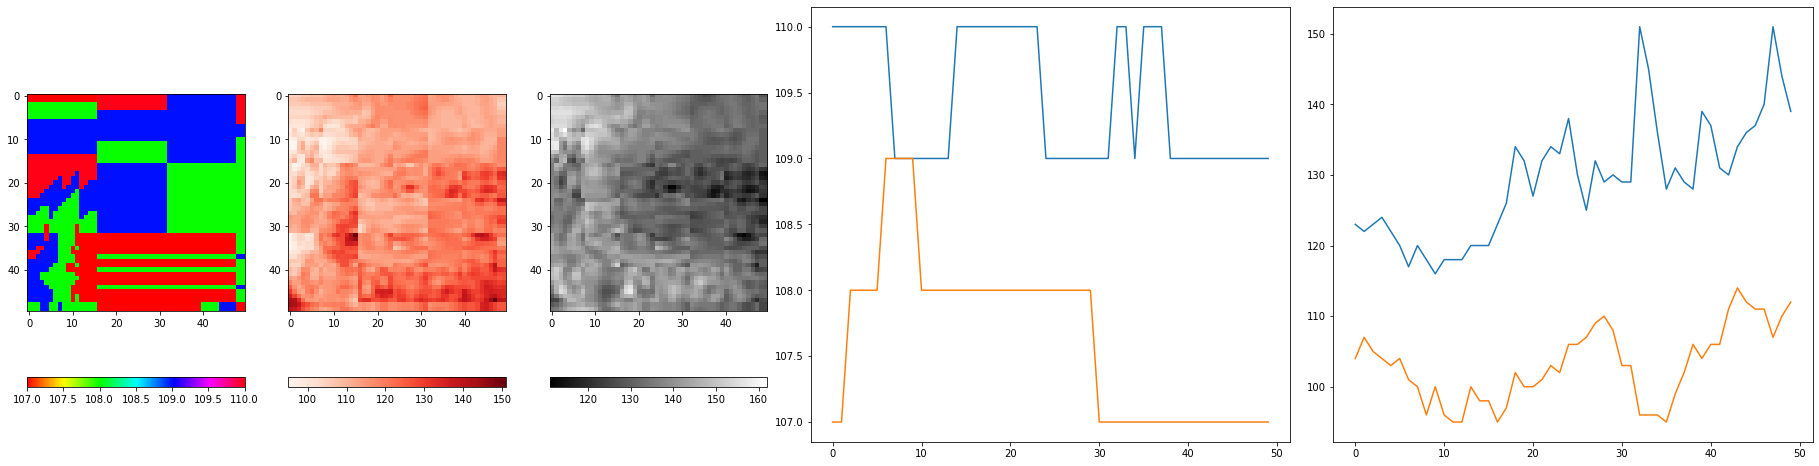

<Figure size 2304x288 with 0 Axes>

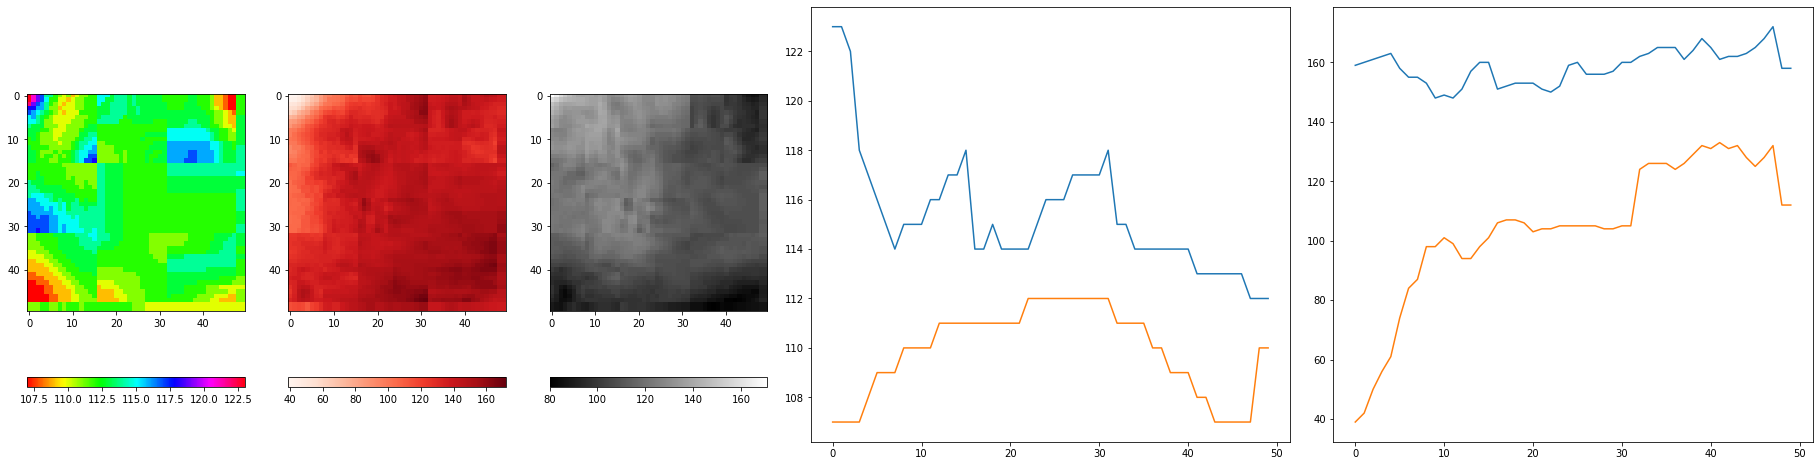

<Figure size 2304x288 with 0 Axes>

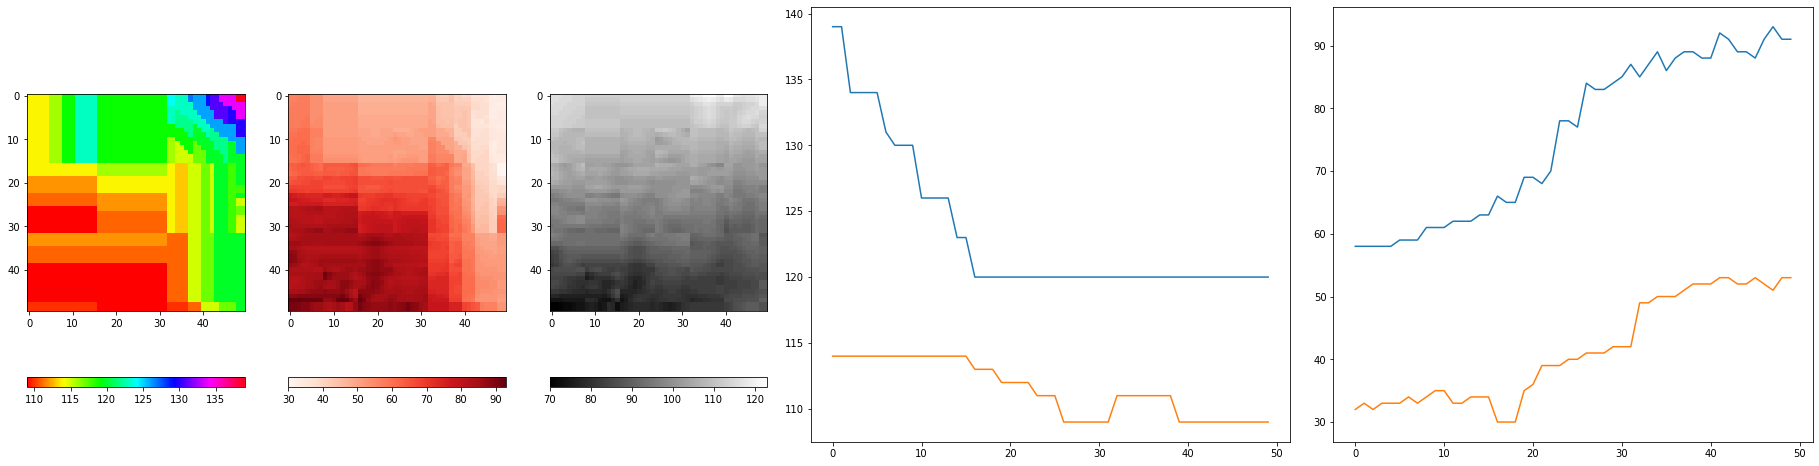

<Figure size 2304x288 with 0 Axes>

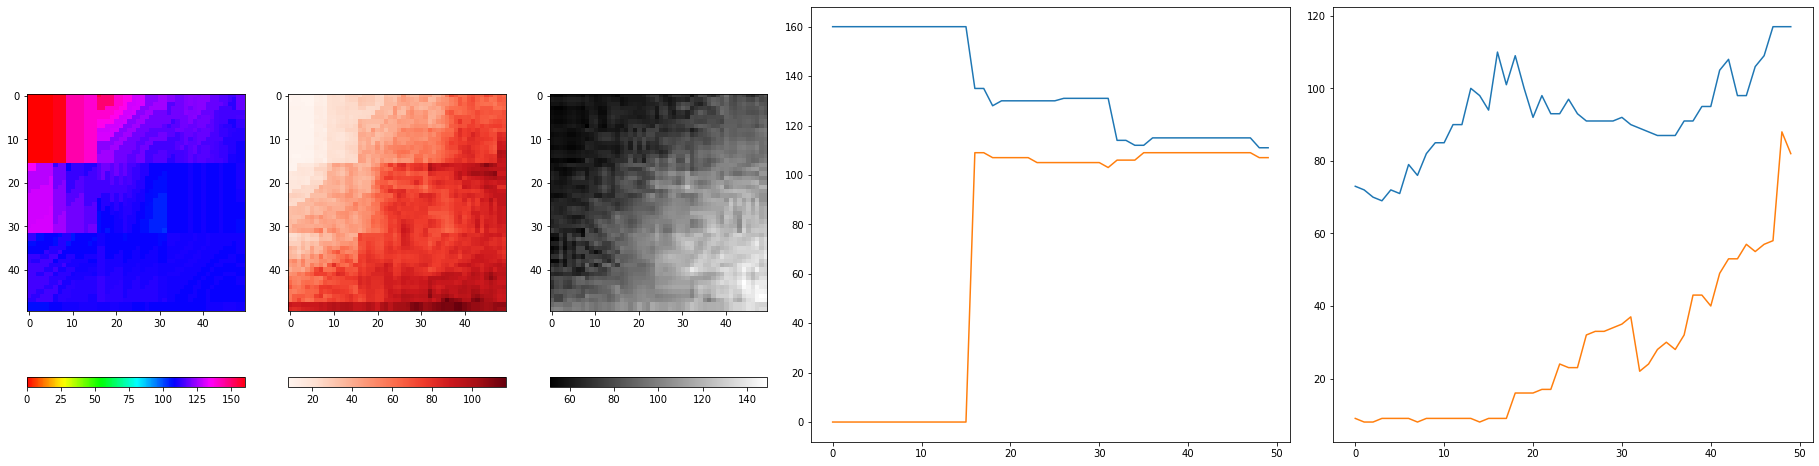

<Figure size 2304x288 with 0 Axes>

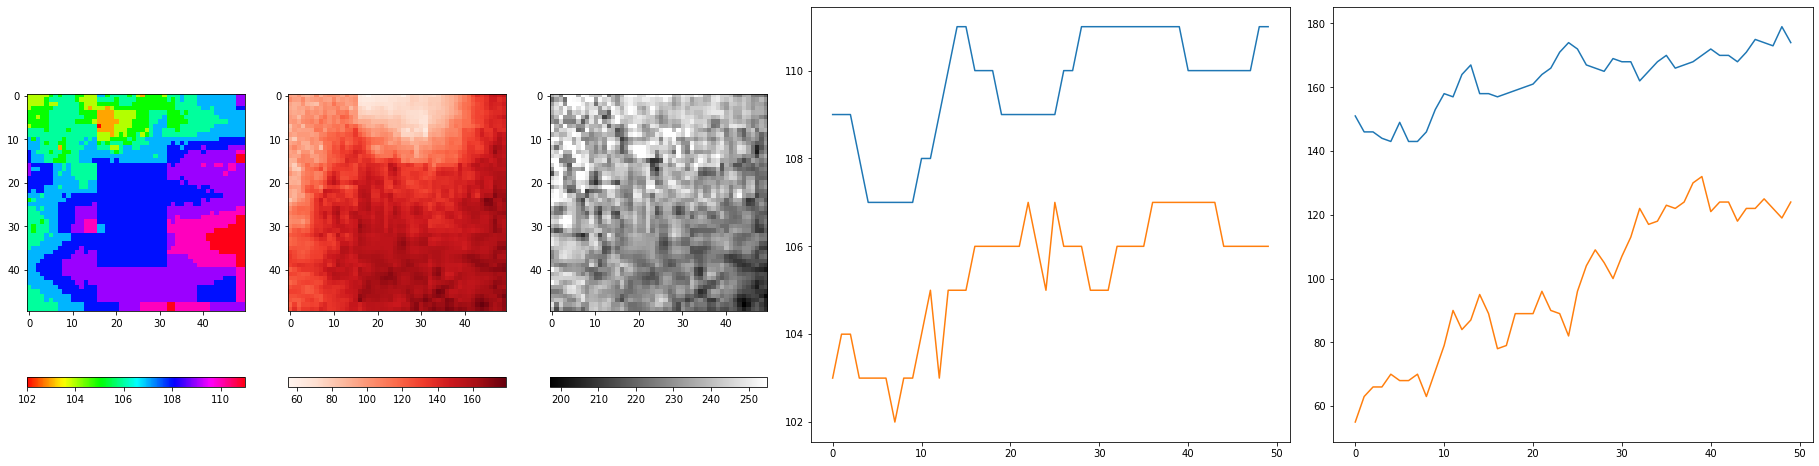

<Figure size 2304x288 with 0 Axes>

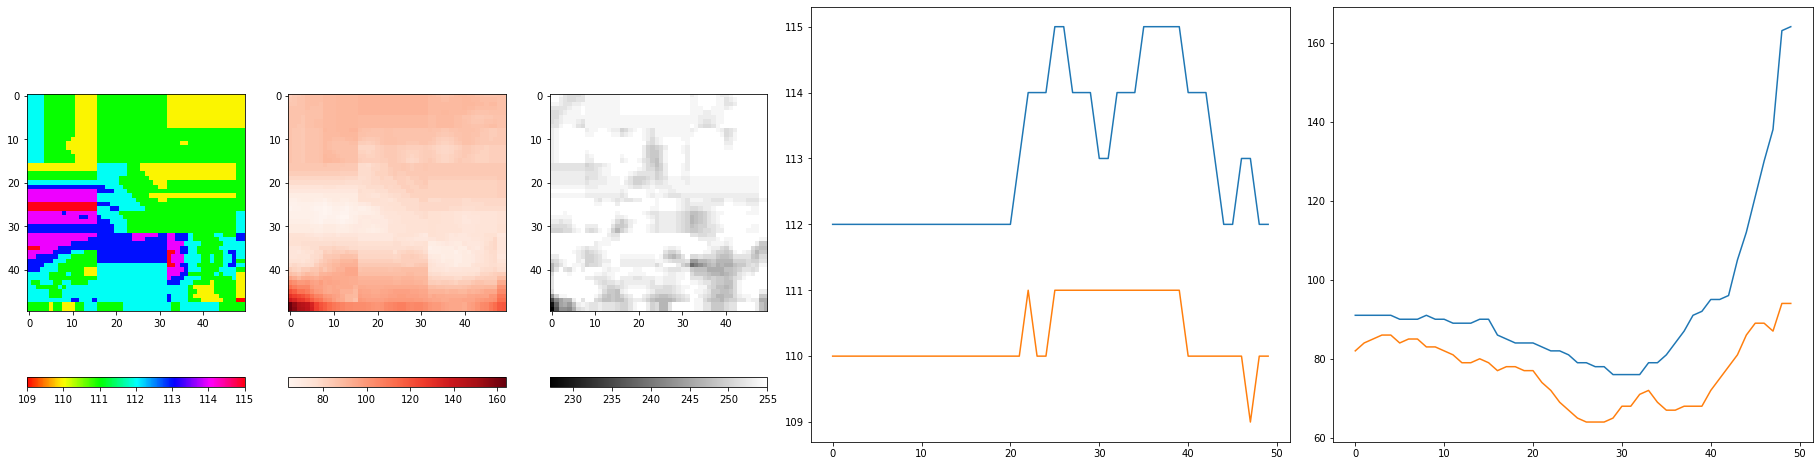

<Figure size 2304x288 with 0 Axes>

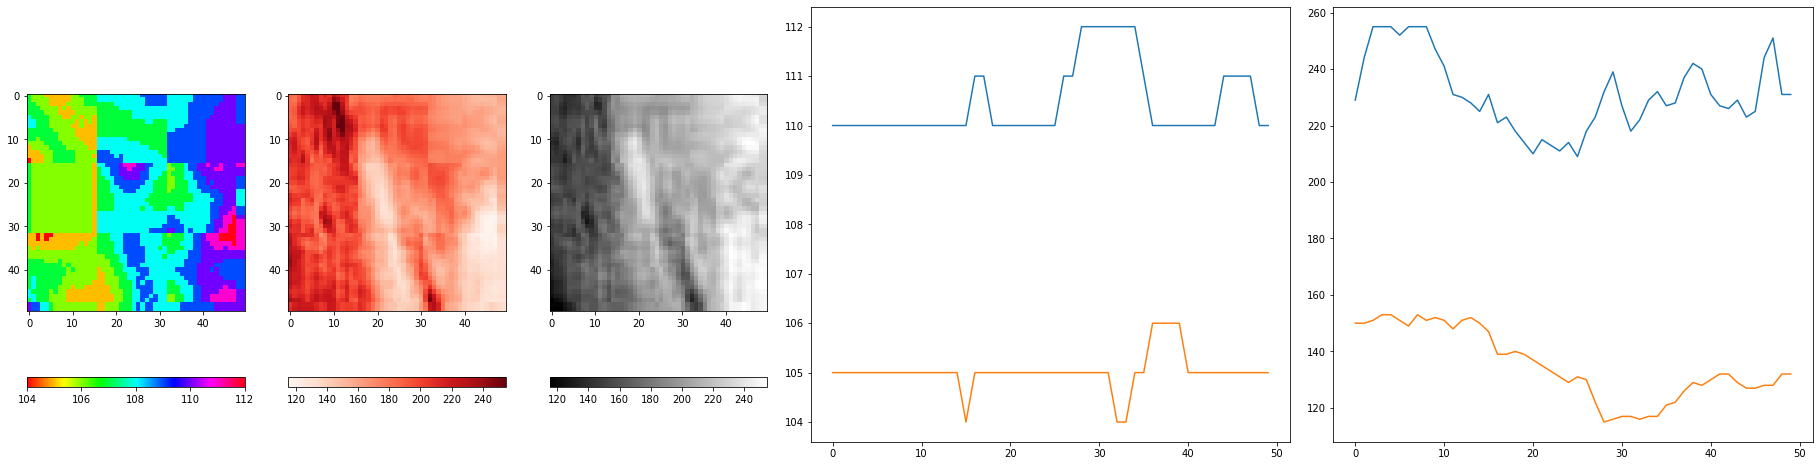

<Figure size 2304x288 with 0 Axes>

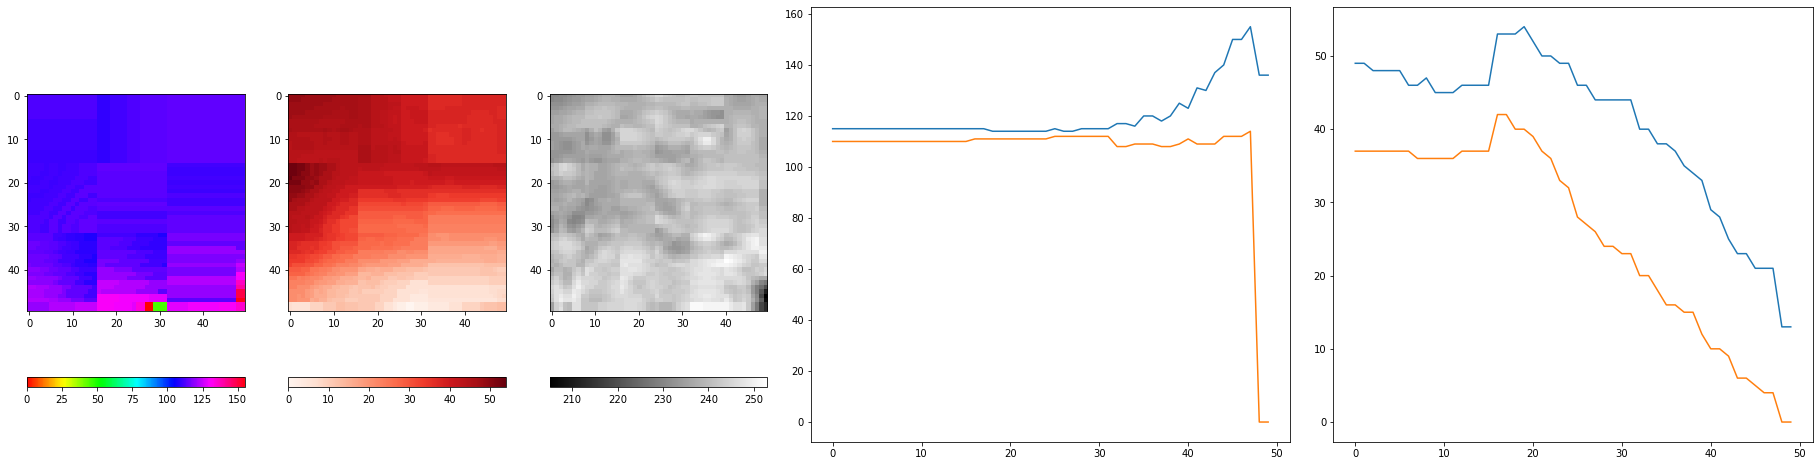

<Figure size 2304x288 with 0 Axes>

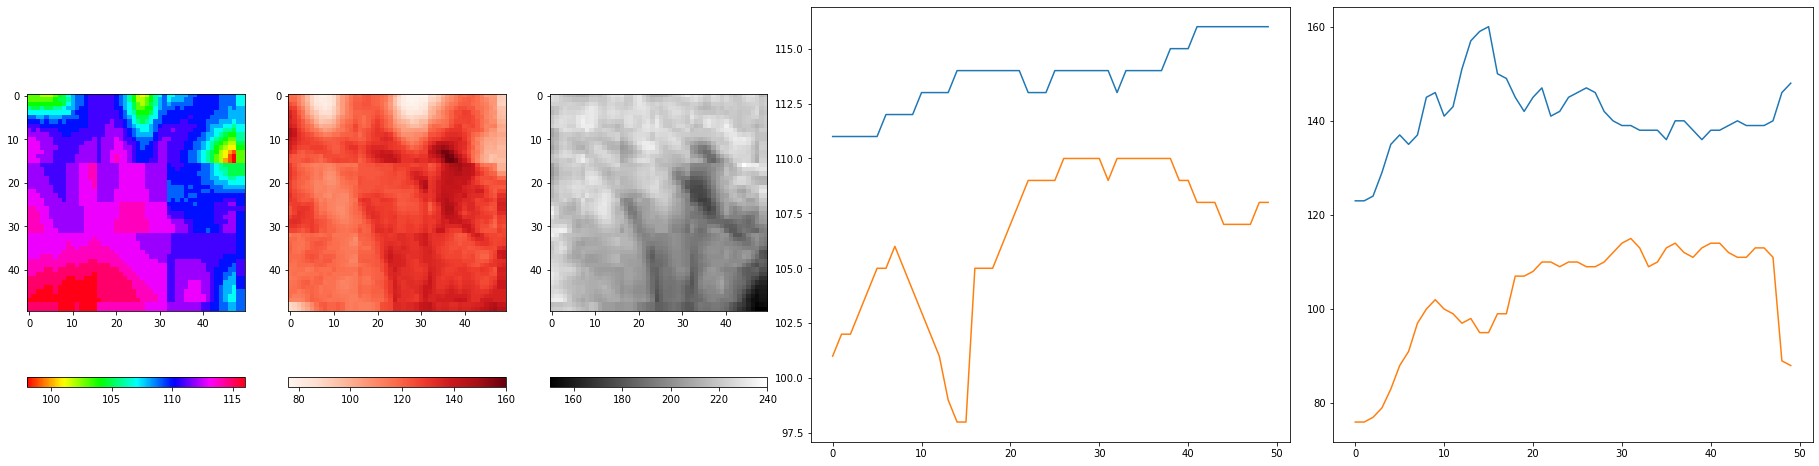

<Figure size 2304x288 with 0 Axes>

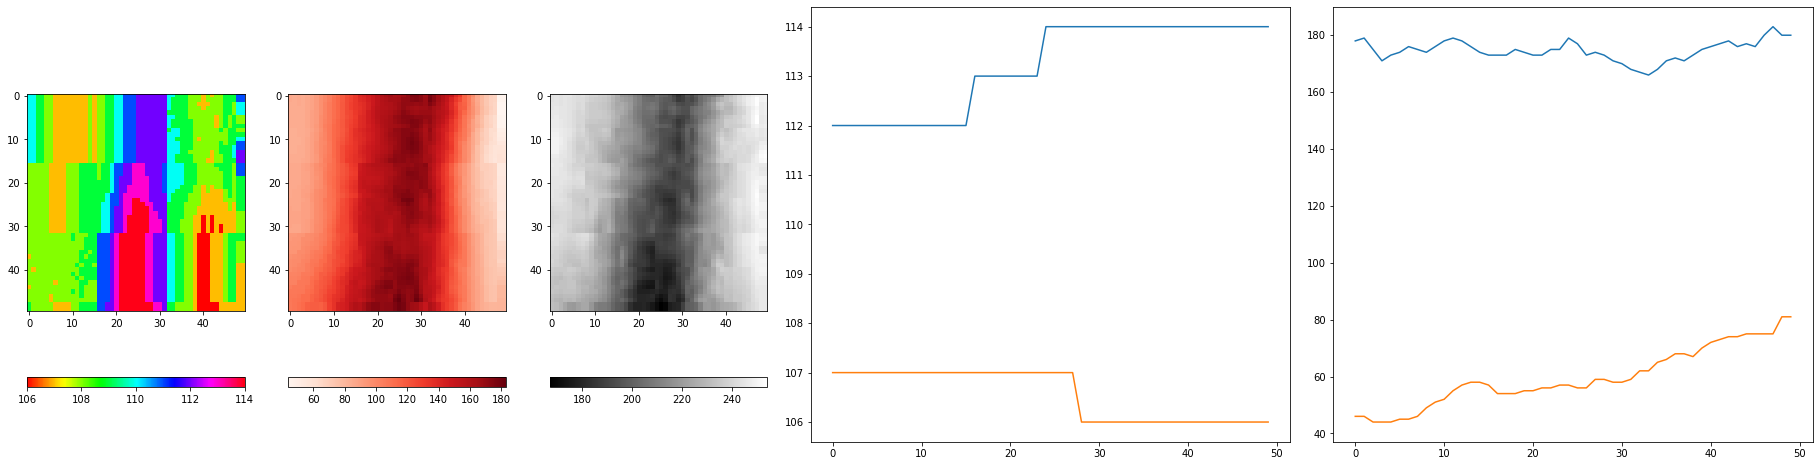

<Figure size 2304x288 with 0 Axes>

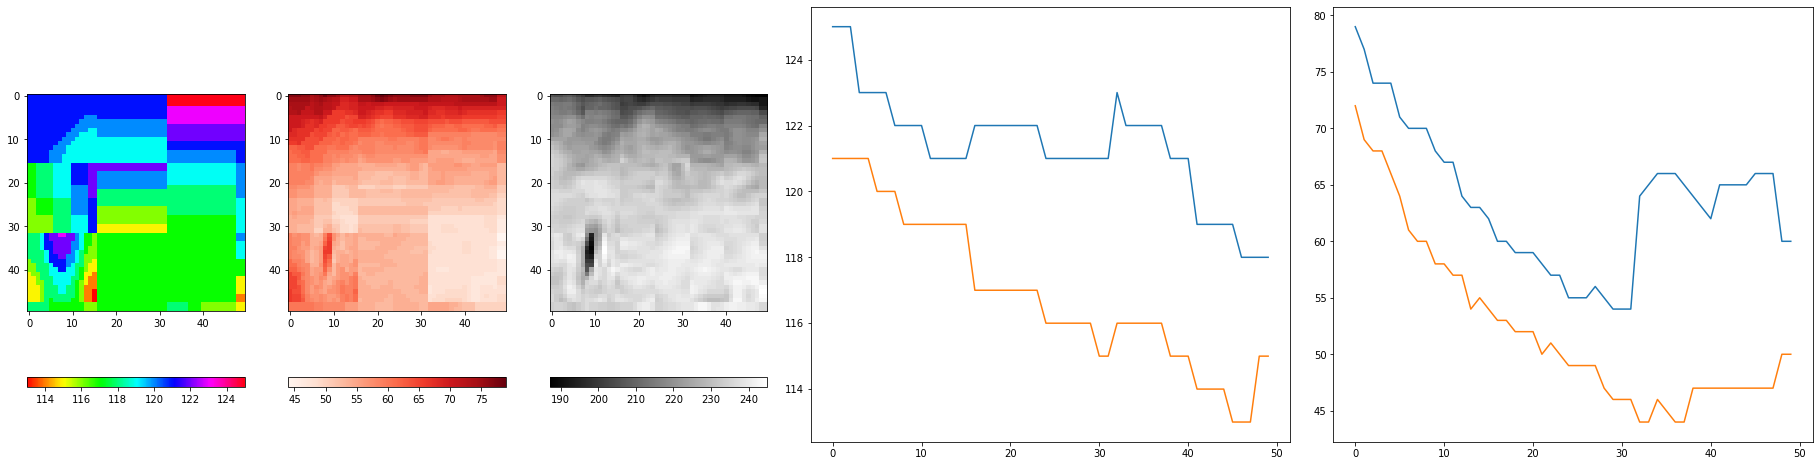

<Figure size 2304x288 with 0 Axes>

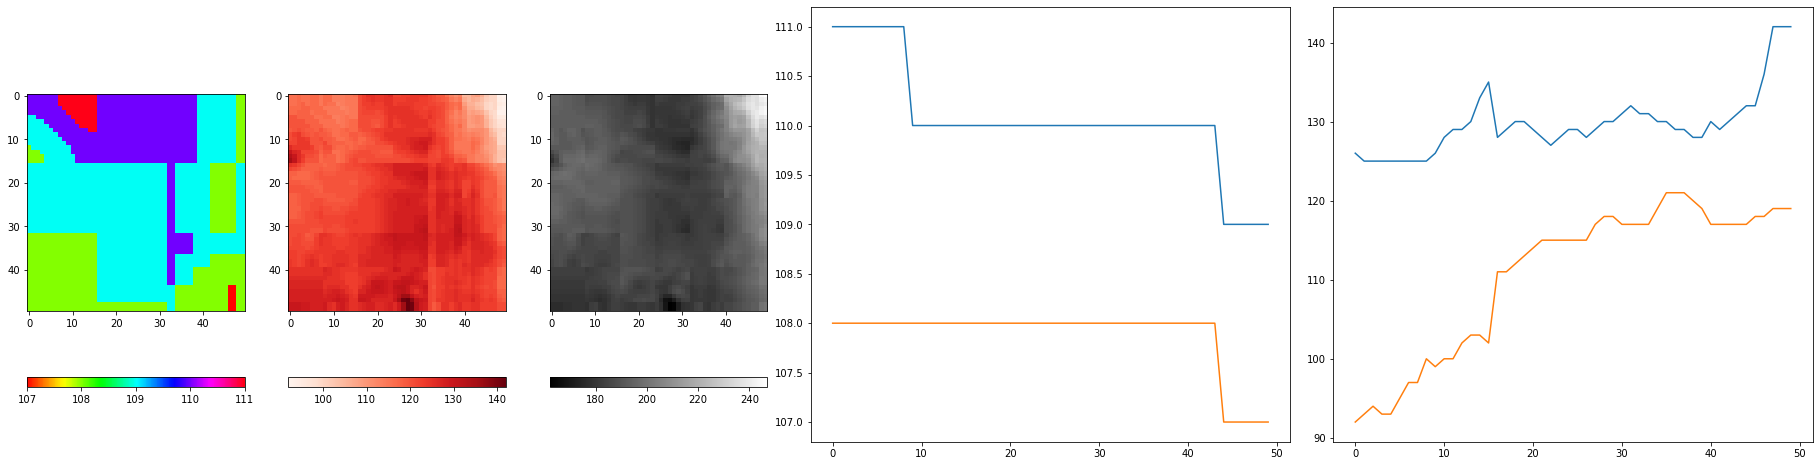

<Figure size 2304x288 with 0 Axes>

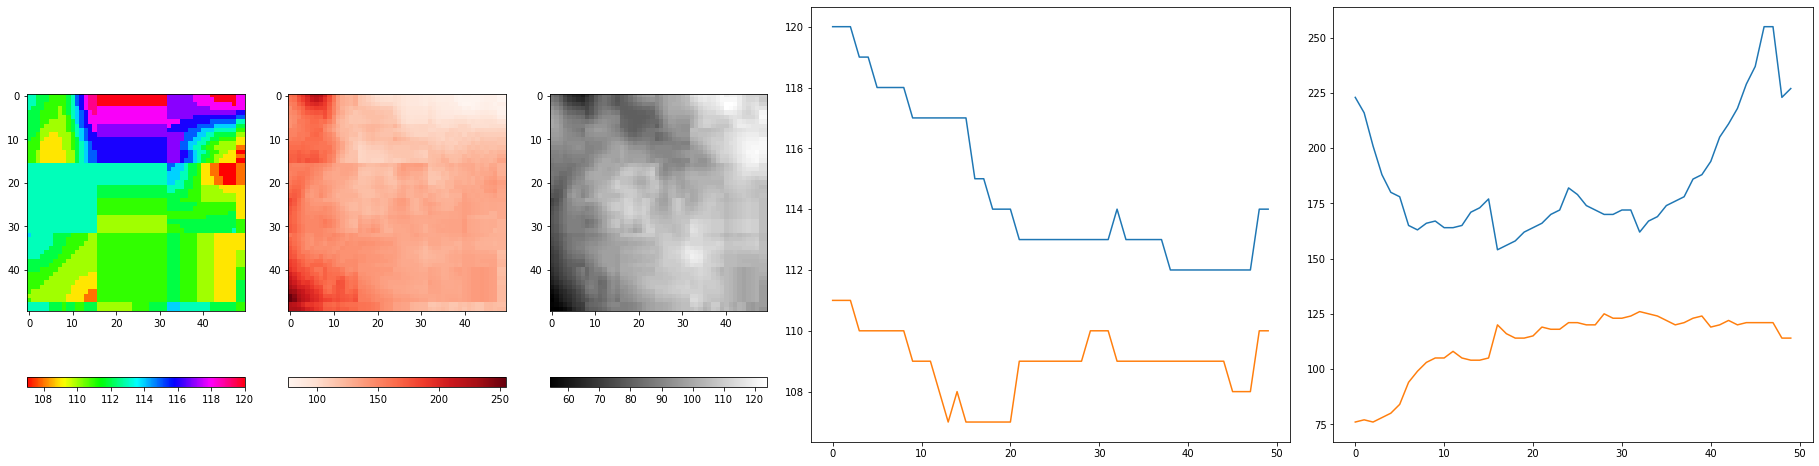

<Figure size 2304x288 with 0 Axes>

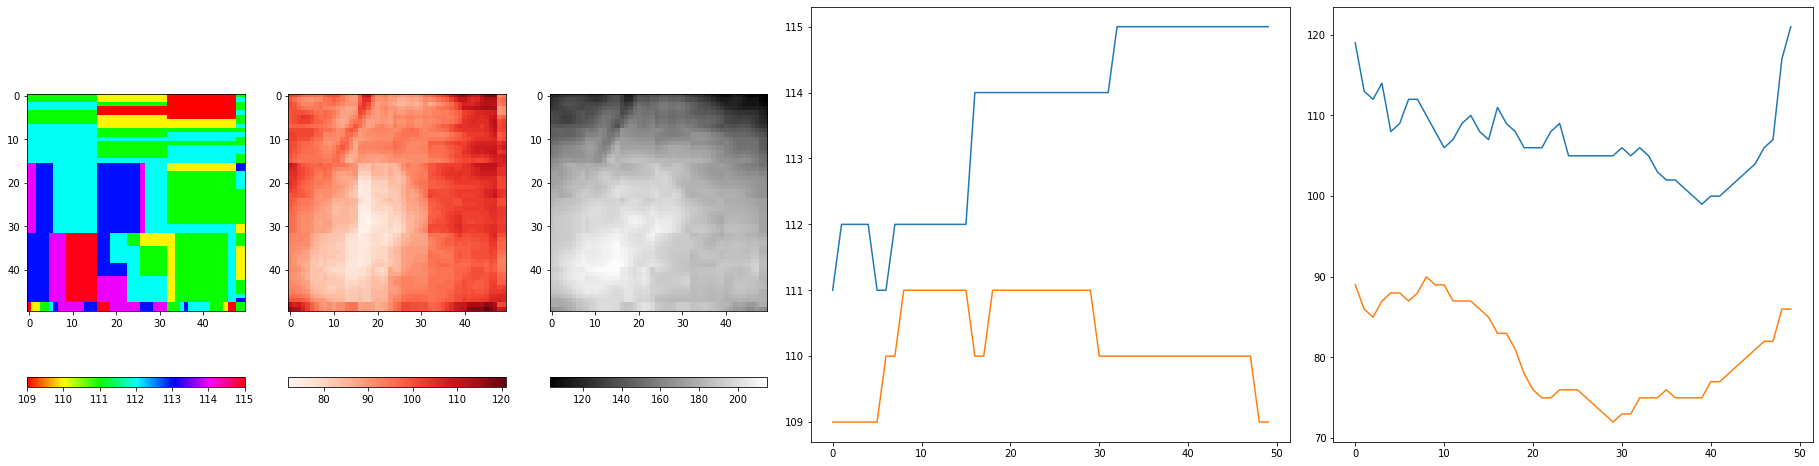

<Figure size 2304x288 with 0 Axes>

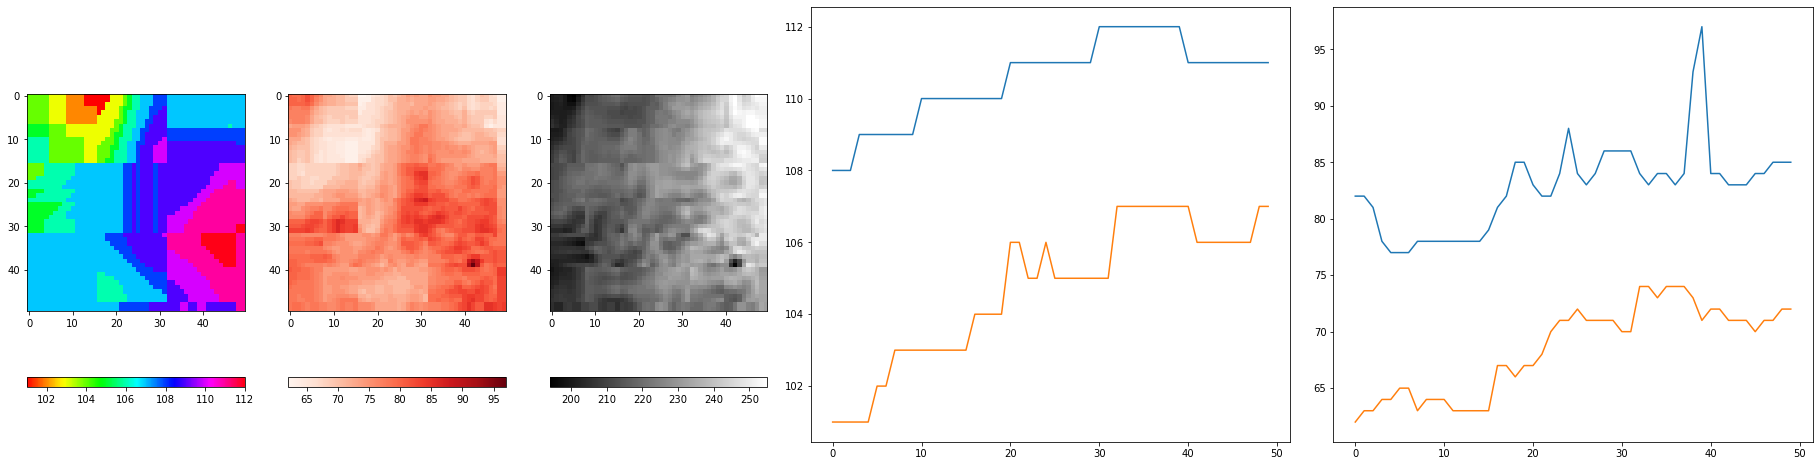

<Figure size 2304x288 with 0 Axes>

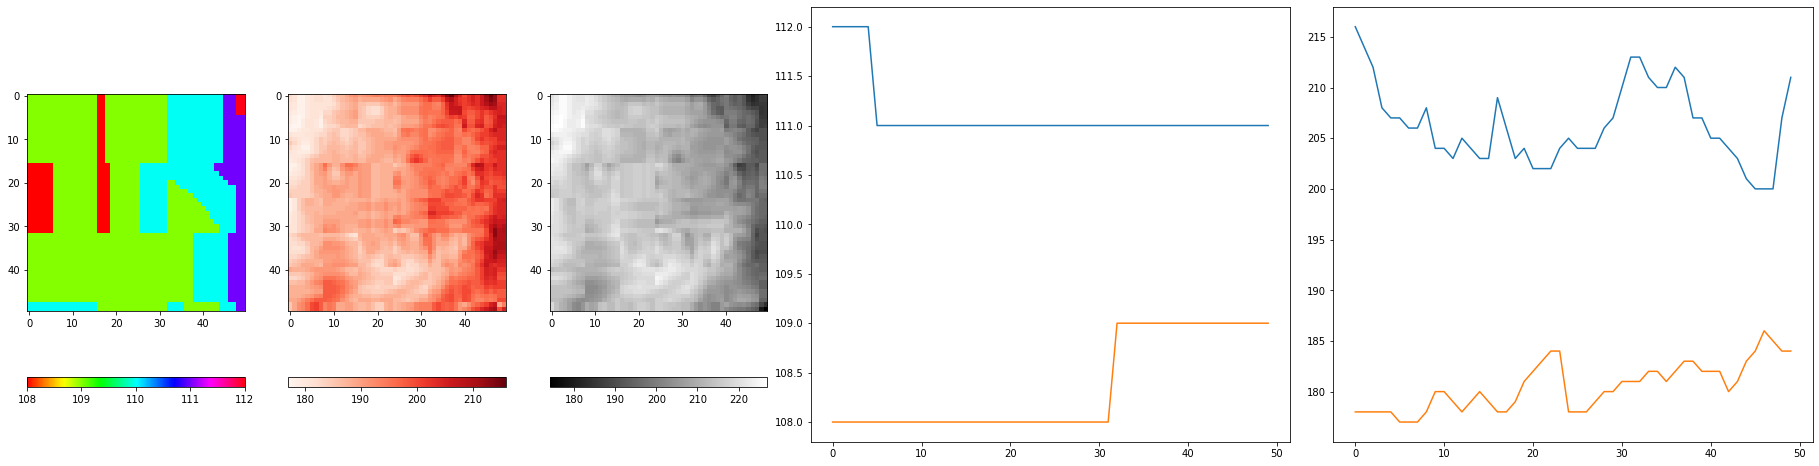

<Figure size 2304x288 with 0 Axes>

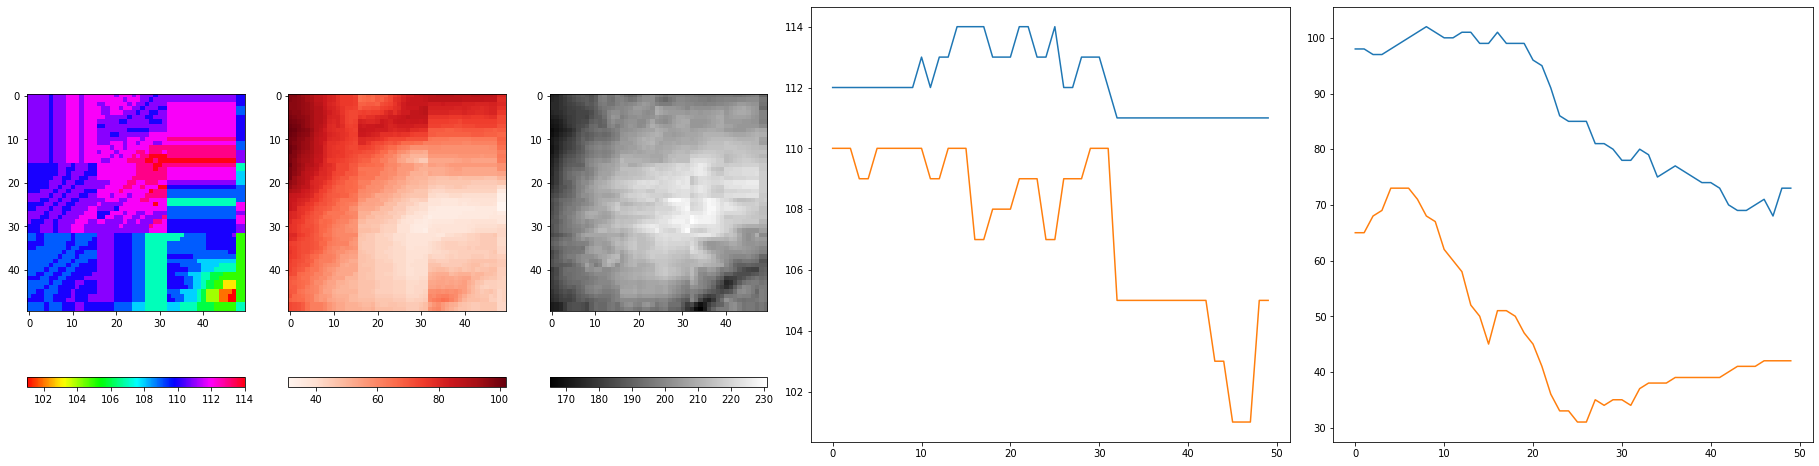

<Figure size 2304x288 with 0 Axes>

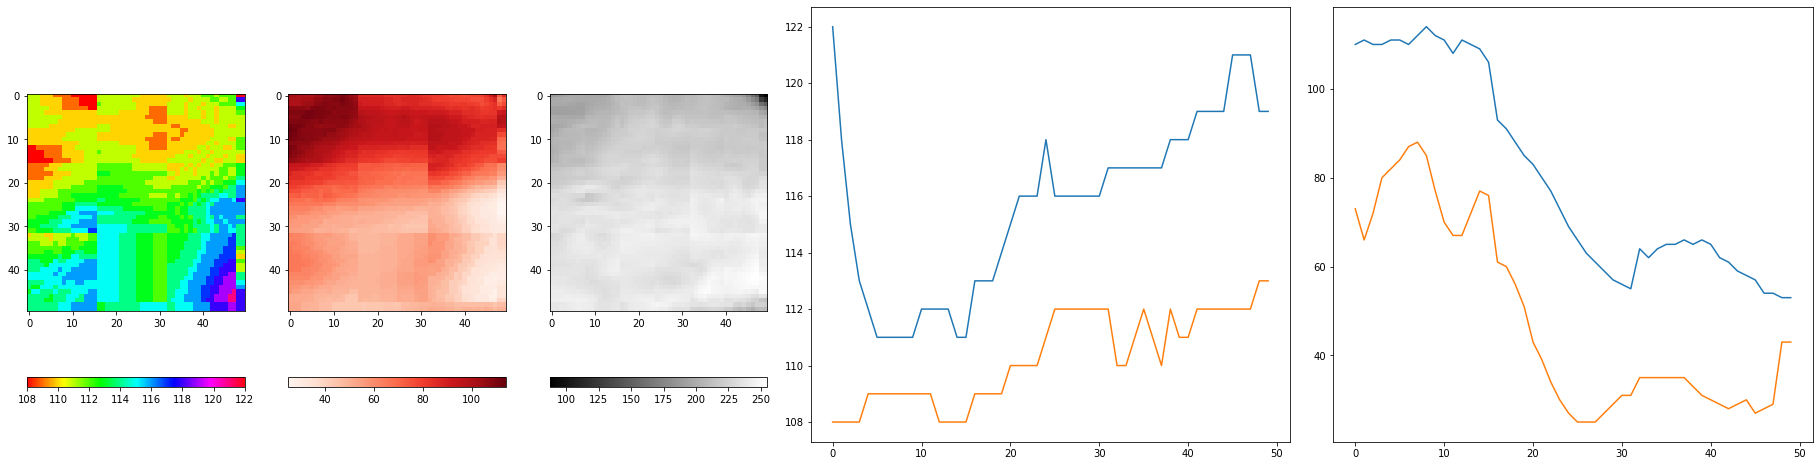

<Figure size 2304x288 with 0 Axes>

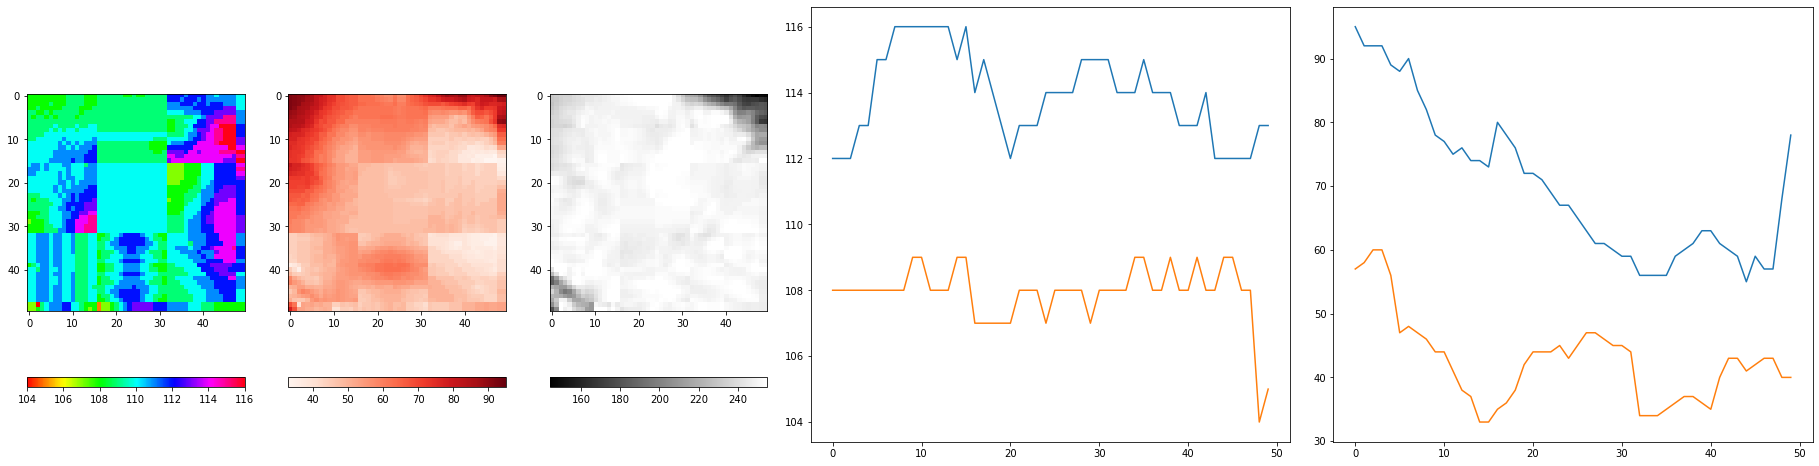

<Figure size 2304x288 with 0 Axes>

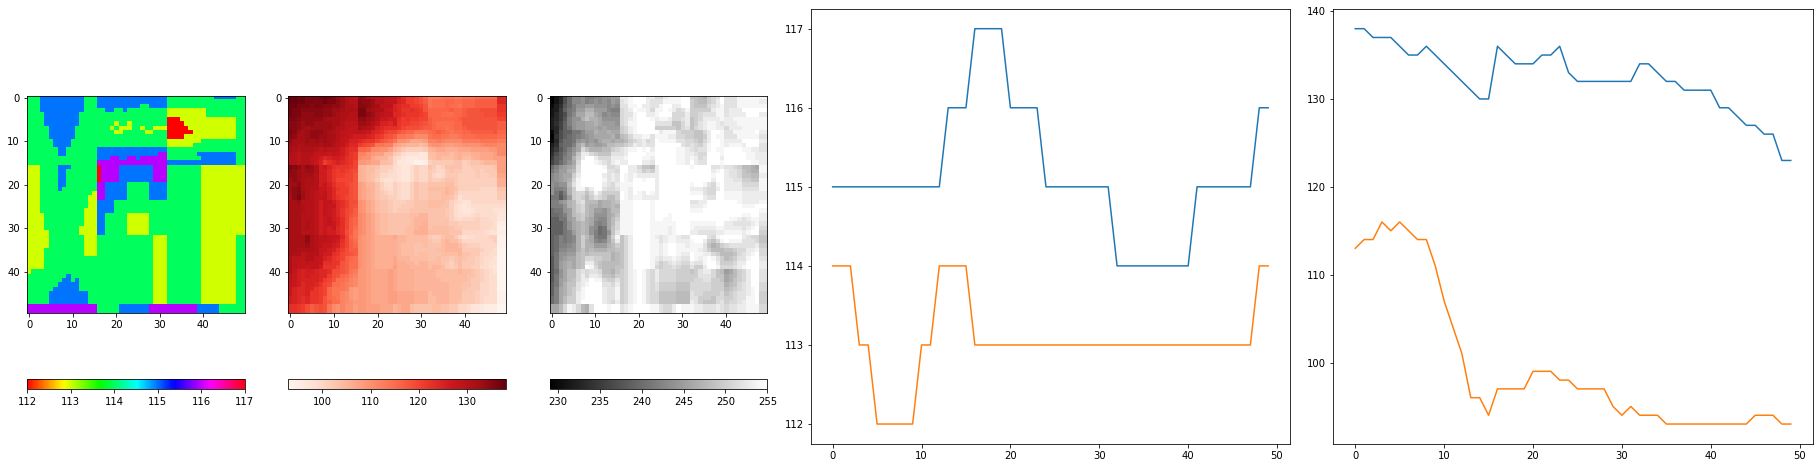

<Figure size 2304x288 with 0 Axes>

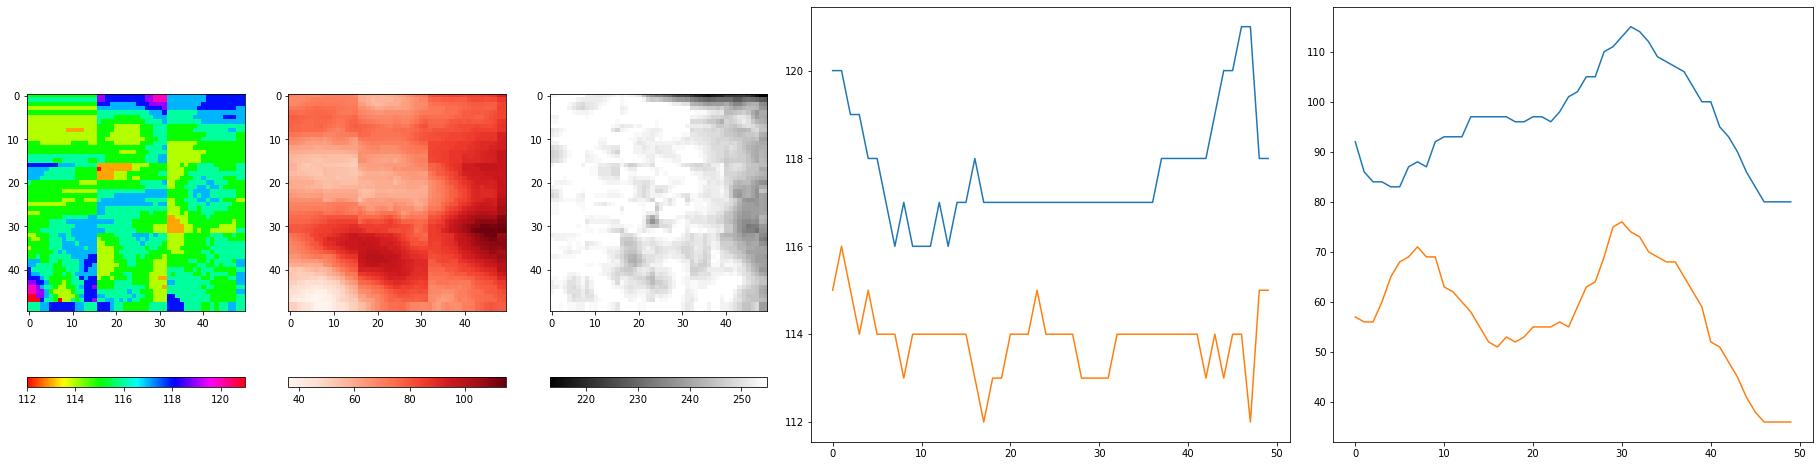

<Figure size 2304x288 with 0 Axes>

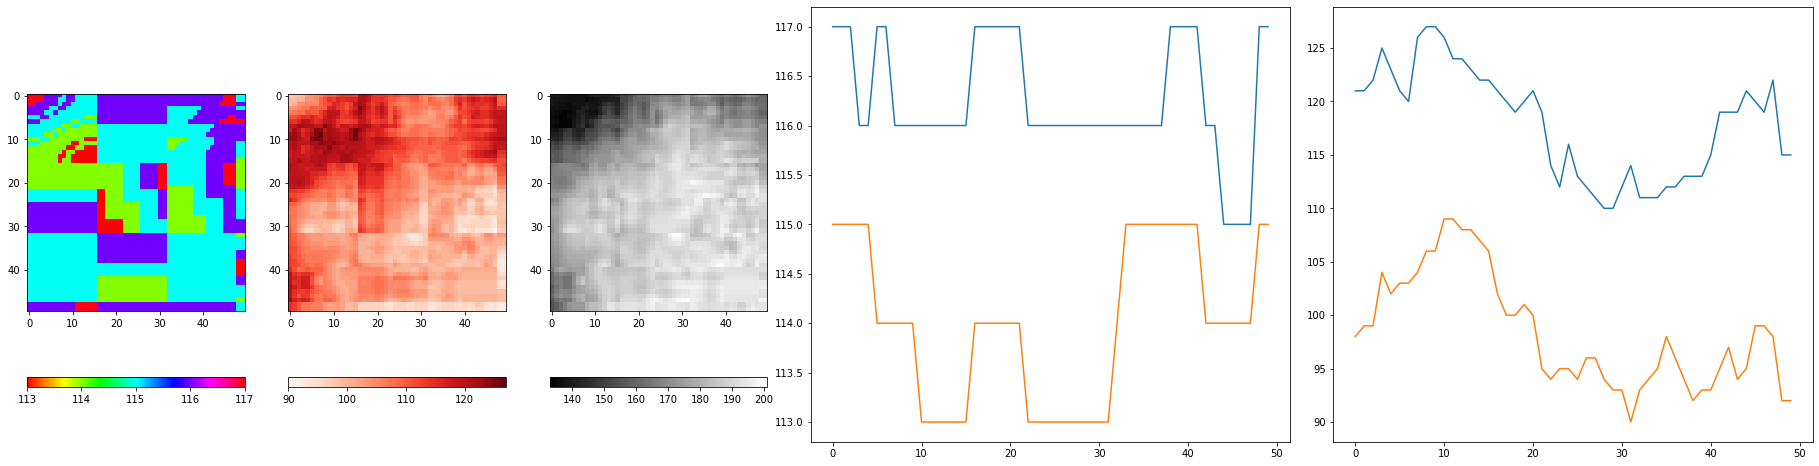

In [7]:
run_skin_analysis_hsv()

98% perc max = 185.76, 130.0
2% perc min = 127.62, 77.34


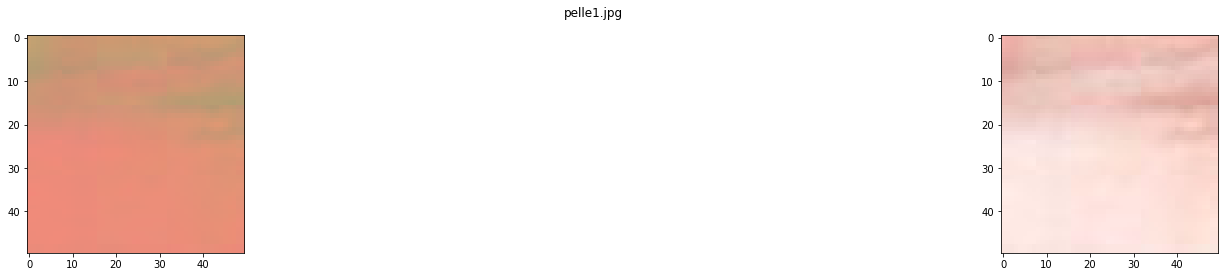

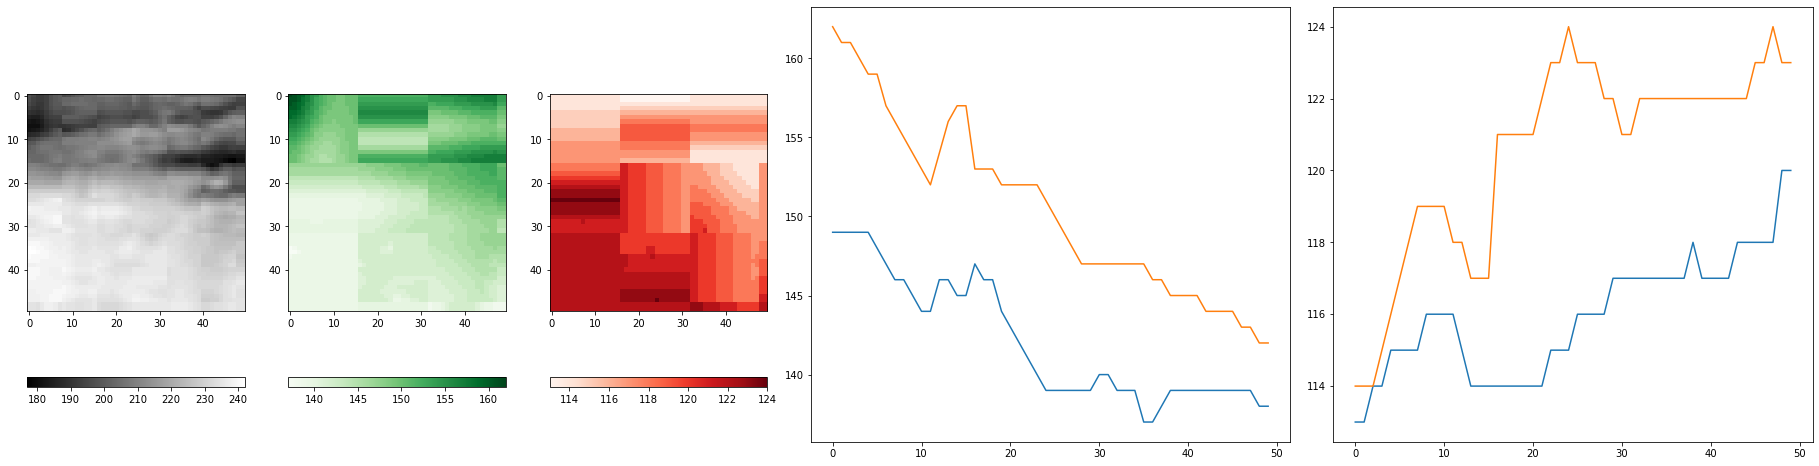

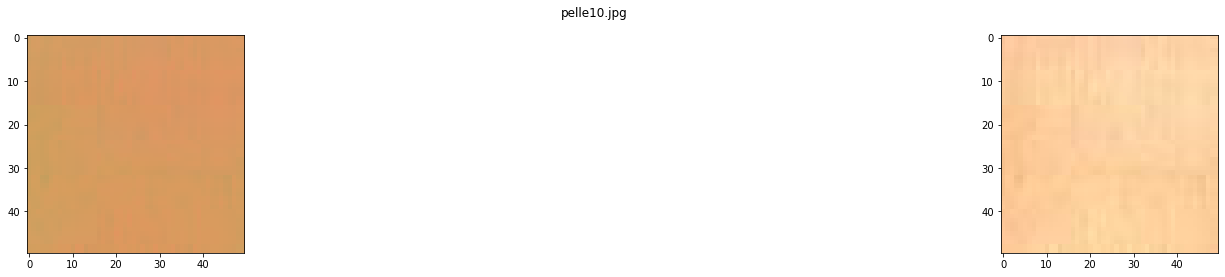

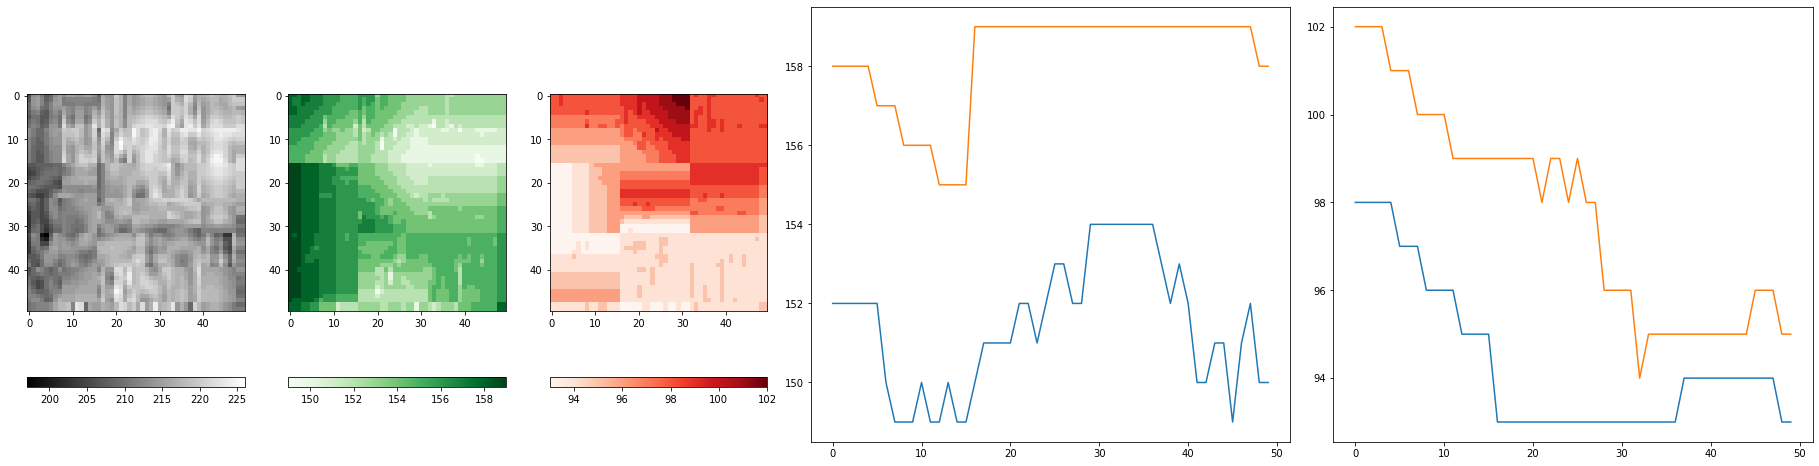

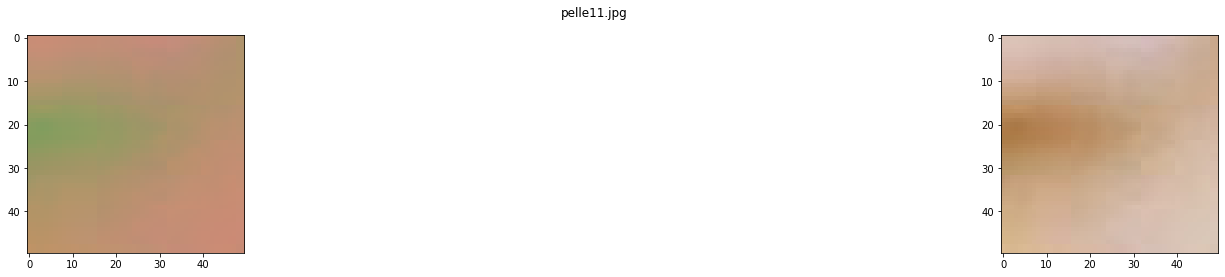

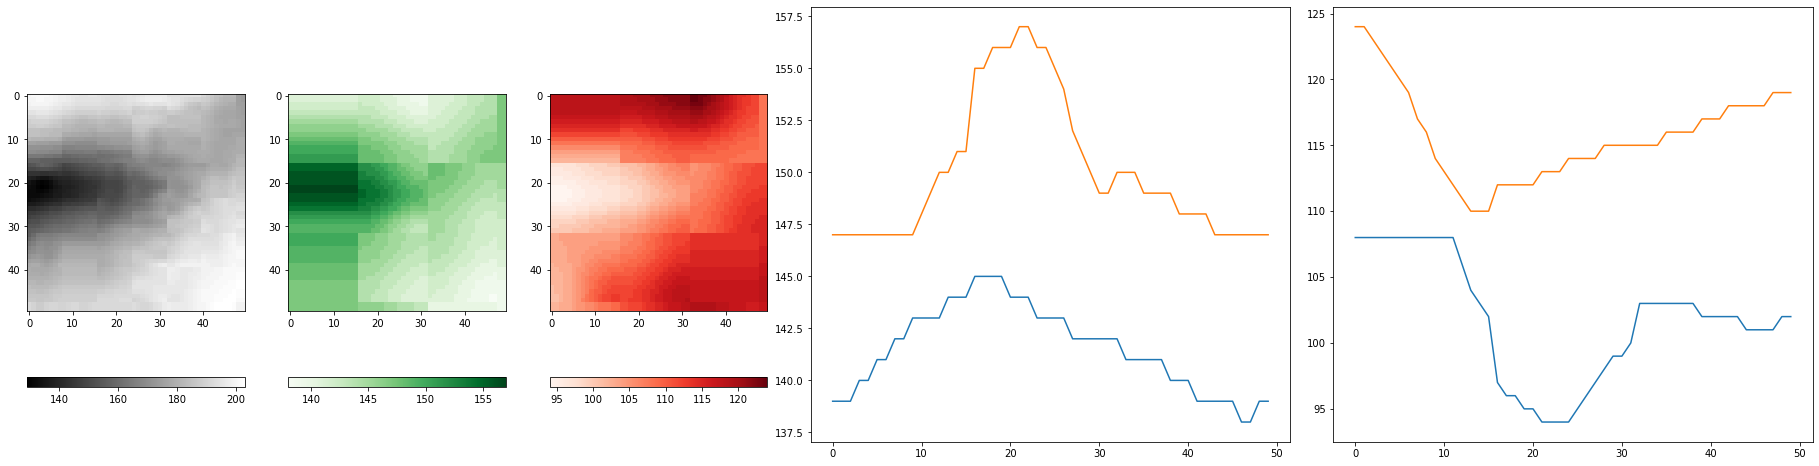

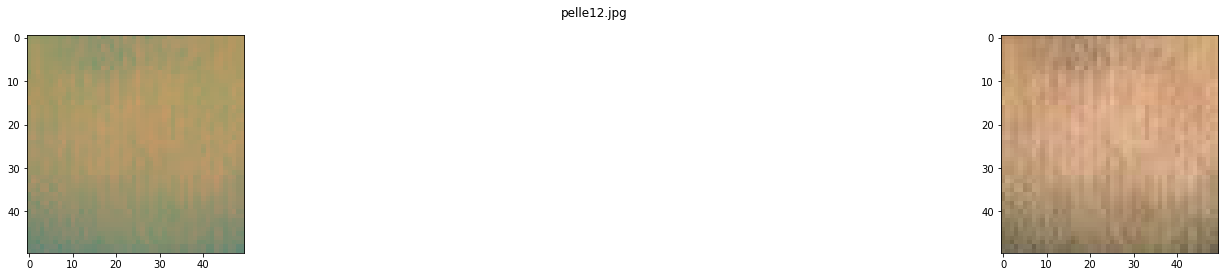

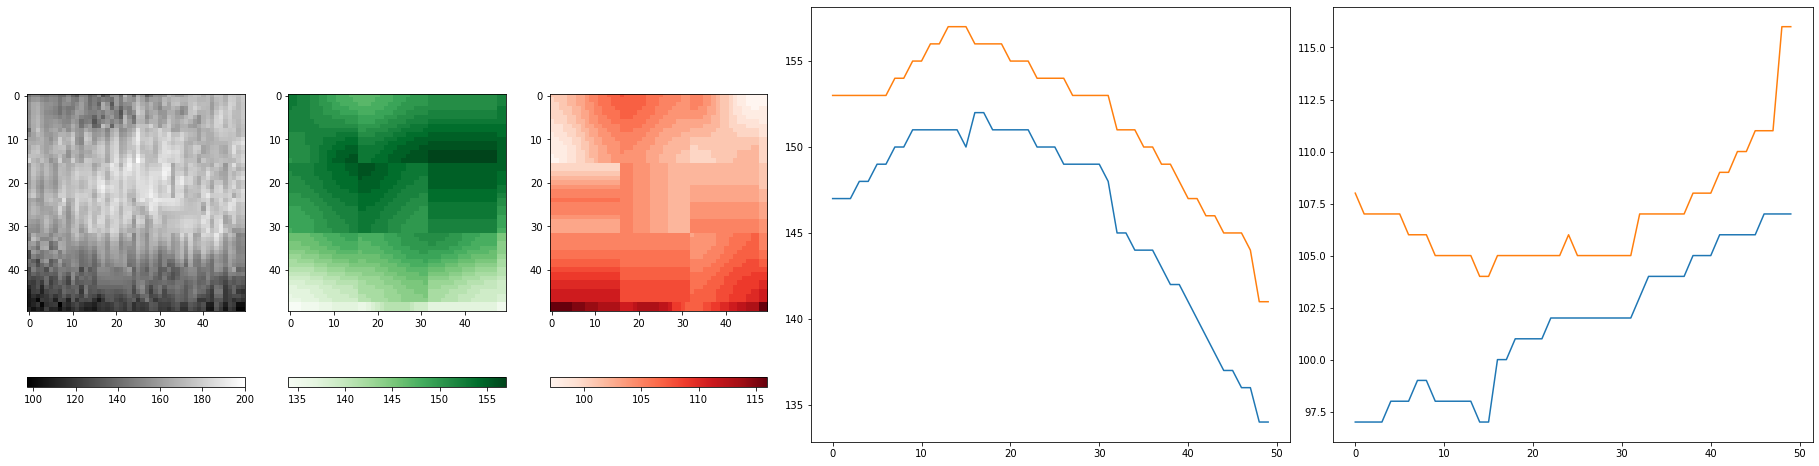

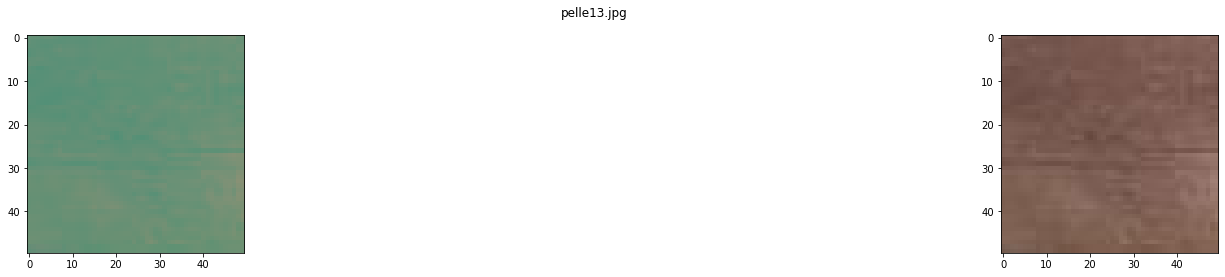

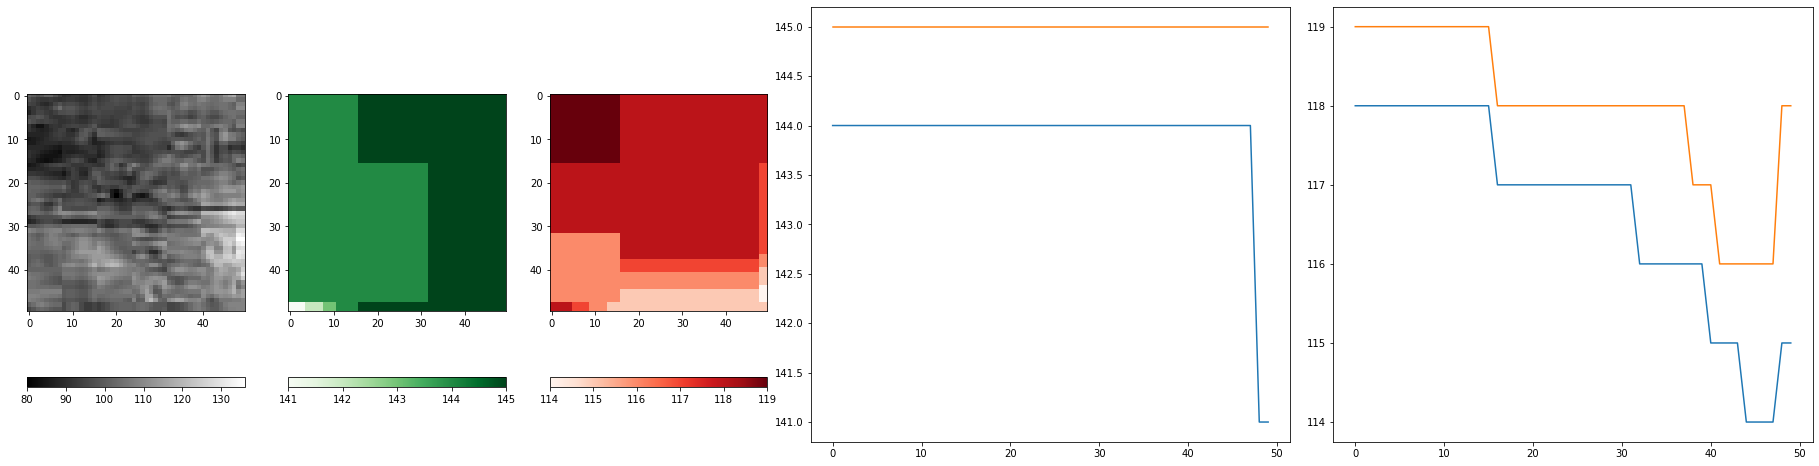

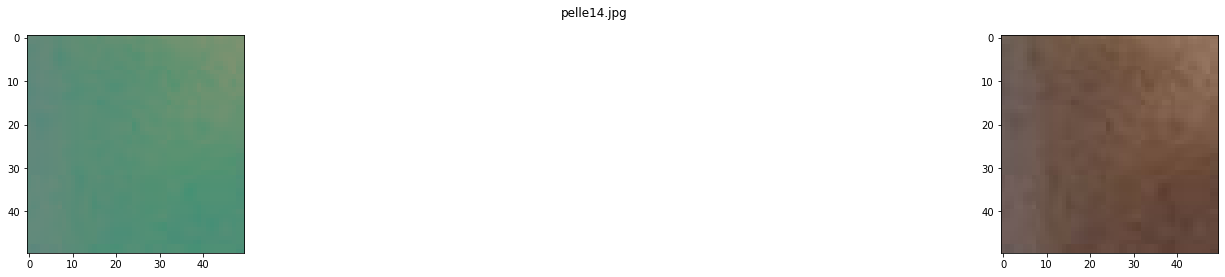

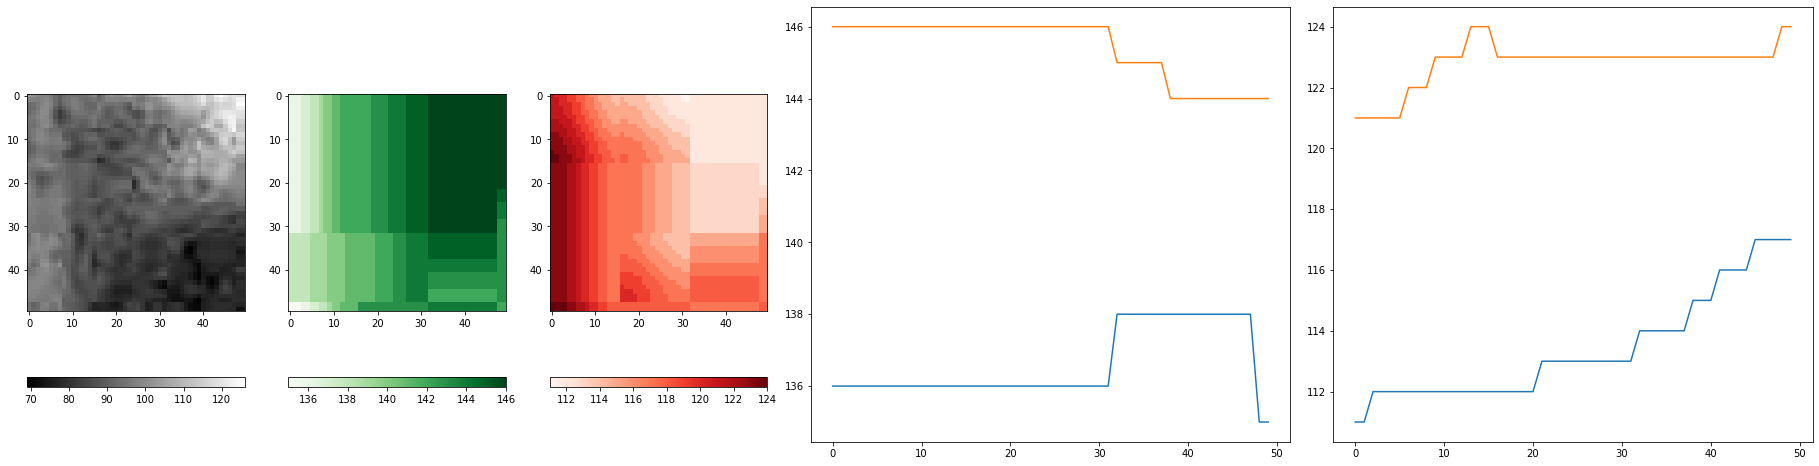

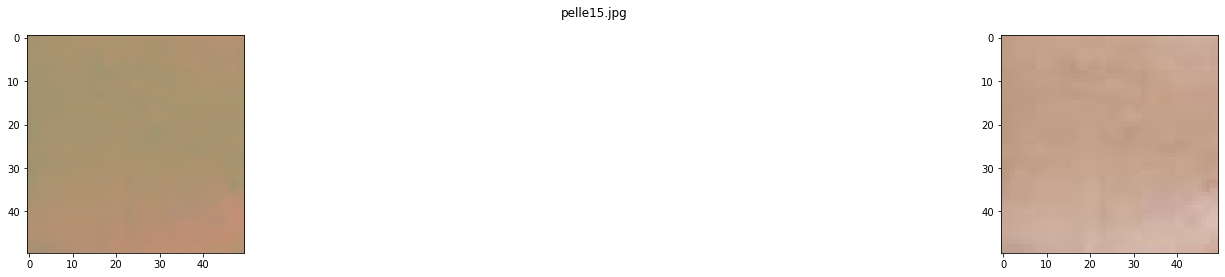

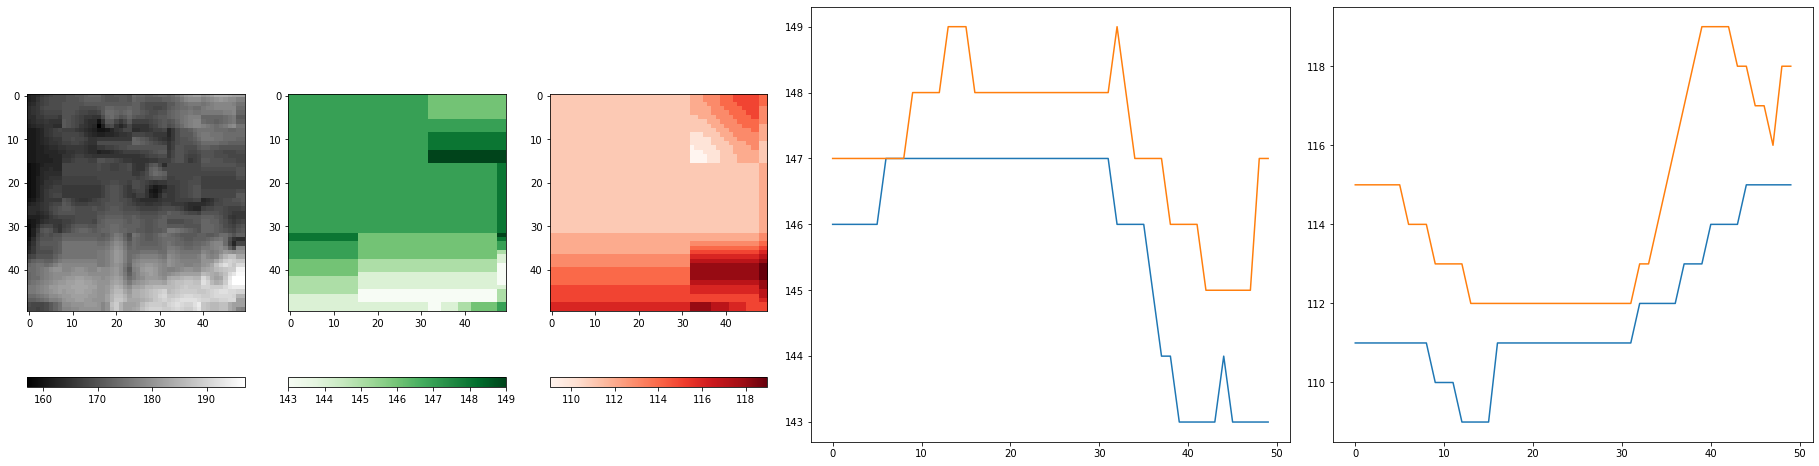

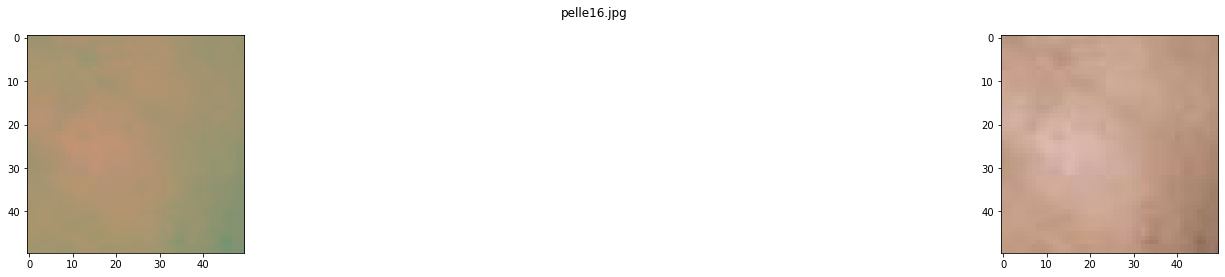

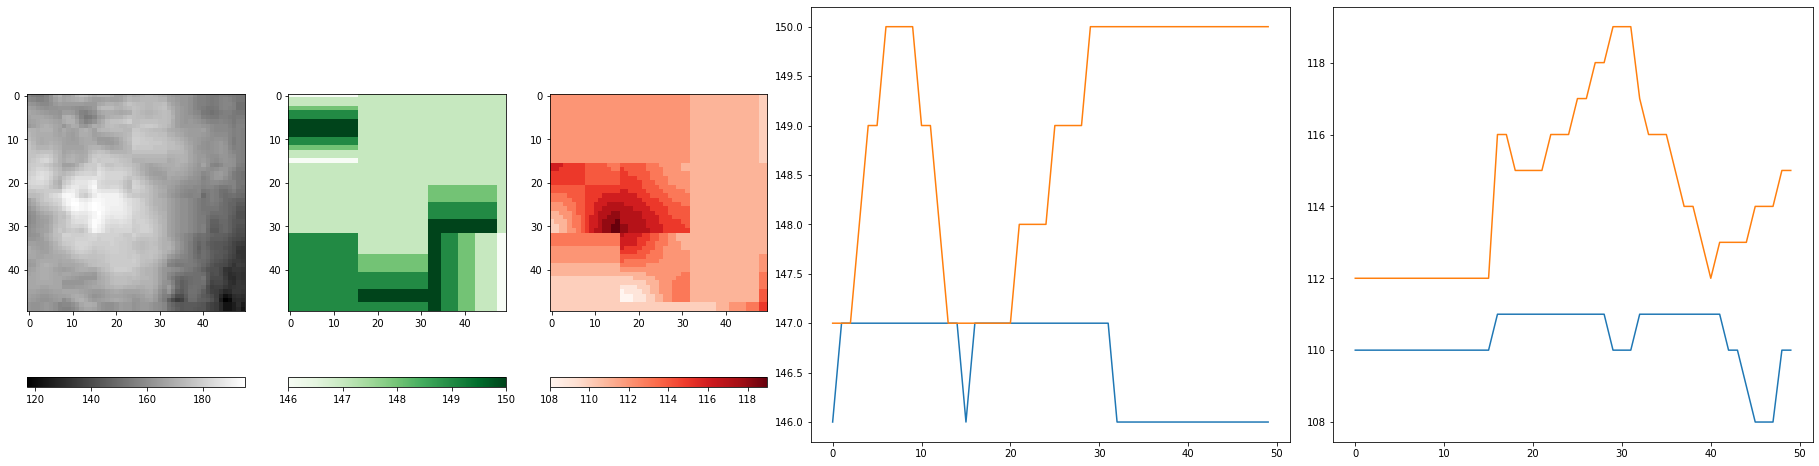

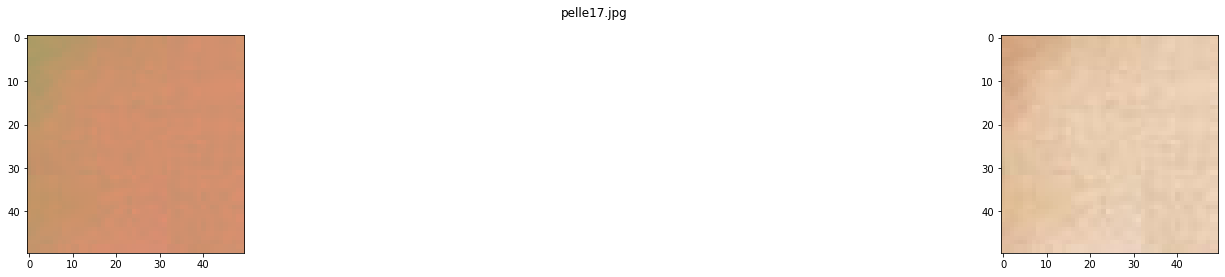

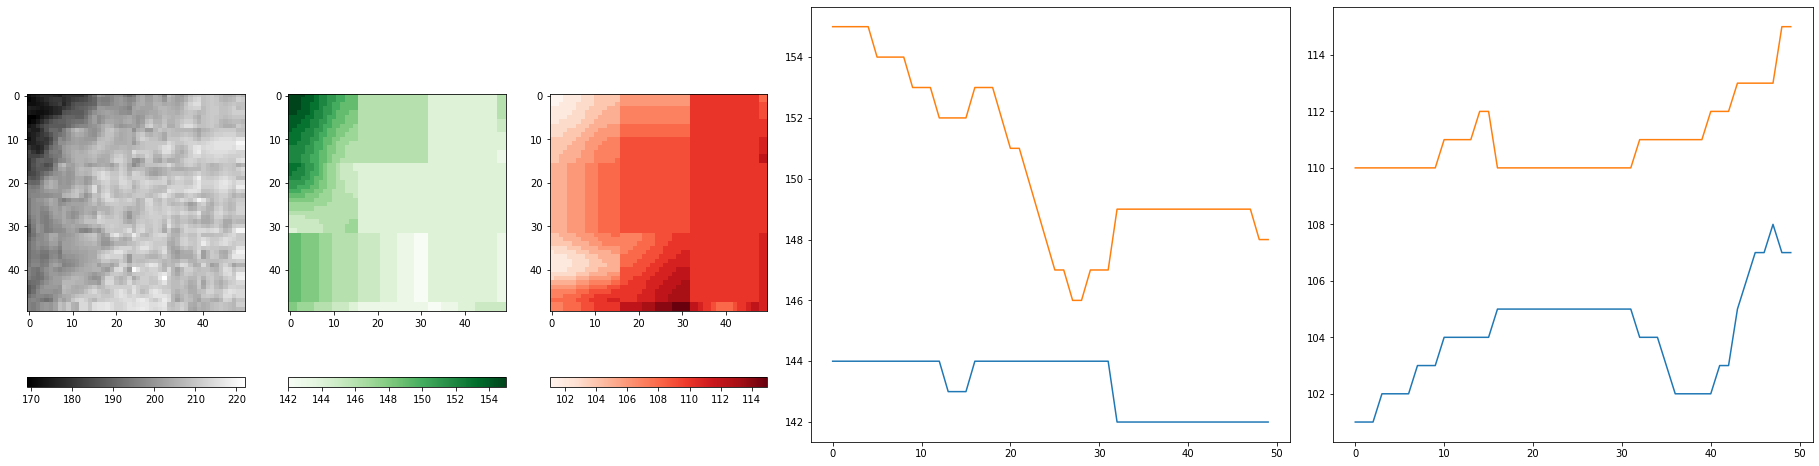

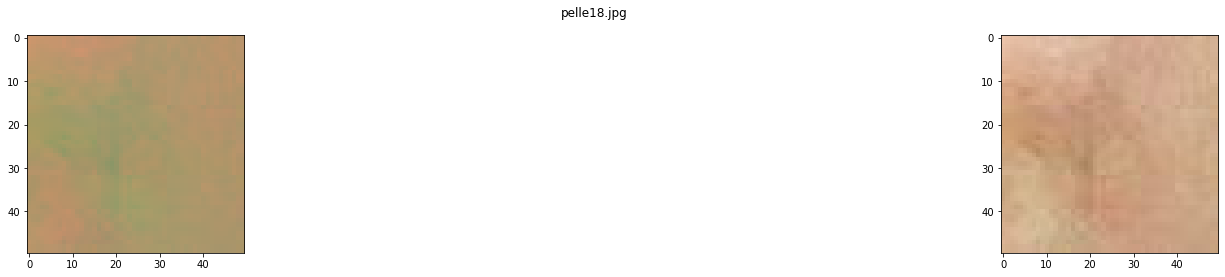

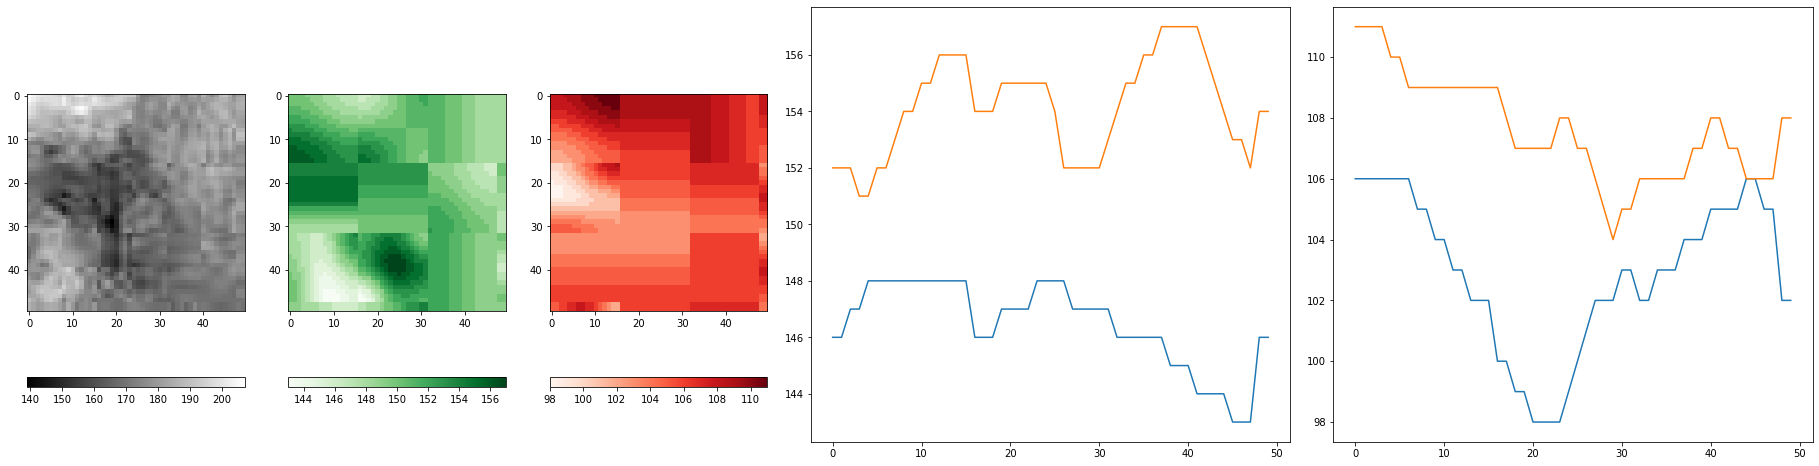

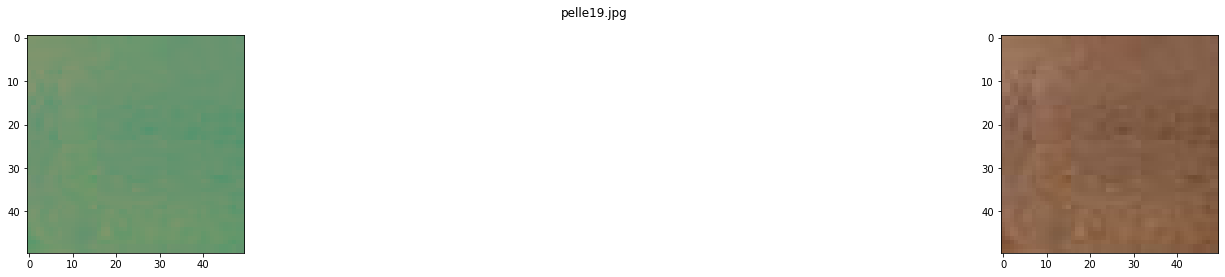

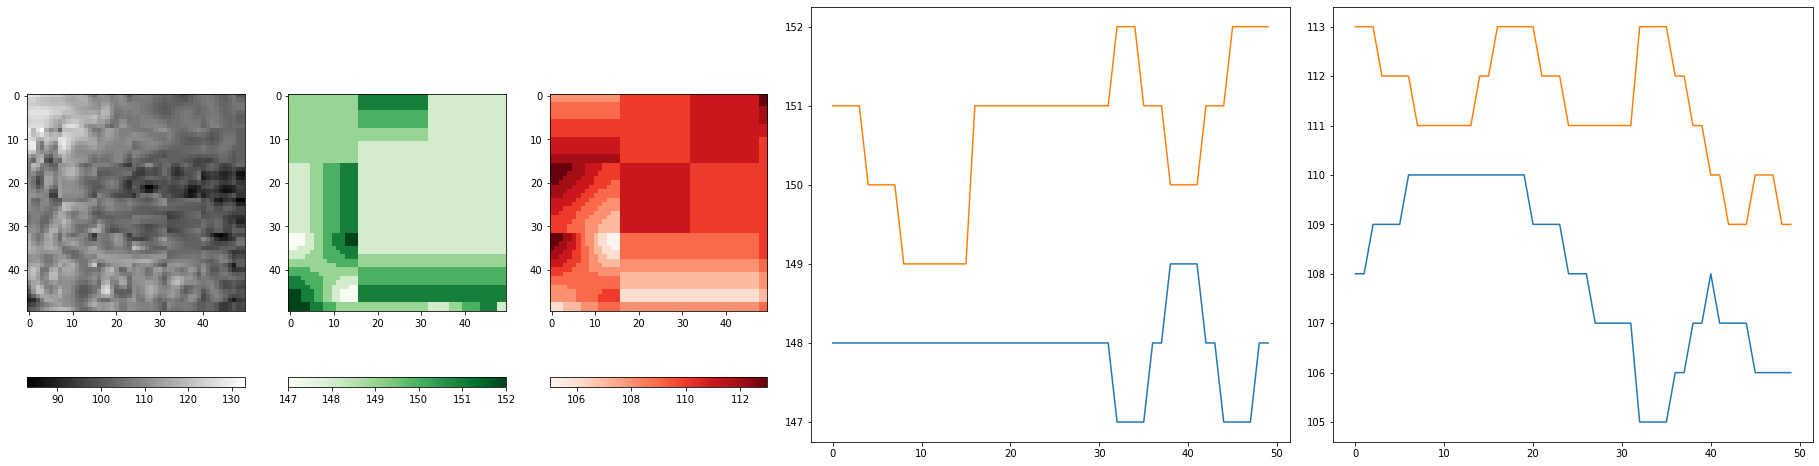

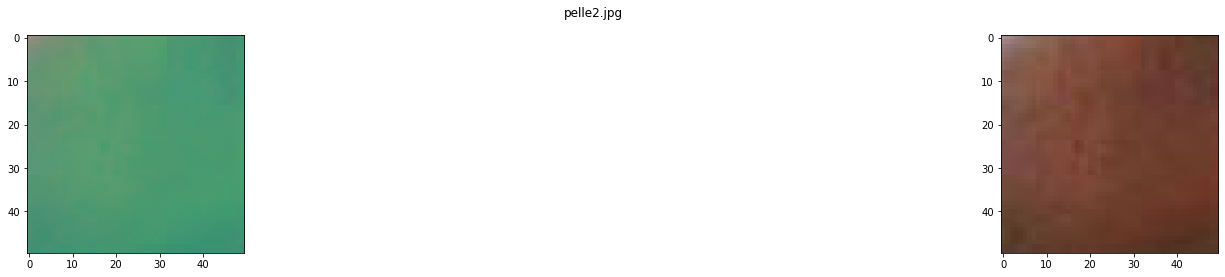

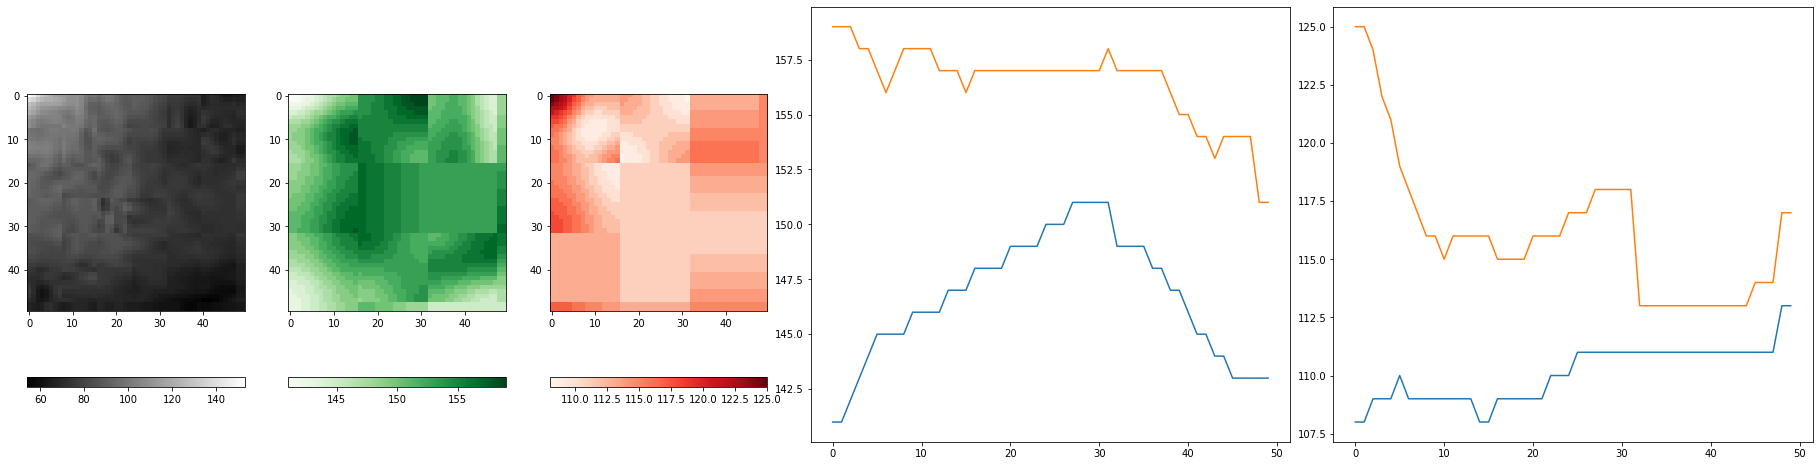

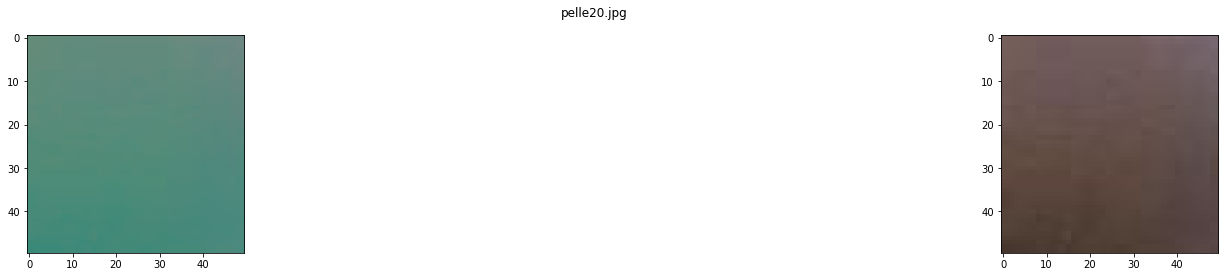

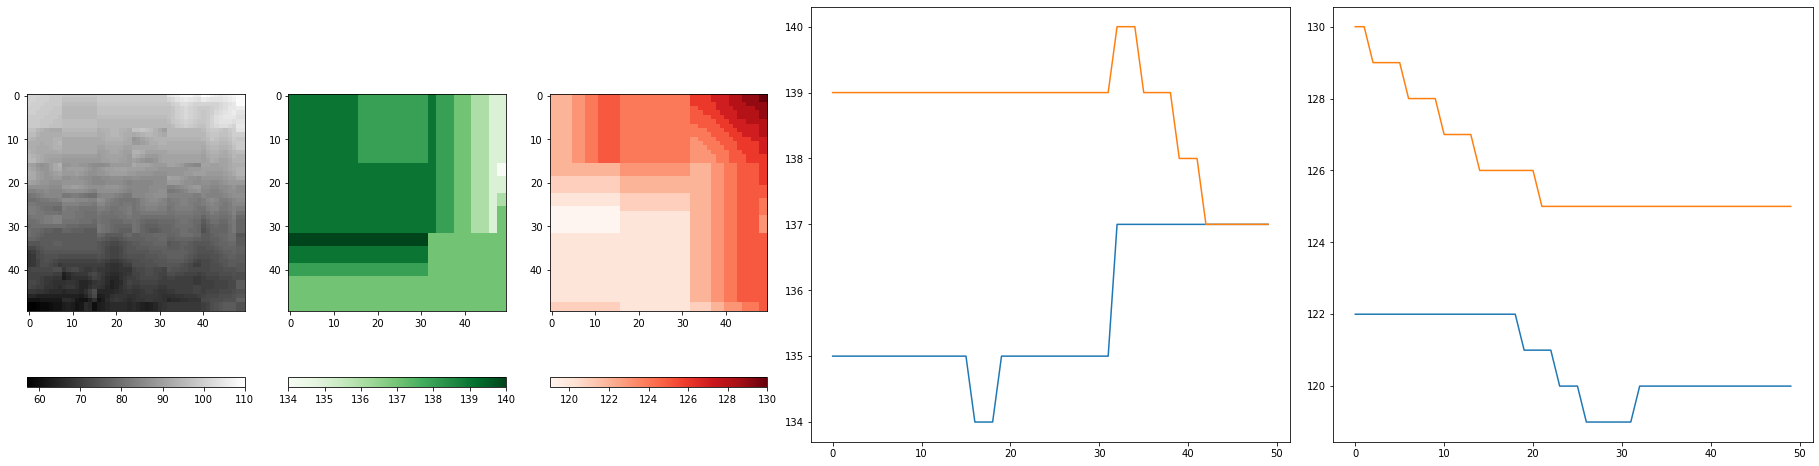

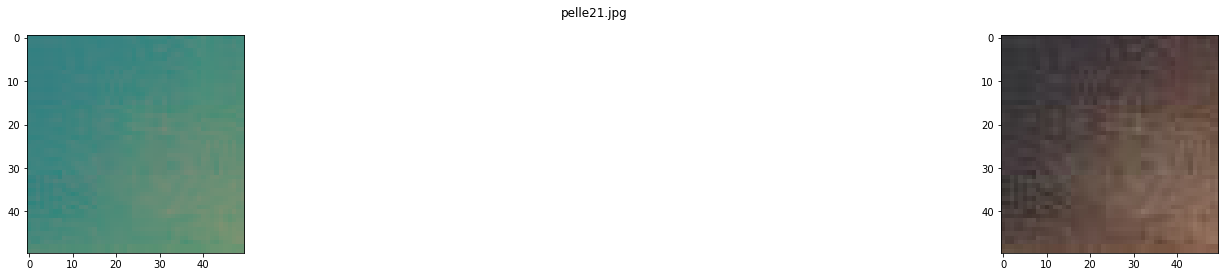

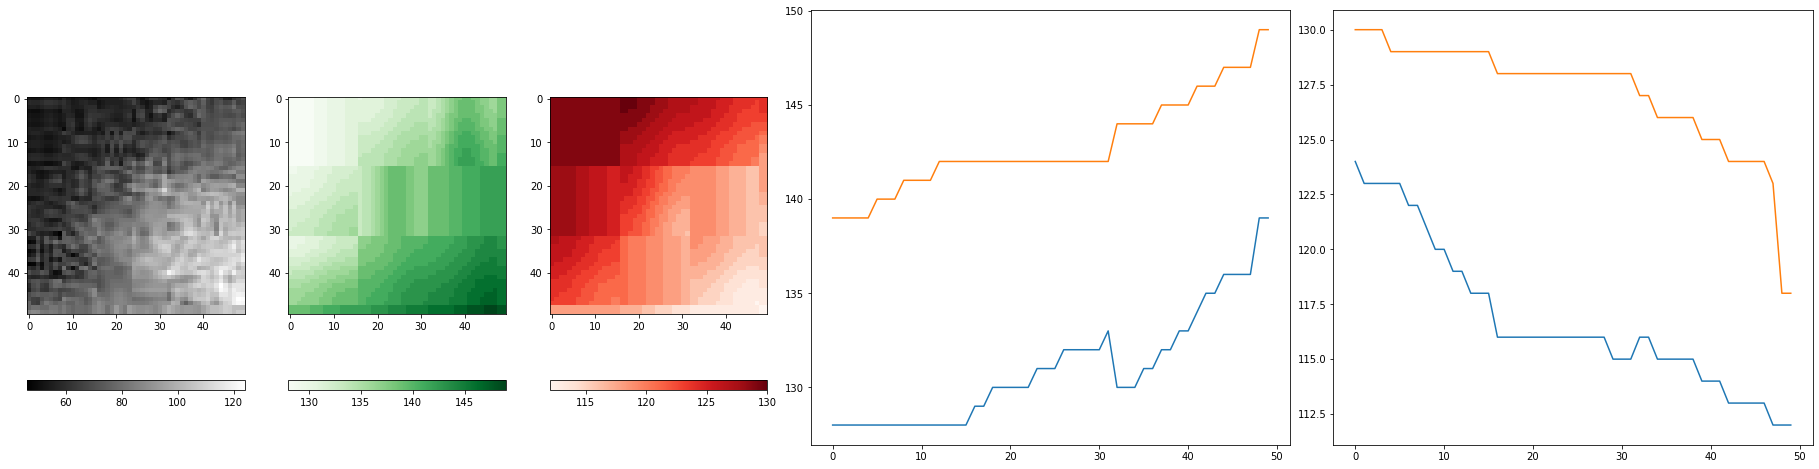

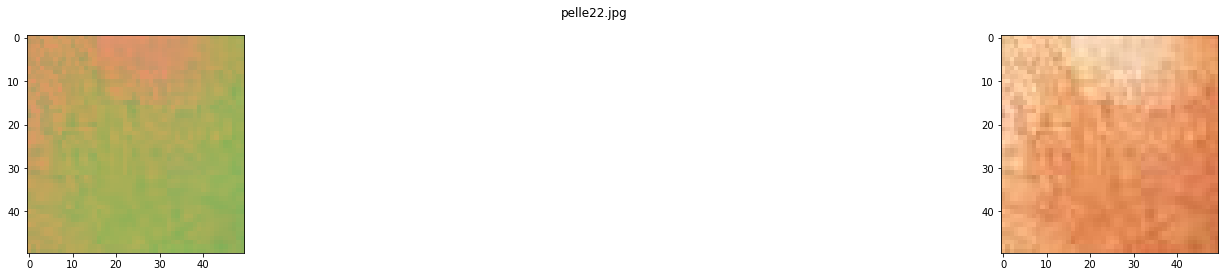

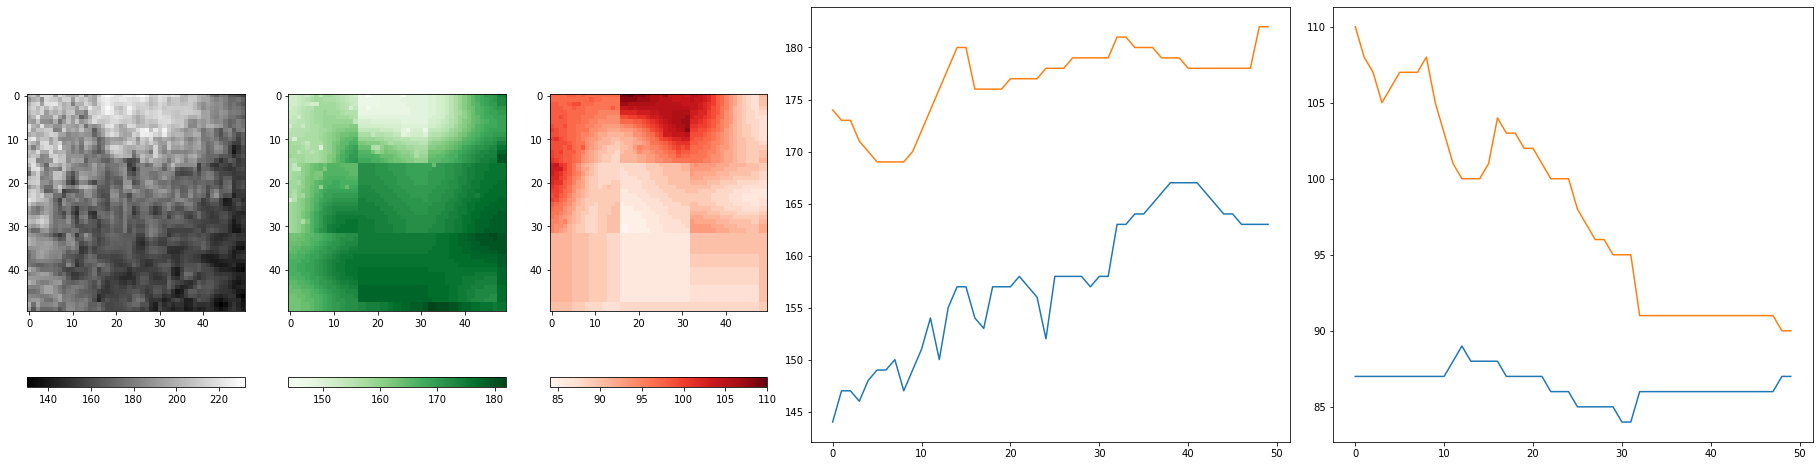

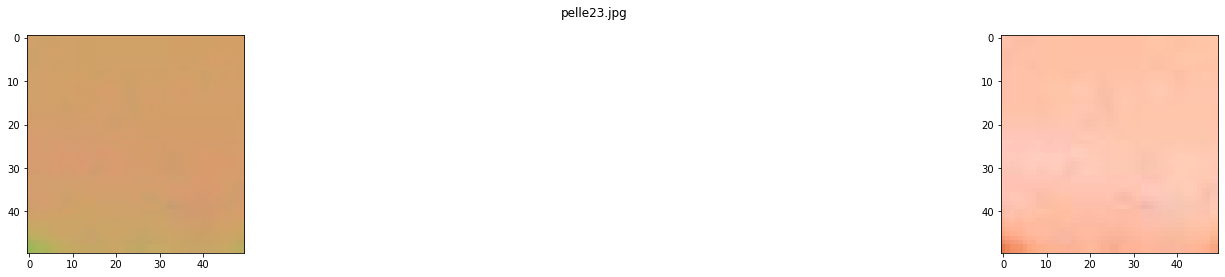

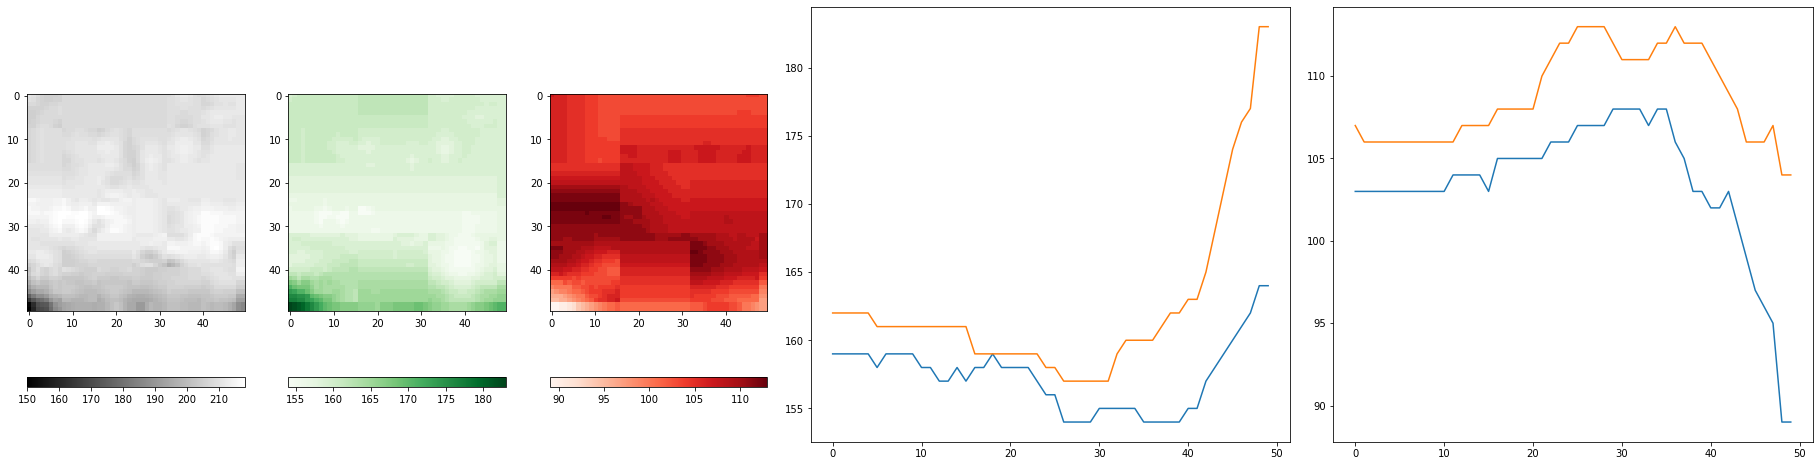

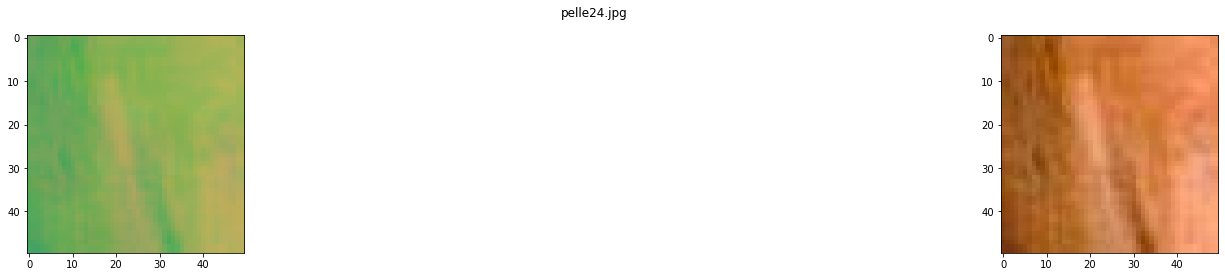

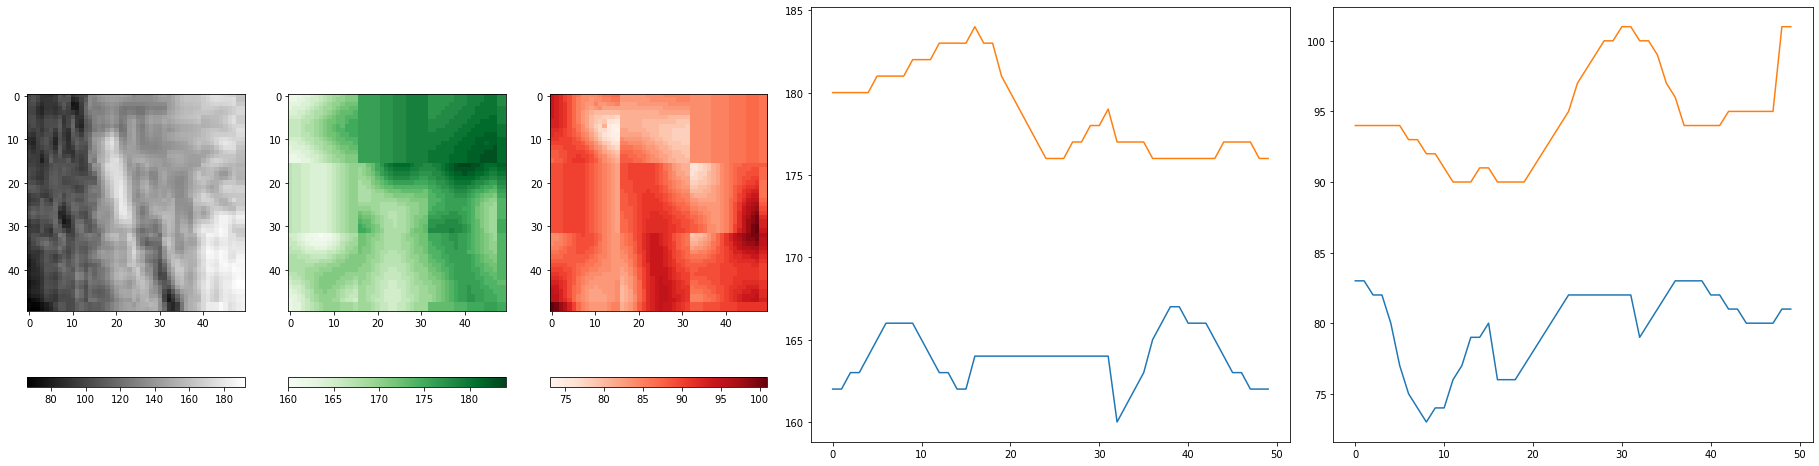

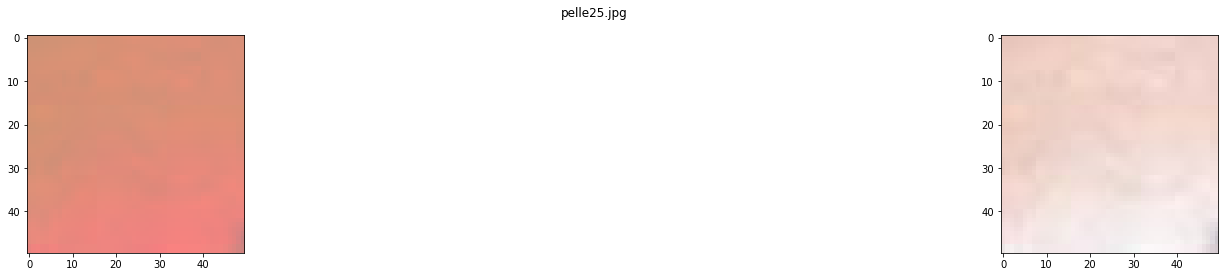

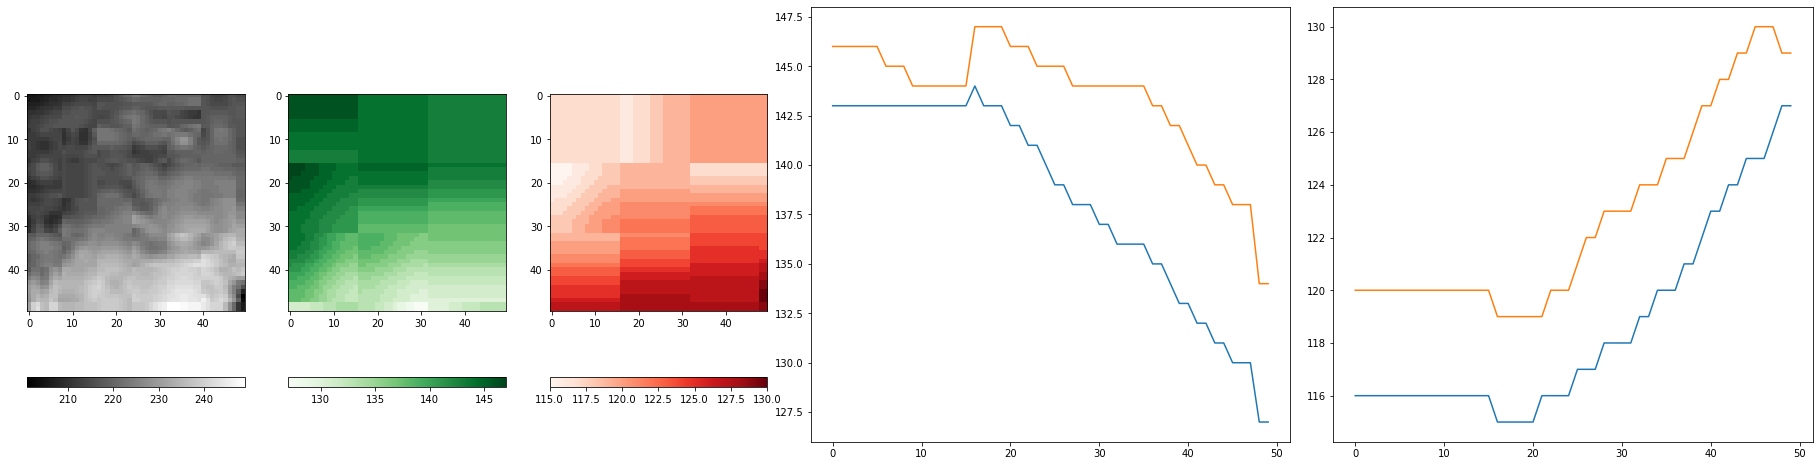

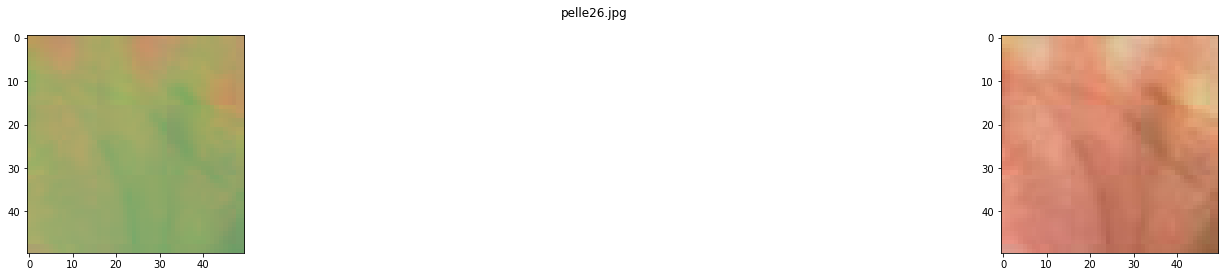

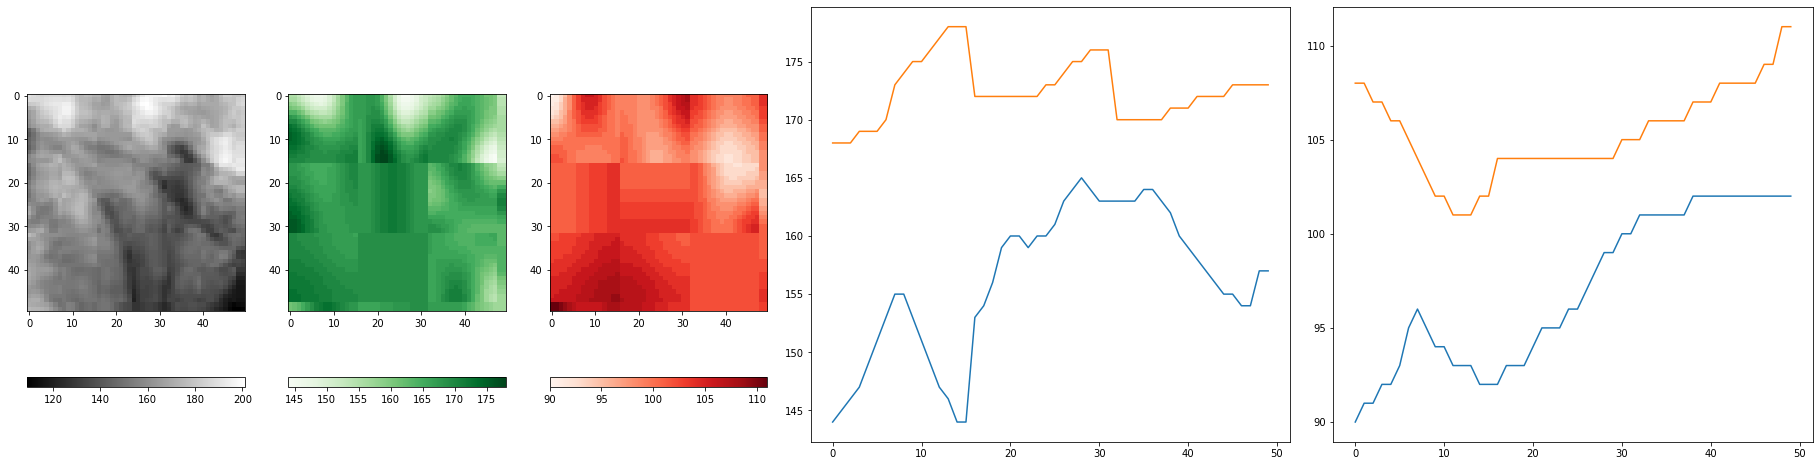

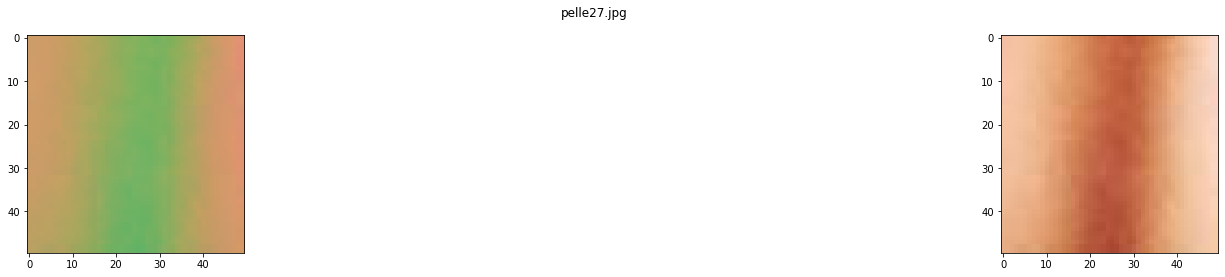

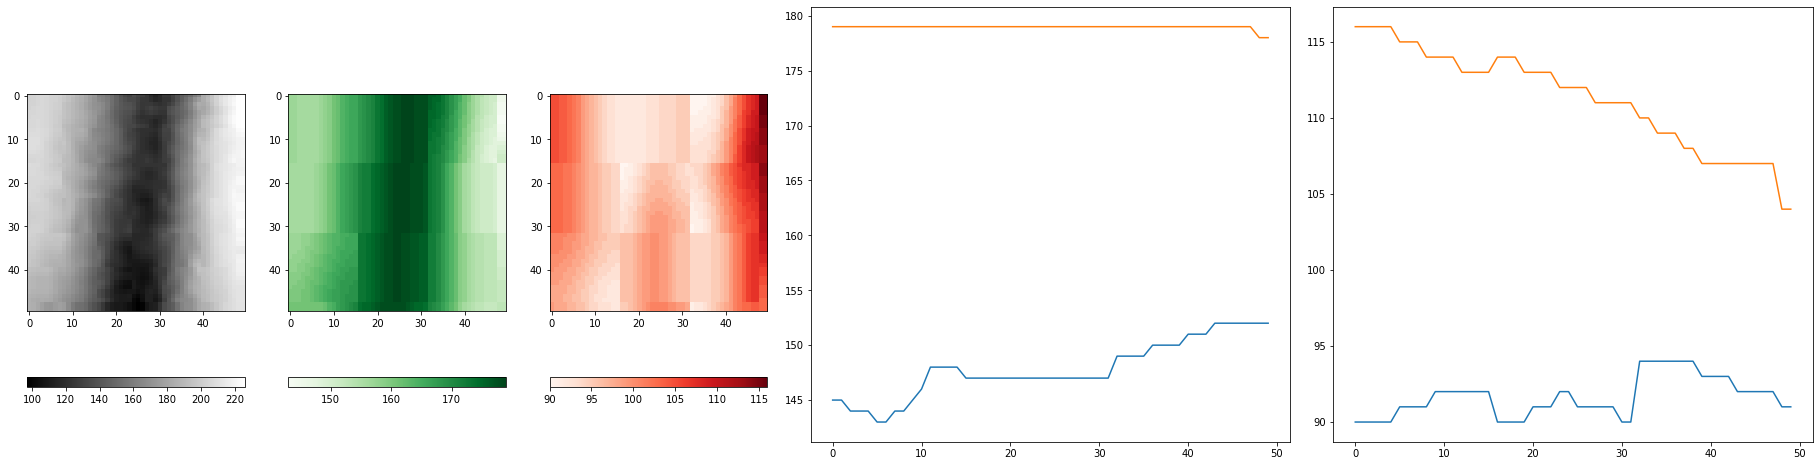

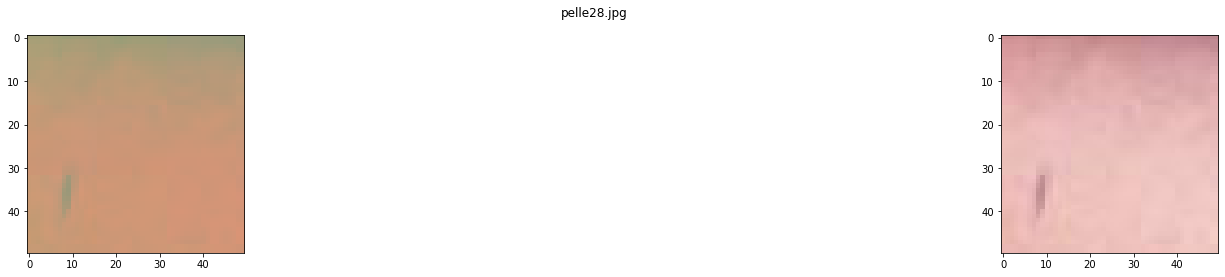

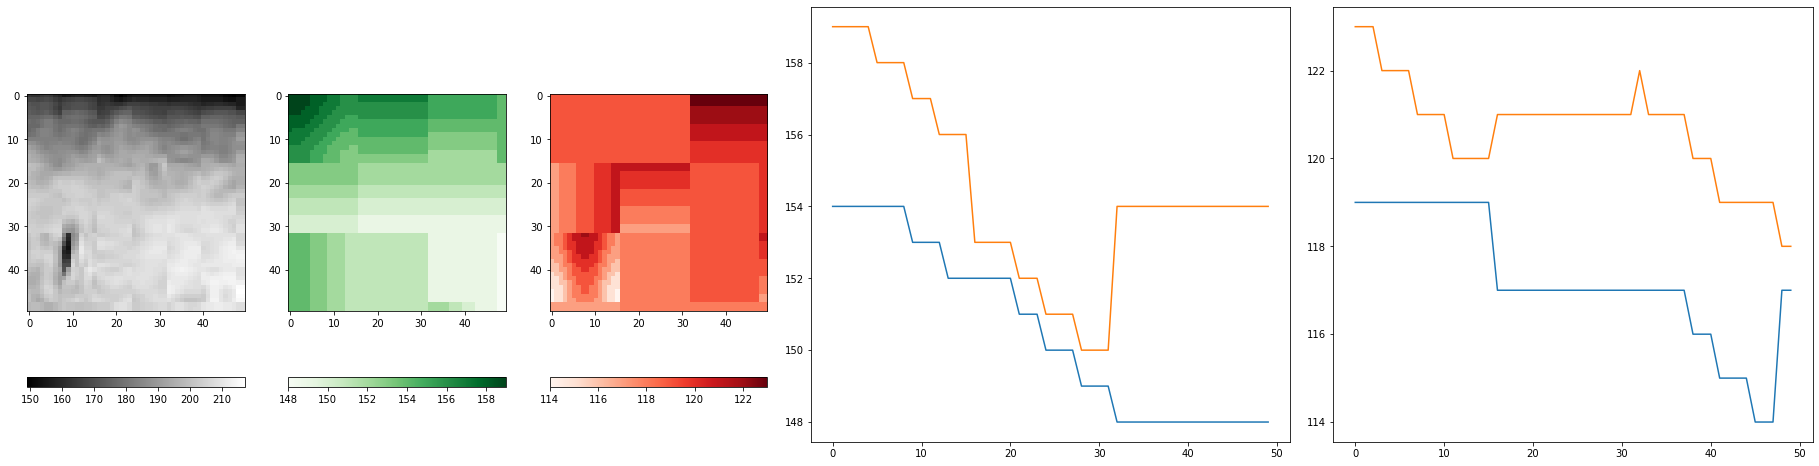

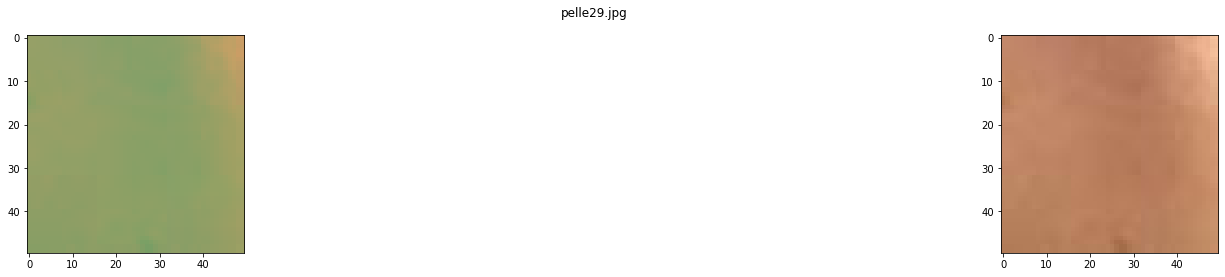

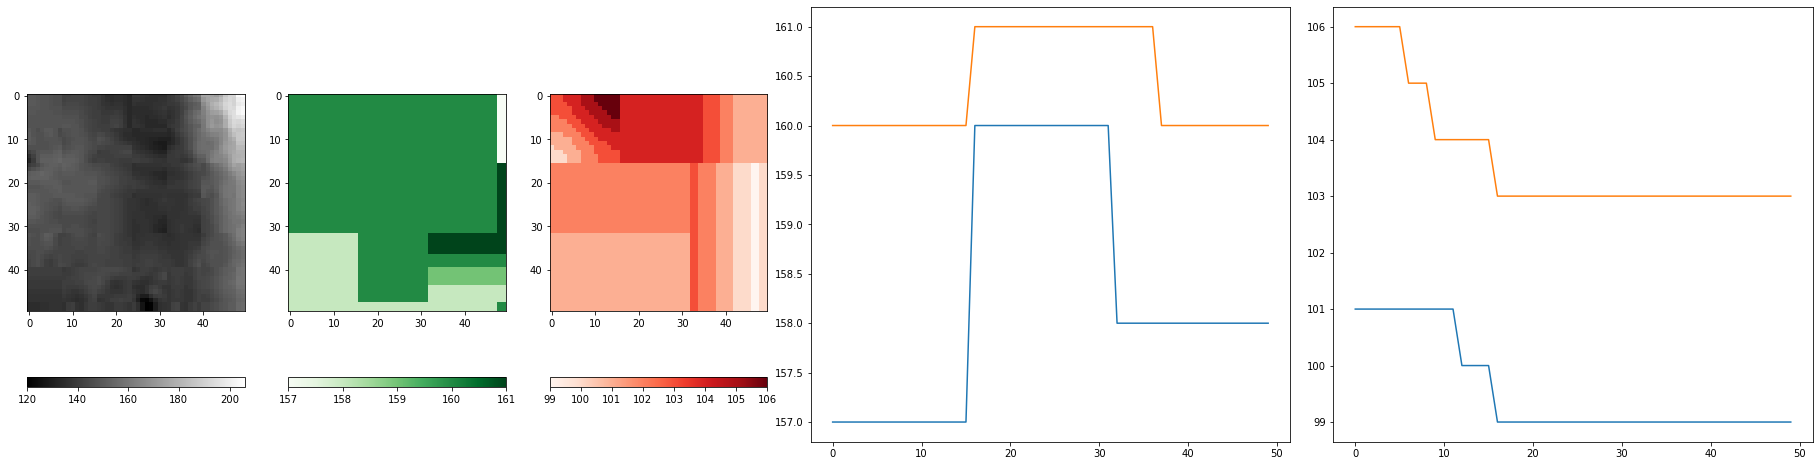

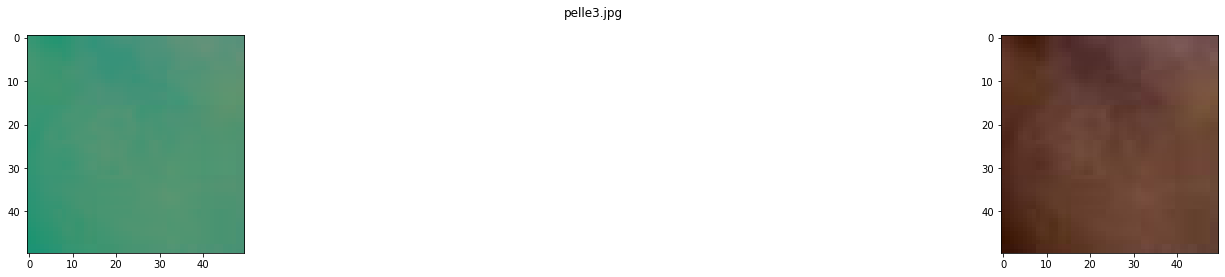

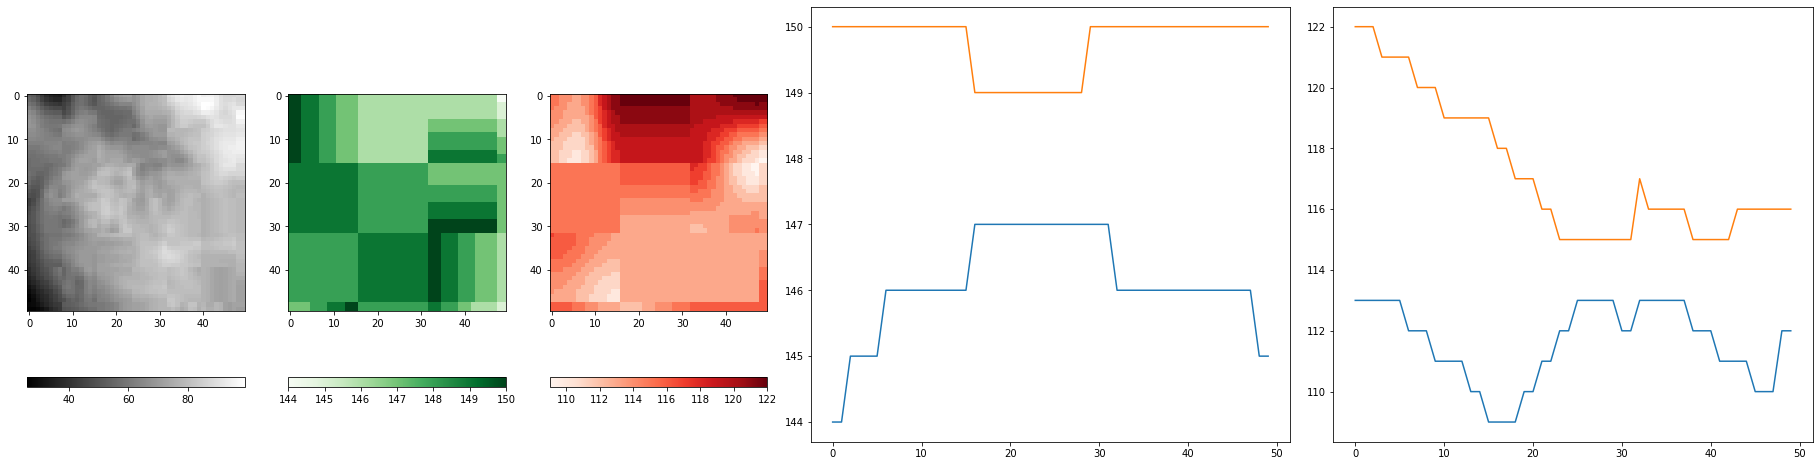

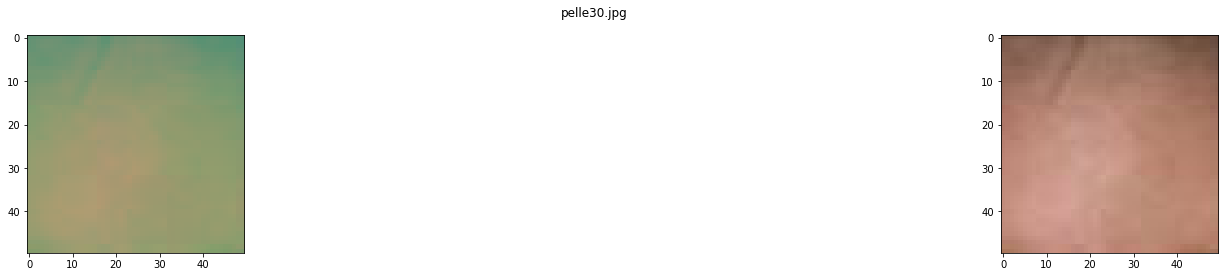

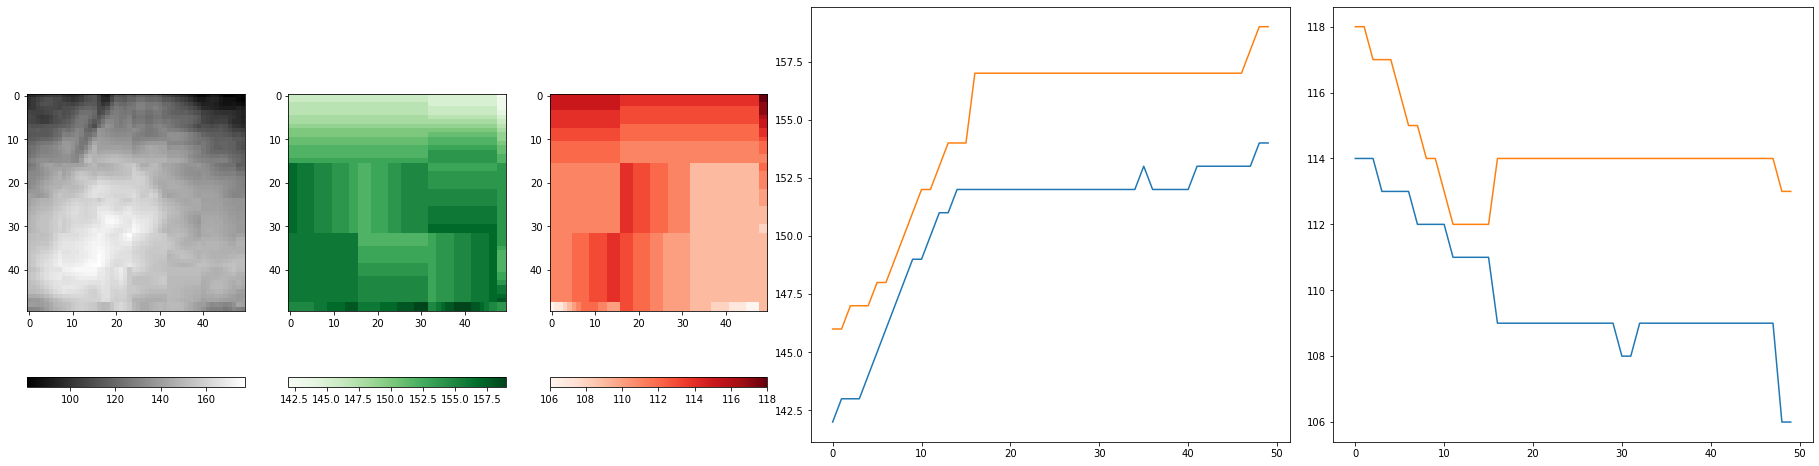

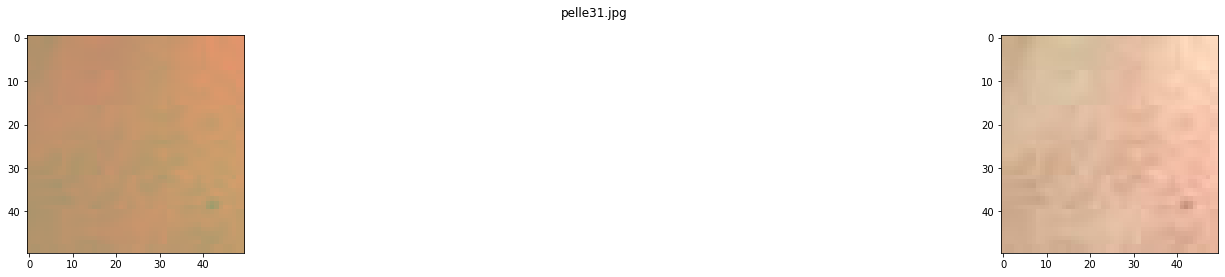

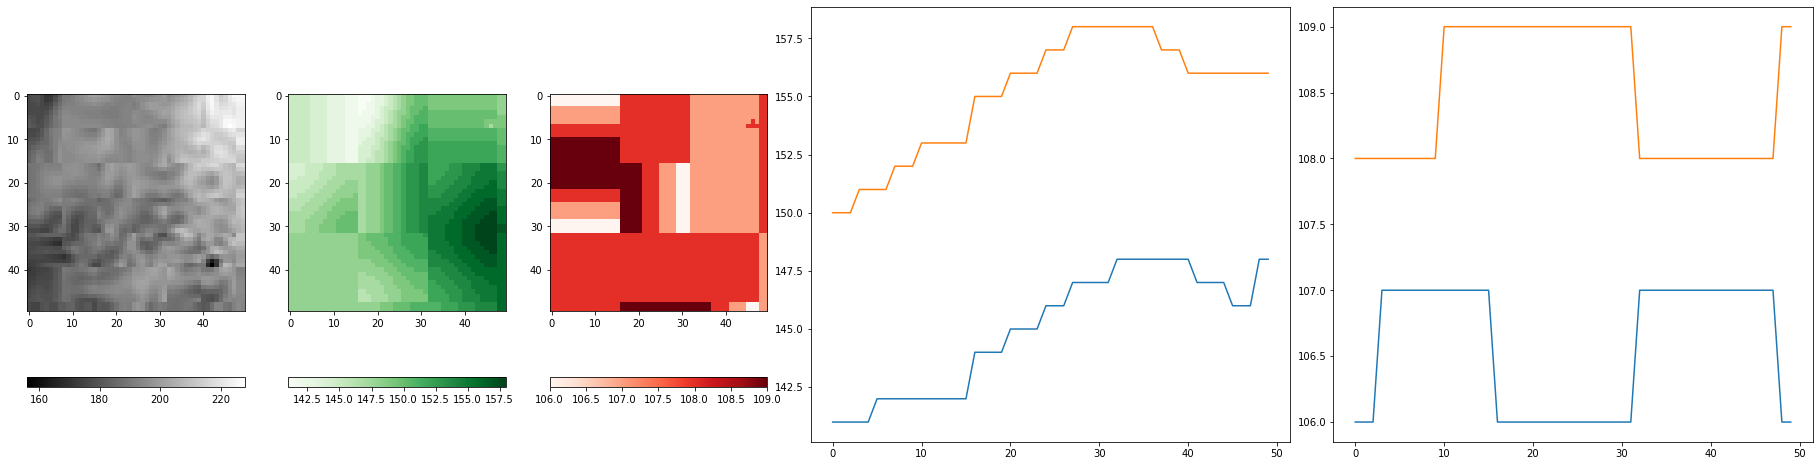

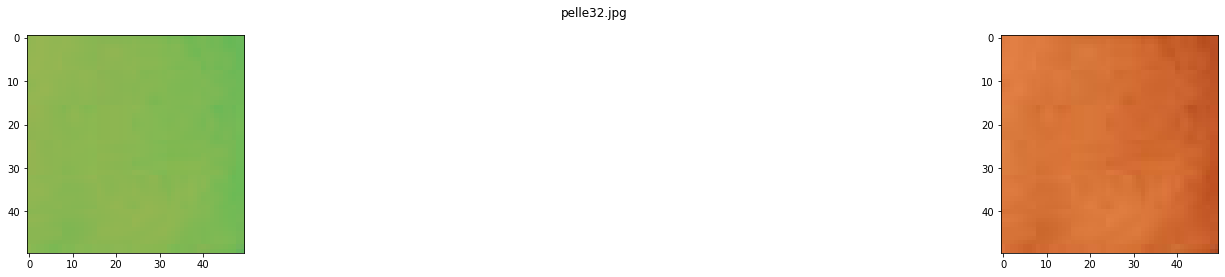

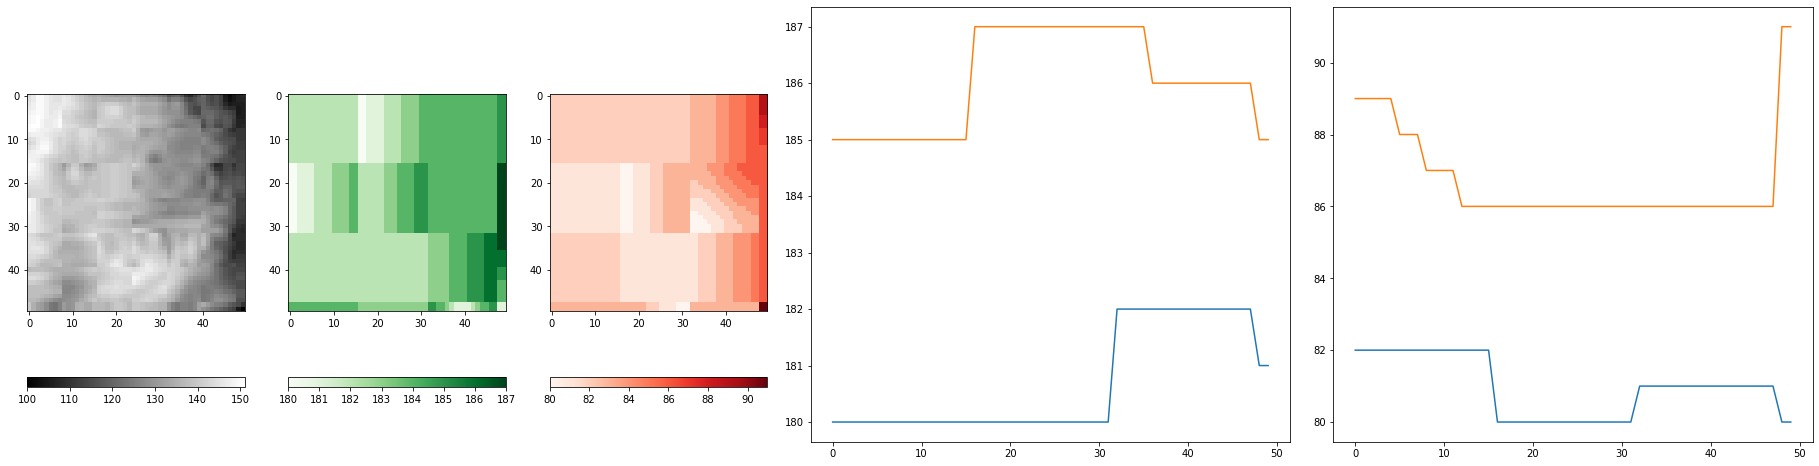

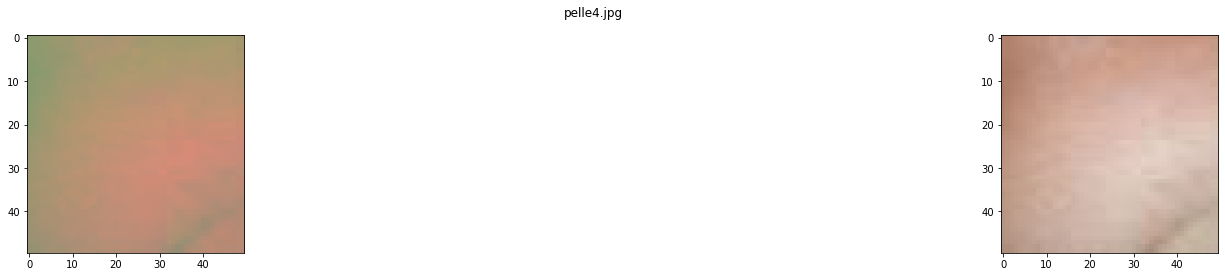

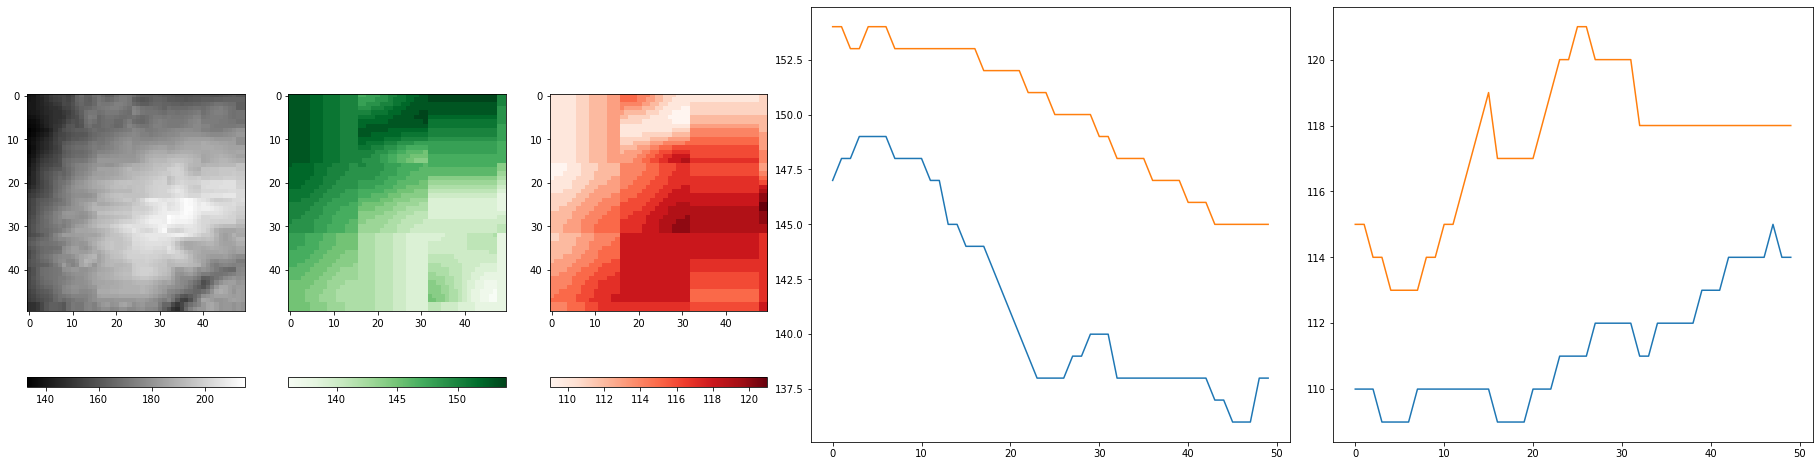

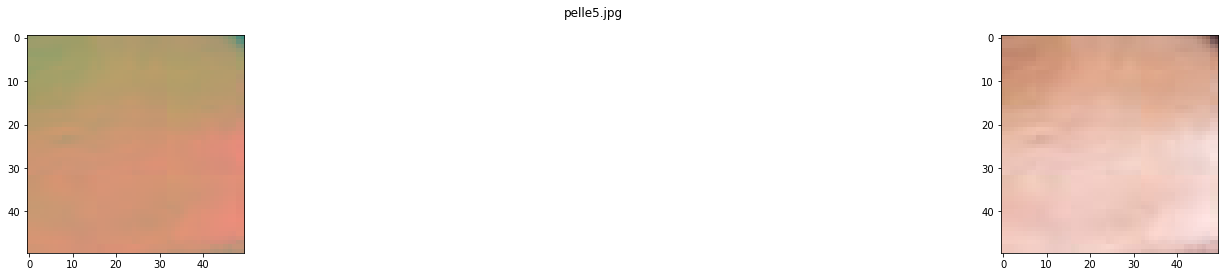

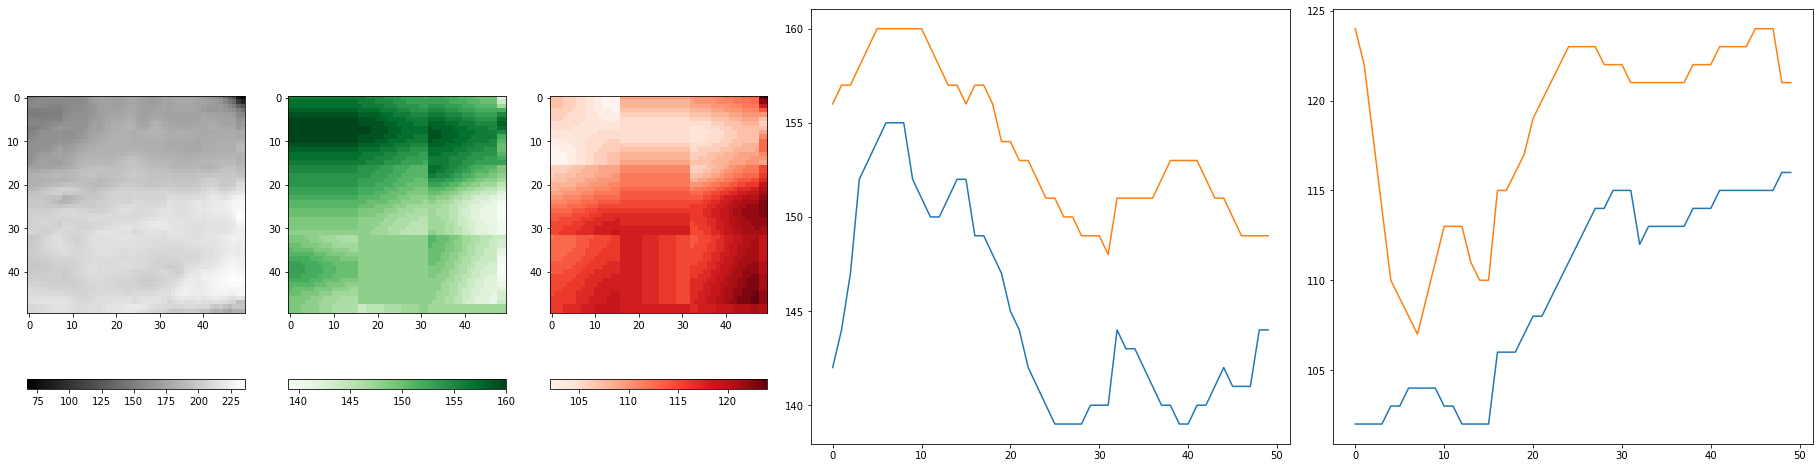

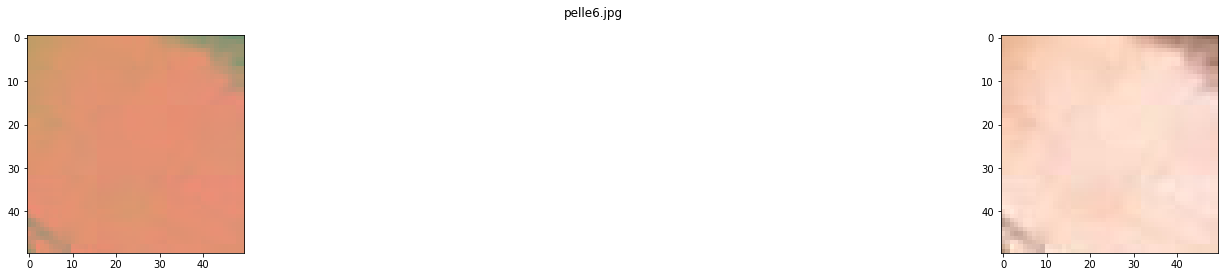

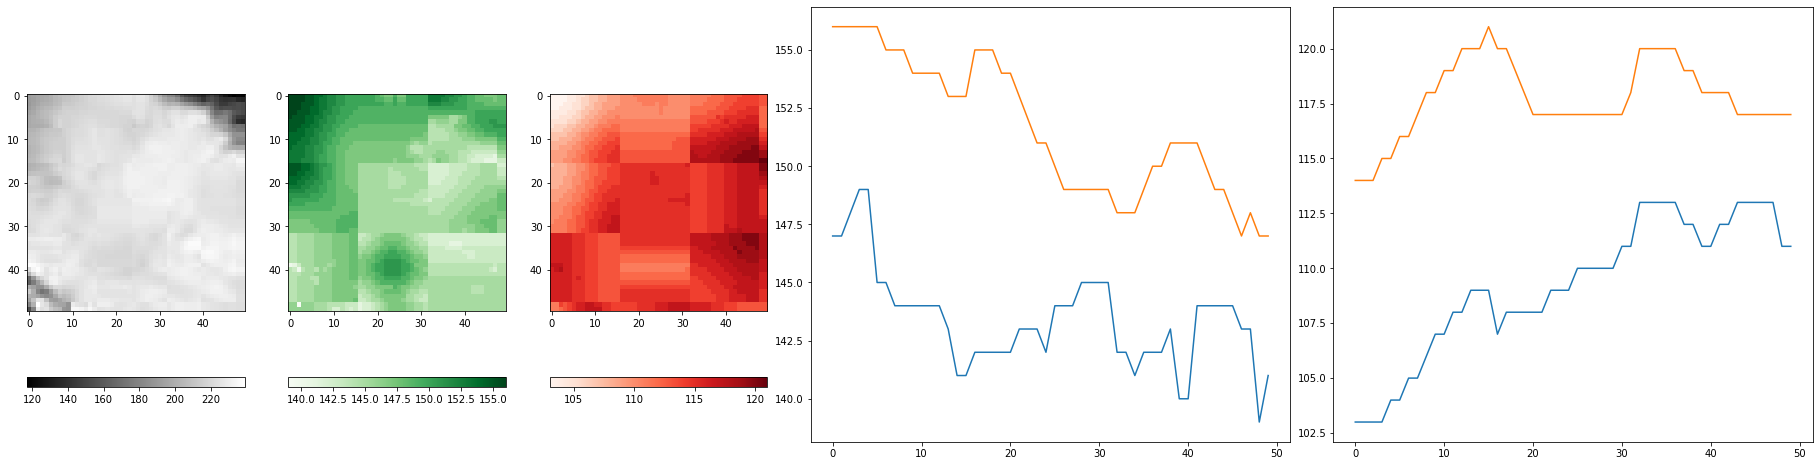

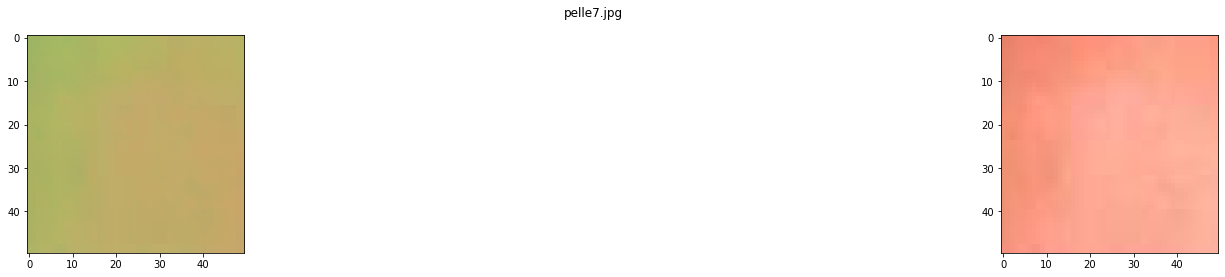

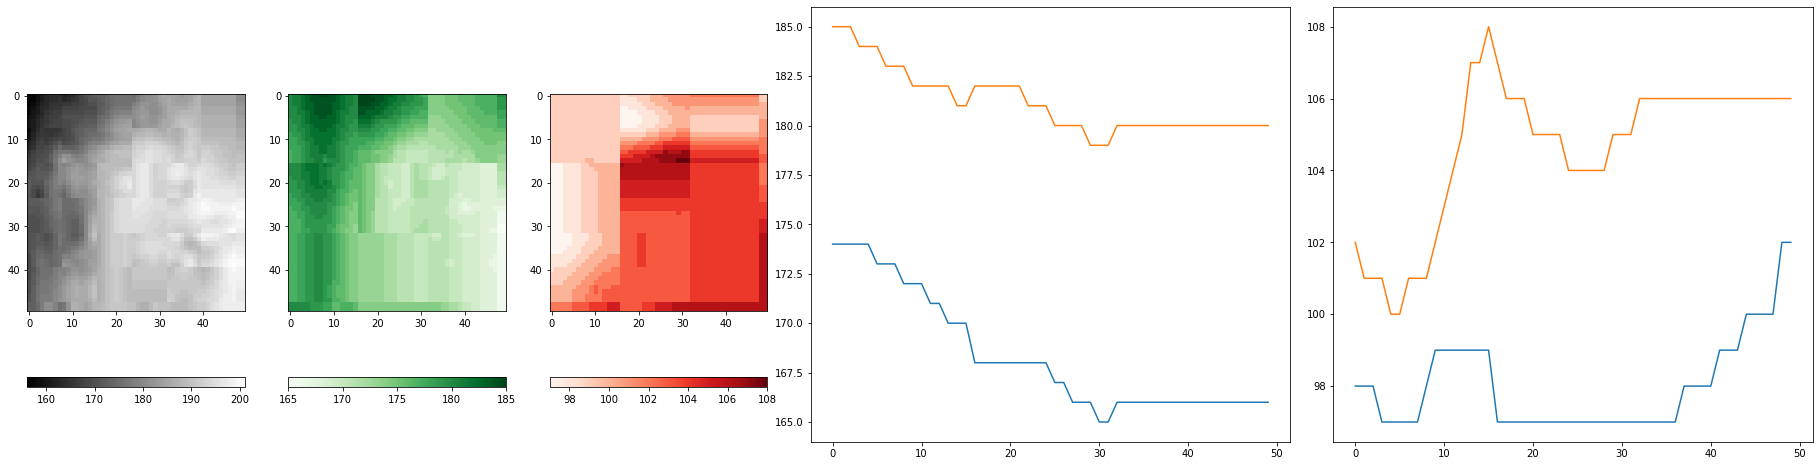

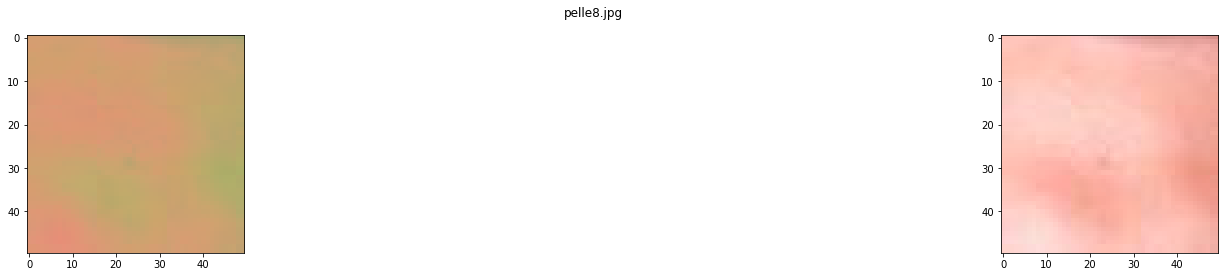

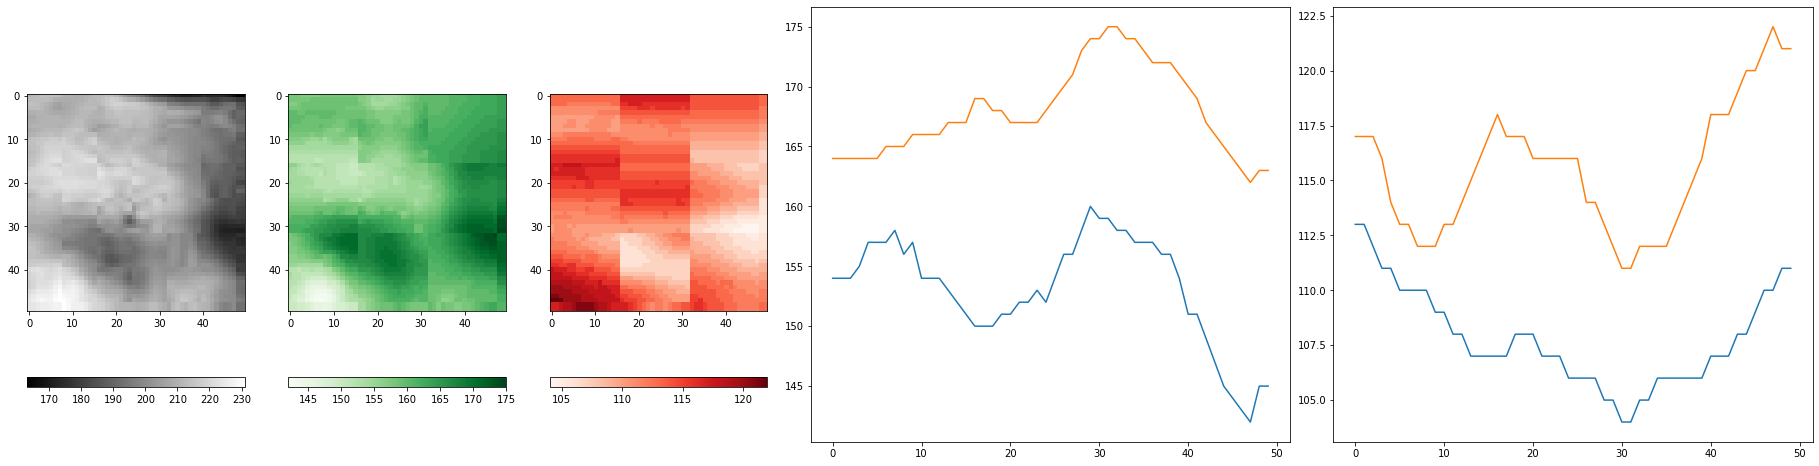

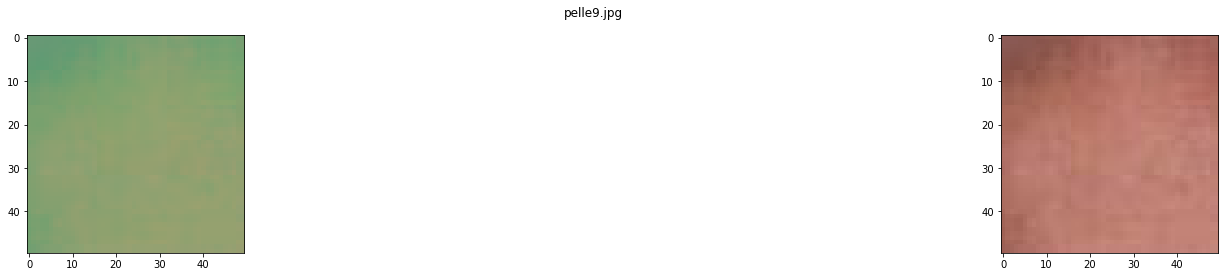

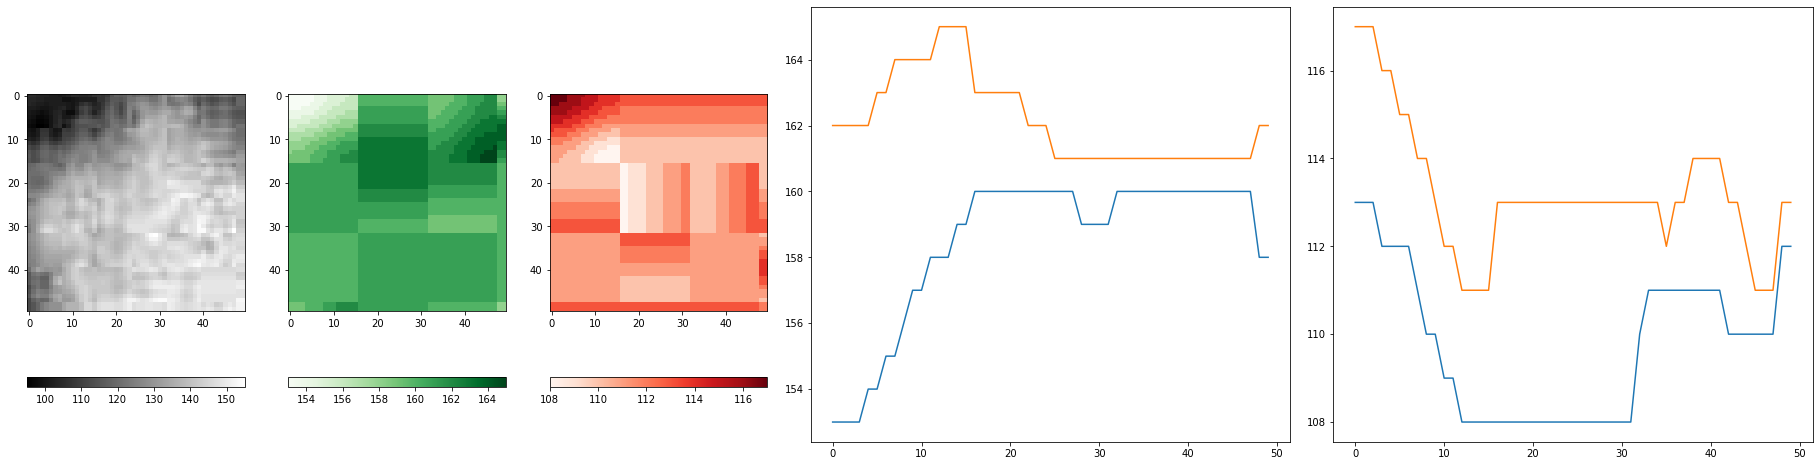

In [8]:
run_skin_analysis_ycbcr()